In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from pandas.core.frame import DataFrame
import chart_studio.plotly as py
import plotly.graph_objs as go

In [2]:
# 그래프 출력 (함수화 필요할 가능성 있음)
font_dirs = [r'C:\Users\Administrator\AppData\Local\Microsoft\Windows\Fonts', ] # 폰트 경로
font_files = fm.findSystemFonts(fontpaths=font_dirs) # 경로 추적
for font_file in font_files:# 경로 내의 폰트 저장
    fm.fontManager.addfont(font_file)
    
sns.set(font="NanumGothic", # 폰트 나눔고딕
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 방지
        style='darkgrid') # 검은 그리드

In [3]:
# 데이터 입력
a = pd.read_excel("c://python//아파트_실거래가_2012.xlsx") #집값데이터
a_1 = pd.read_excel("c://python//아파트_실거래가_2013.xlsx") #집값데이터
a_2 = pd.read_excel("c://python//아파트_실거래가_2014.xlsx") #집값데이터
a_3 = pd.read_excel("c://python//아파트_실거래가_2015.xlsx") #집값데이터
a_4 = pd.read_excel("c://python//아파트_실거래가_2016.xlsx") #집값데이터
a_5 = pd.read_excel("c://python//아파트_실거래가_2017.xlsx") #집값데이터
a_6 = pd.read_excel("c://python//아파트_실거래가_2018.xlsx") #집값데이터
a_7 = pd.read_excel("c://python//아파트_실거래가_2019.xlsx") #집값데이터
a_8 = pd.read_excel("c://python//아파트_실거래가_2020.xlsx") #집값데이터

b = pd.read_csv("c://python//창원시_인구데이터_5세별.csv",encoding='cp949') # 인구수 데이터

c = pd.read_csv("c://python//대학교_개황_창원.csv",encoding='cp949') # 대학 인구 데이터
c_1 = pd.read_csv("c://python//전문대학_개황_창원.csv",encoding='cp949')


In [4]:
# 집값 데이터 가공

# 사용할 정보 가공 (함수와 예정)
def data_house(a1):
    a1 = a1.drop(columns=["번지","본번","부번","단지명","층","도로명","건축년도","해제사유발생일"])
    dali = [] #시군구에서 시에 대한 정보만 추출
    for da in a1["시군구"]:
        dali.append(da.split(" ")[1]) #0 : 도 , 1 : 시
    a1["시"] = dali #시군구는 놔두고 시를 새로 생성

    cha = [] # 창원시는 여러개의 구로 나누어진 형태로 이를 창원시로 병합
    for i in a1["시"]:
        if i[0:2] == "창원":
            cha.append("창원시")
        else:
            cha.append(i)
    a1["시"] = cha

    a2 = a1[a1["시"] == "창원시"]

    dali2 = [] # 거래금액은 띄어쓰기와 ,로 인해서 문자열로 지정된 상태
    k = "" # 여기서 띄어쓰기와 ,를 지우고 정수형으로 변환해 저장
    for i in a2["거래금액(만원)"]:
        for j in i:
            if j != " " and j != ",":
                k = k + j
        dali2.append(int(k))
        k = ""

    a2["돈"] = dali2 # 돈이라는 새로운 배열을 만듦
    return a2

#집값 데이터 병합 전 가공
def data_house2(a2):
    a3 = pd.DataFrame()
    a3["날짜"] = a2["계약년월"]
    a3["금액"] = a2["돈"]
    a4 = a3.groupby("날짜").apply(lambda x: x.median())
    a4 = a4.drop(columns = "날짜")
    a4 = a4.reset_index()
    return a4

In [5]:
data_list = [a,a_1,a_2,a_3,a_4,a_5,a_6,a_7,a_8]
data_lst = []
for i in data_list:
    temp = data_house(i)
    temp2 = data_house2(temp)
    data_lst.append(temp2)

data_lst[1]

<ipython-input-4-3c2fe2b0395f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a2["돈"] = dali2 # 돈이라는 새로운 배열을 만듦


,날짜,금액
0,201301,17500.0
1,201302,17200.0
2,201303,17500.0
3,201304,18450.0
4,201305,18000.0
5,201306,18500.0
6,201307,17200.0
7,201308,18500.0
8,201309,19925.0
9,201310,19300.0


In [6]:
# 집 값 데이터 년도 통합
temp = pd.DataFrame()
for i in data_lst:
    temp = pd.concat([temp,i])

temp


,날짜,금액
0,201201,18330.0
1,201202,17500.0
2,201203,18000.0
3,201204,17500.0
4,201205,17715.0
...,...,...
7,202008,22800.0
8,202009,20200.0
9,202010,25300.0
10,202011,23000.0


In [7]:
# 인구수 데이터 편집
b2 = b[b["항목"]=="총인구수"]
b2 = b2[b2["5세별"]=="계"]
b3 = b2.groupby("항목").apply(lambda x: x.sum())
b4 = b3.drop(columns = ["행정구역(동읍면)별","5세별","항목","단위"])
b5 = b4.T
b5 = b5.reset_index()
b5 = b5.drop(b5.index[-1])
b5

항목,index,총인구수
0,2012. 07 월,1091892.0
1,2012. 08 월,1091780.0
2,2012. 09 월,1091873.0
3,2012. 10 월,1092126.0
4,2012. 11 월,1092146.0
...,...,...
105,2021. 04 월,1034705.0
106,2021. 05 월,1034130.0
107,2021. 06 월,1034527.0
108,2021. 07 월,1034635.0


In [8]:
# 인구수 데이터 년도 편집
y_list = []
for i in b5["index"]:
    tmp = i[0:4] + i[6:8]
    y_list.append(int(tmp))
b5["날짜"] = y_list
b6 = b5.drop(columns = "index")
b6

항목,총인구수,날짜
0,1091892.0,201207
1,1091780.0,201208
2,1091873.0,201209
3,1092126.0,201210
4,1092146.0,201211
...,...,...
105,1034705.0,202104
106,1034130.0,202105
107,1034527.0,202106
108,1034635.0,202107


In [9]:
# 구할 수 없는 데이터 : 인구수 2012년 7월 전, 대학, 유치원 2021년 데이터
# 2021년 제외, 2012년 7월 이전 탐색
test = pd.concat([temp,b6])
test2 = test.fillna(0)
test3 = test2.groupby("날짜").apply(lambda x: x.sum())
test3 = test3.drop(columns = "날짜")
test4 = test3.reset_index()
test4

,날짜,금액,총인구수
0,201201,18330.0,0.0
1,201202,17500.0,0.0
2,201203,18000.0,0.0
3,201204,17500.0,0.0
4,201205,17715.0,0.0
...,...,...,...
111,202104,0.0,1034705.0
112,202105,0.0,1034130.0
113,202106,0.0,1034527.0
114,202107,0.0,1034635.0


In [10]:
data_lst[4]

,날짜,금액
0,201601,18800.0
1,201602,19300.0
2,201603,18175.0
3,201604,19000.0
4,201605,19000.0
5,201606,18000.0
6,201607,19050.0
7,201608,19000.0
8,201609,17000.0
9,201610,16500.0


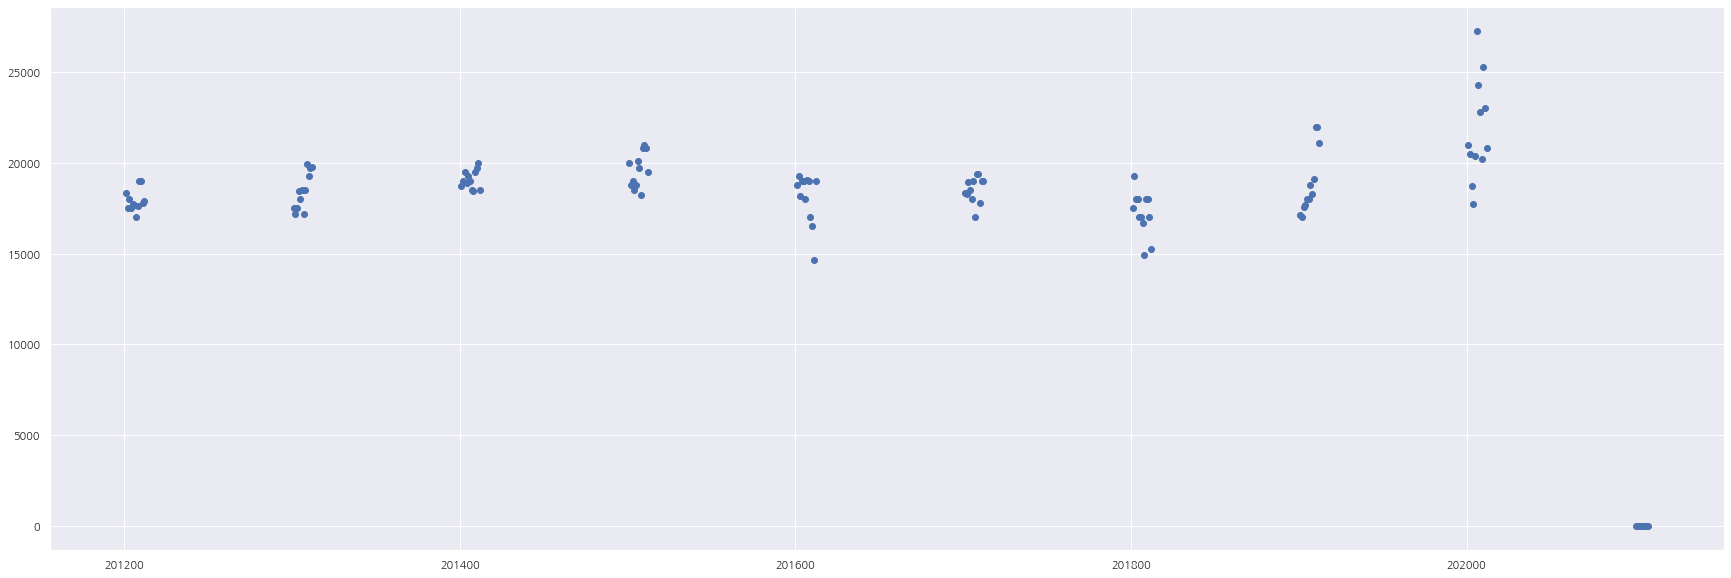

In [11]:
plt.figure(figsize = (30,10))
plt.scatter(test4["날짜"],test4["금액"])

In [12]:
# 데이터 단위 스케일링
test4["총인구수"][0] = 1092391
test4["총인구수"][1] = 1091733
test4["총인구수"][2] = 1092391
test4["총인구수"][3] = 1091614
test4["총인구수"][4] = 1092554
test4["총인구수"][5] = 1092397
test4

<ipython-input-12-acf3c1f3050b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4["총인구수"][0] = 1092391
<ipython-input-12-acf3c1f3050b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4["총인구수"][1] = 1091733
<ipython-input-12-acf3c1f3050b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test4["총인구수"][2] = 1092391
<ipython-input-12-acf3c1f3050b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,날짜,금액,총인구수
0,201201,18330.0,1092391.0
1,201202,17500.0,1091733.0
2,201203,18000.0,1092391.0
3,201204,17500.0,1091614.0
4,201205,17715.0,1092554.0
...,...,...,...
111,202104,0.0,1034705.0
112,202105,0.0,1034130.0
113,202106,0.0,1034527.0
114,202107,0.0,1034635.0


In [13]:
test5 = test4.drop(test4.index[108:])
test5

,날짜,금액,총인구수
0,201201,18330.0,1092391.0
1,201202,17500.0,1091733.0
2,201203,18000.0,1092391.0
3,201204,17500.0,1091614.0
4,201205,17715.0,1092554.0
...,...,...,...
103,202008,22800.0,1038677.0
104,202009,20200.0,1038101.0
105,202010,25300.0,1037709.0
106,202011,23000.0,1037161.0


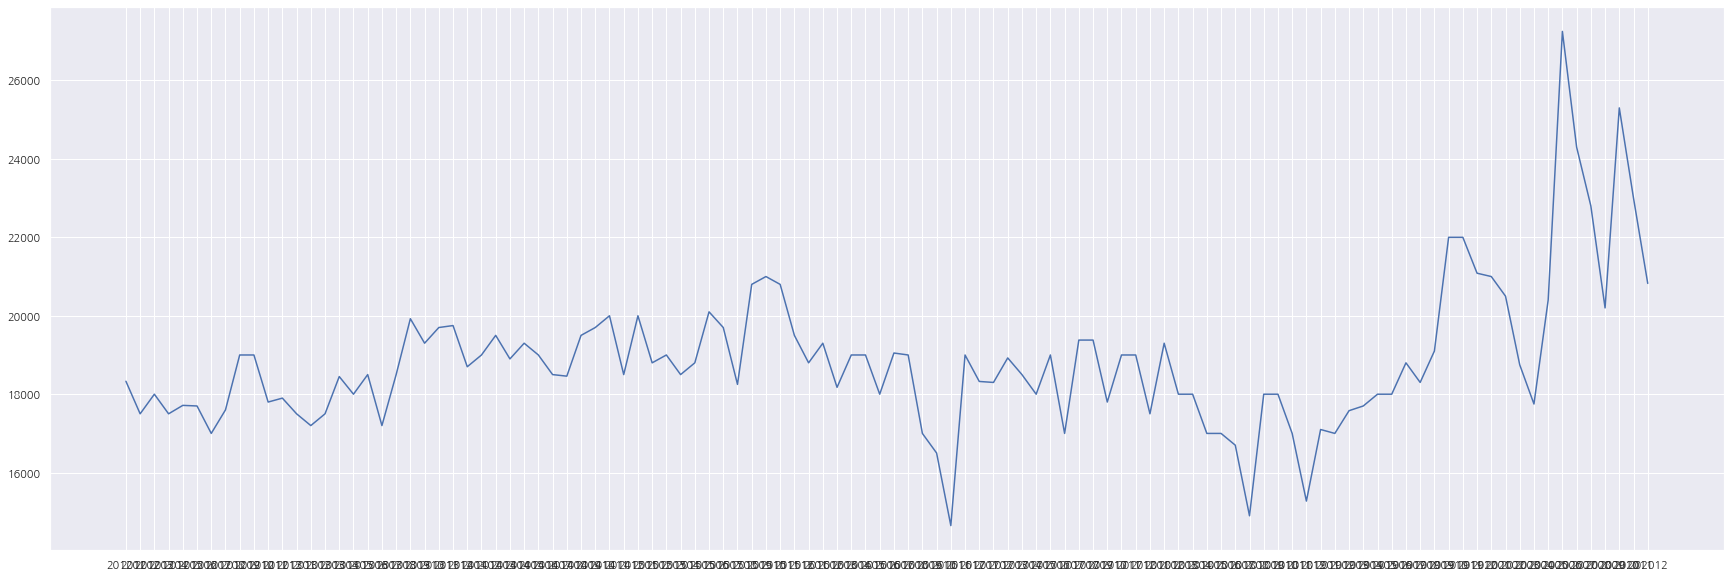

In [14]:
plt.figure(figsize = (30,10))
plt.plot(test5["날짜"].astype(str),test5["금액"])
#plt.xticks(rotation = 90)

In [15]:
# 회귀 분석을 위한 라이브러리 생성
from sklearn.linear_model import LinearRegression

In [16]:
# 인구수 데이터 회귀 분석
line_fitter = LinearRegression()
line_fitter.fit(test5["날짜"].astype(str).values.reshape(-1,1), test5["총인구수"])

LinearRegression()

In [17]:
line_fitter.predict([[201613]])

array([1066243.5830499])

In [18]:
line_fitter2 = LinearRegression()
line_fitter2.fit(test5["날짜"].values.reshape(-1,1), test5["금액"])

LinearRegression()

In [19]:
line_fitter2.predict([[202009]])

array([19678.68984611])

In [20]:
data_lst2 = []
for i in data_list:
    temp = data_house(i)
    data_lst2.append(temp)
data_lst2[1]

<ipython-input-4-3c2fe2b0395f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a2["돈"] = dali2 # 돈이라는 새로운 배열을 만듦


,시군구,전용면적(㎡),계약년월,계약일,거래금액(만원),시,돈
24699,경상남도 창원마산합포구 가포동,84.6900,201302,13,"11,500",창원시,11500
24700,경상남도 창원마산합포구 가포동,84.5200,201306,13,"11,500",창원시,11500
24701,경상남도 창원마산합포구 가포동,83.2900,201310,7,"9,000",창원시,9000
24702,경상남도 창원마산합포구 가포동,77.1500,201311,16,"12,100",창원시,12100
24703,경상남도 창원마산합포구 교방동,40.4150,201302,16,"5,800",창원시,5800
...,...,...,...,...,...,...,...
37460,경상남도 창원진해구 풍호동,84.9833,201312,24,"25,500",창원시,25500
37461,경상남도 창원진해구 풍호동,84.9833,201312,25,"29,300",창원시,29300
37462,경상남도 창원진해구 풍호동,131.6411,201312,26,"28,000",창원시,28000
37463,경상남도 창원진해구 풍호동,84.9833,201312,31,"26,250",창원시,26250


In [21]:
temp = pd.DataFrame()
for i in data_lst2:
    temp = pd.concat([temp,i])

temp

,시군구,전용면적(㎡),계약년월,계약일,거래금액(만원),시,돈
18943,경상남도 창원마산합포구 가포동,84.5200,201201,5,"12,450",창원시,12450
18944,경상남도 창원마산합포구 가포동,84.5200,201205,20,"10,000",창원시,10000
18945,경상남도 창원마산합포구 가포동,83.2900,201212,14,"8,200",창원시,8200
18946,경상남도 창원마산합포구 교방동,40.4150,201203,26,"4,700",창원시,4700
18947,경상남도 창원마산합포구 교방동,40.4150,201208,1,"5,500",창원시,5500
...,...,...,...,...,...,...,...
52588,경상남도 창원진해구 풍호동,131.6411,202012,31,"31,800",창원시,31800
52589,경상남도 창원진해구 화천동,84.2300,202005,9,"7,000",창원시,7000
52590,경상남도 창원진해구 화천동,84.2300,202010,29,"7,300",창원시,7300
52591,경상남도 창원진해구 화천동,78.9171,202010,29,"15,600",창원시,15600


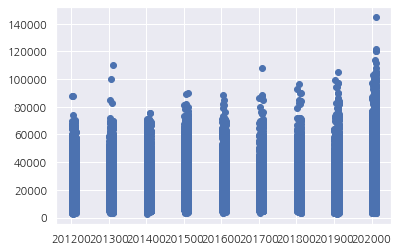

In [22]:
plt.scatter(temp["계약년월"],temp["돈"])

In [23]:
temp["평당가격"] = temp["돈"]/temp["전용면적(㎡)"]
temp

,시군구,전용면적(㎡),계약년월,계약일,거래금액(만원),시,돈,평당가격
18943,경상남도 창원마산합포구 가포동,84.5200,201201,5,"12,450",창원시,12450,147.302414
18944,경상남도 창원마산합포구 가포동,84.5200,201205,20,"10,000",창원시,10000,118.315192
18945,경상남도 창원마산합포구 가포동,83.2900,201212,14,"8,200",창원시,8200,98.451195
18946,경상남도 창원마산합포구 교방동,40.4150,201203,26,"4,700",창원시,4700,116.293455
18947,경상남도 창원마산합포구 교방동,40.4150,201208,1,"5,500",창원시,5500,136.088086
...,...,...,...,...,...,...,...,...
52588,경상남도 창원진해구 풍호동,131.6411,202012,31,"31,800",창원시,31800,241.565894
52589,경상남도 창원진해구 화천동,84.2300,202005,9,"7,000",창원시,7000,83.105782
52590,경상남도 창원진해구 화천동,84.2300,202010,29,"7,300",창원시,7300,86.667458
52591,경상남도 창원진해구 화천동,78.9171,202010,29,"15,600",창원시,15600,197.675789


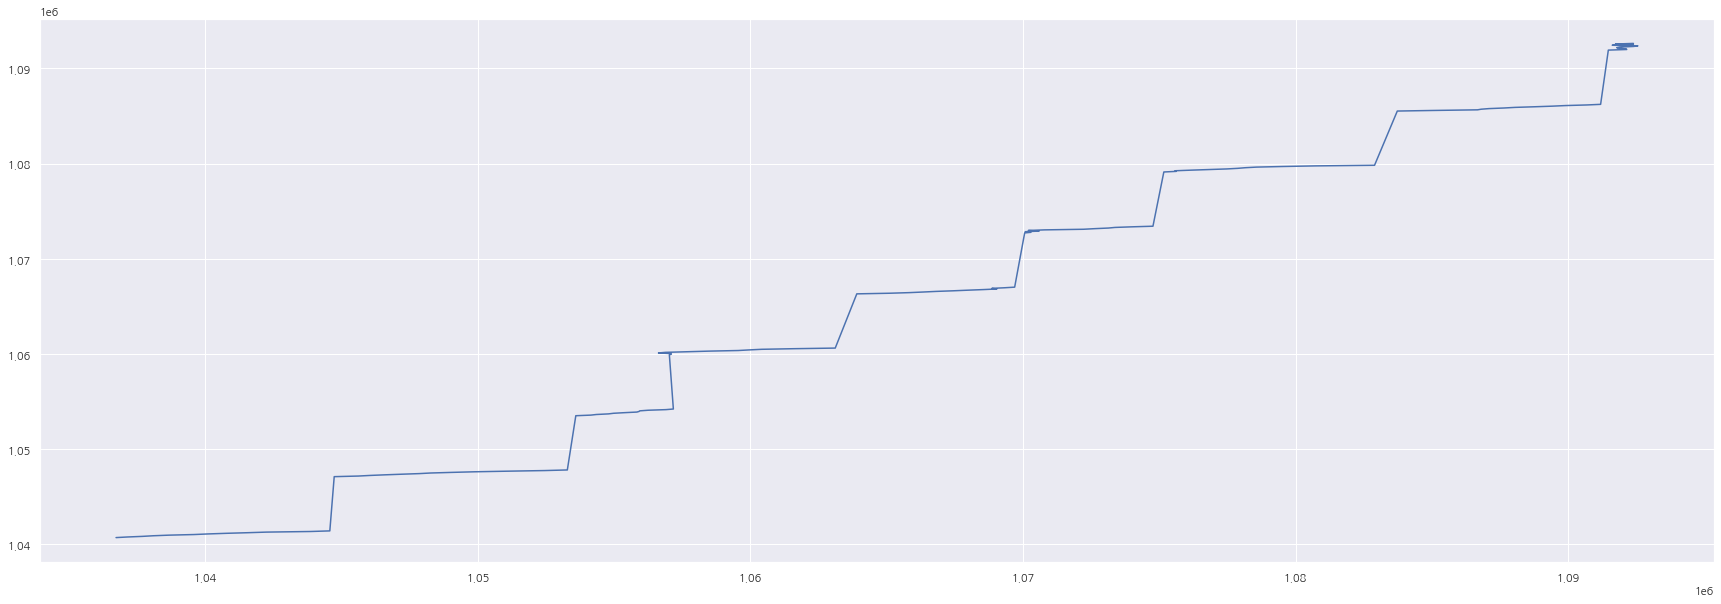

In [24]:
a_f = pd.DataFrame()
pre_list = []
for i in test5["날짜"]:
    pre_list.append(line_fitter.predict([[i]]))

plt.figure(figsize = (30,10))    
plt.plot(test5["총인구수"],pre_list)


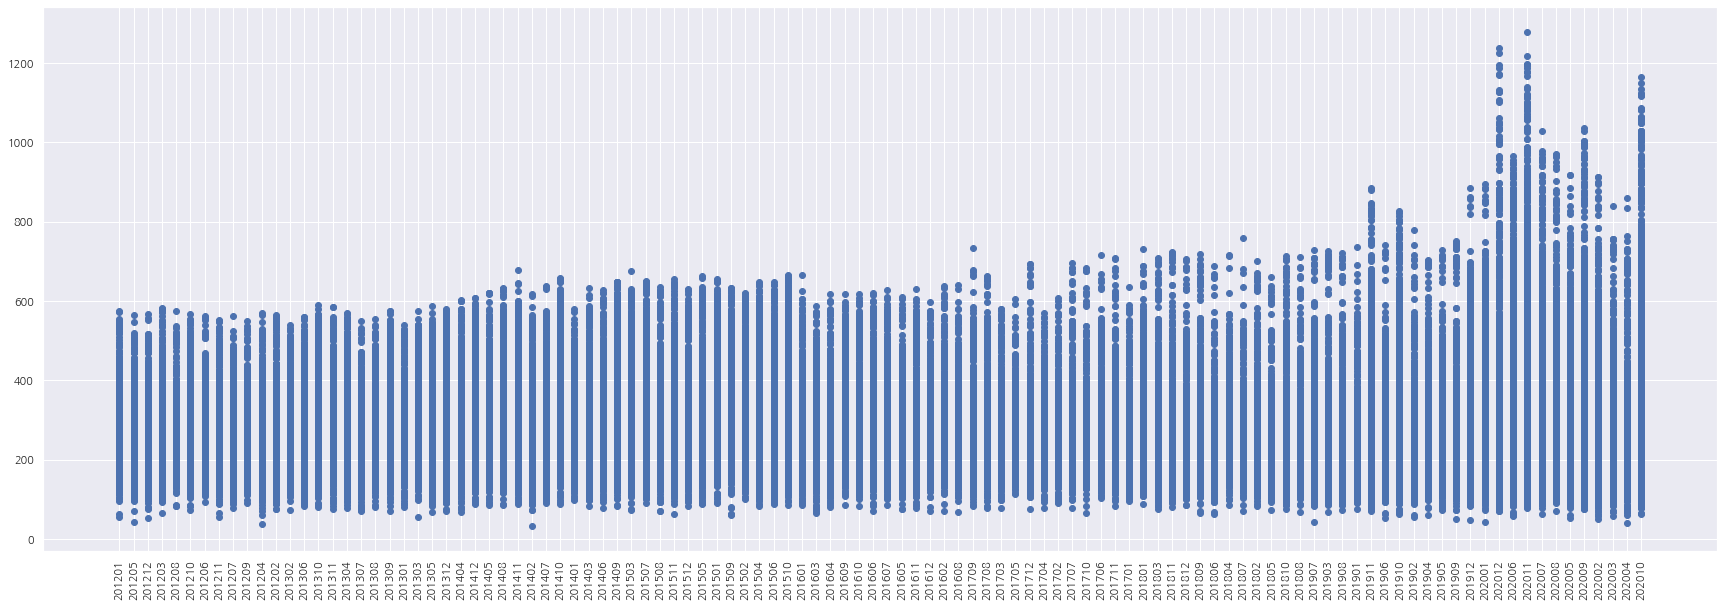

In [25]:
plt.figure(figsize = (30,10))
plt.xticks(rotation = 90)
plt.scatter(temp["계약년월"].astype(str),temp["평당가격"])


In [26]:
temp["평당가격"].max()

1278.4847588043801

In [27]:
line_fitter3 = LinearRegression()
line_fitter3.fit(temp["계약년월"].values.reshape(-1,1), temp["평당가격"])

LinearRegression()

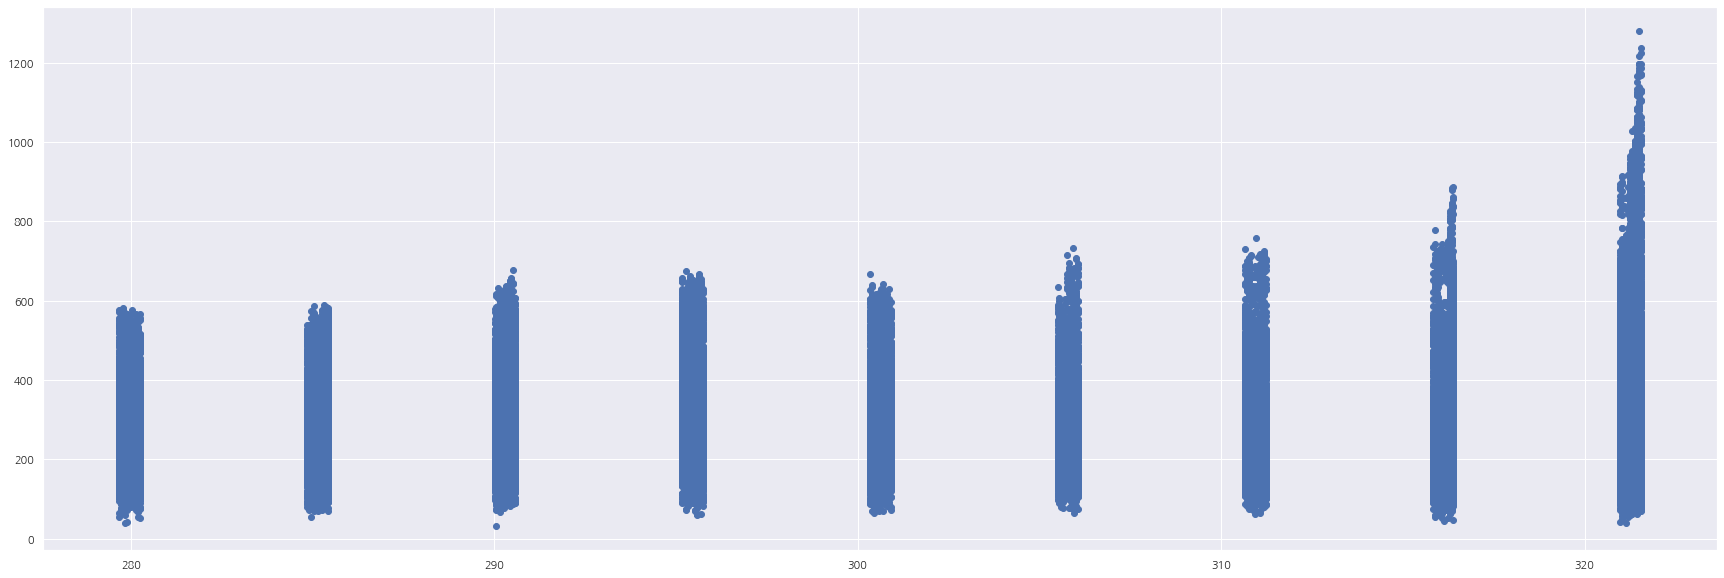

In [28]:
pre_list = []
for i in temp["계약년월"]:
    pre_list.append(line_fitter3.predict([[i]]))

plt.figure(figsize = (30,10))    
plt.scatter(pre_list,temp["평당가격"])

In [29]:
temp2 = temp.groupby("계약년월").apply(lambda x: x.median())
temp2

,전용면적(㎡),계약년월,계약일,돈,평당가격
계약년월,,,,,
201201,65.9076,201201.0,16.0,18330.0,285.643455
201202,59.9800,201202.0,15.0,17500.0,278.111244
201203,59.9900,201203.0,14.5,18000.0,277.388121
201204,59.9700,201204.0,15.0,17500.0,282.535783
201205,60.3800,201205.0,15.0,17715.0,280.267906
...,...,...,...,...,...
202008,84.3840,202008.0,18.0,22800.0,291.699726
202009,71.9910,202009.0,14.0,20200.0,291.439168
202010,79.7100,202010.0,22.0,25300.0,336.546317


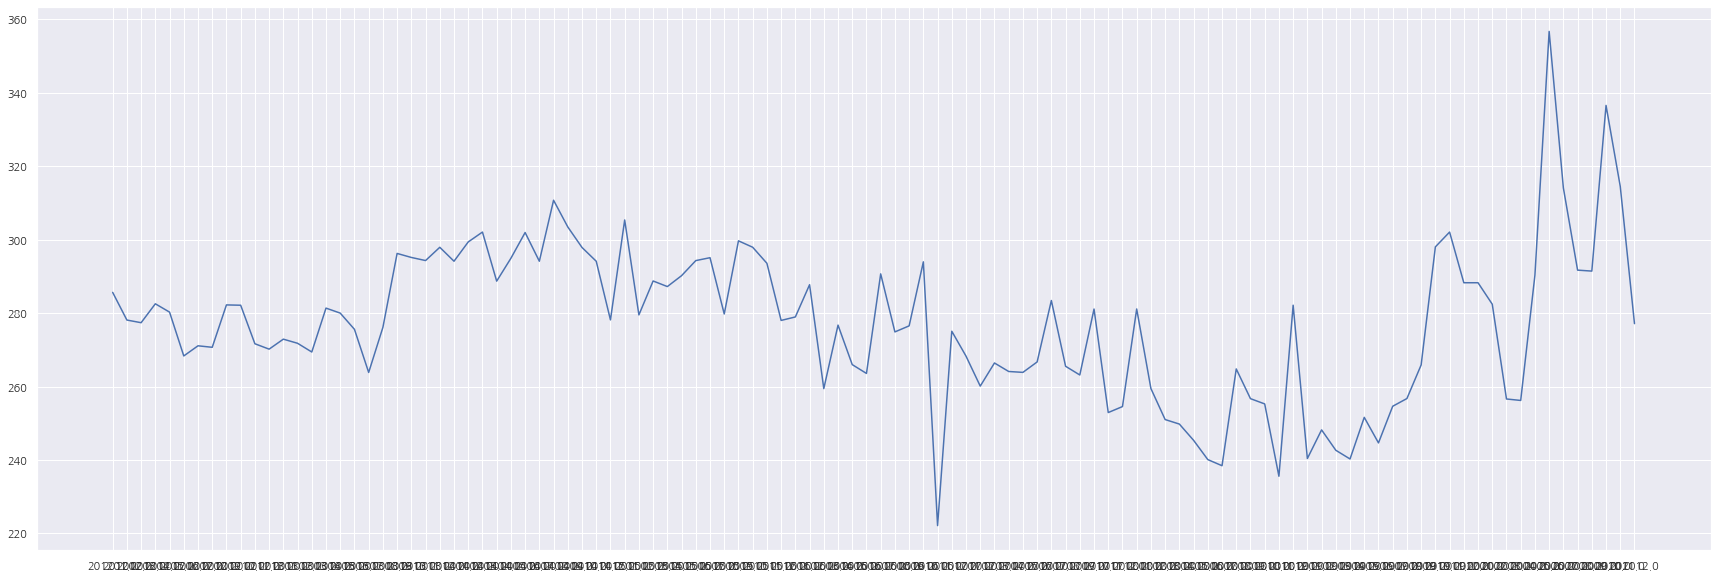

In [30]:
plt.figure(figsize = (30,10))
plt.plot(temp2["계약년월"].astype(str),temp2["평당가격"])

In [31]:
# 날짜를 분포화 시키는 작업
test5

,날짜,금액,총인구수
0,201201,18330.0,1092391.0
1,201202,17500.0,1091733.0
2,201203,18000.0,1092391.0
3,201204,17500.0,1091614.0
4,201205,17715.0,1092554.0
...,...,...,...
103,202008,22800.0,1038677.0
104,202009,20200.0,1038101.0
105,202010,25300.0,1037709.0
106,202011,23000.0,1037161.0


In [32]:
b_list = []
for i in test5["날짜"]:
    j = str(i)
    k = (int(j[2:4])-12) * 12 + (int(j[4:])-1)
    b_list.append(k/107)
test5["날짜분포"] = b_list
test5

,날짜,금액,총인구수,날짜분포
0,201201,18330.0,1092391.0,0.000000
1,201202,17500.0,1091733.0,0.009346
2,201203,18000.0,1092391.0,0.018692
3,201204,17500.0,1091614.0,0.028037
4,201205,17715.0,1092554.0,0.037383
...,...,...,...,...
103,202008,22800.0,1038677.0,0.962617
104,202009,20200.0,1038101.0,0.971963
105,202010,25300.0,1037709.0,0.981308
106,202011,23000.0,1037161.0,0.990654


In [33]:
# 인구수 데이터 회귀 분석
line_fitter4 = LinearRegression()
line_fitter4.fit(test5["날짜분포"].values.reshape(-1,1), test5["총인구수"])

LinearRegression()

In [34]:
line_fitter4.predict([[0]])

array([1095163.24430853])

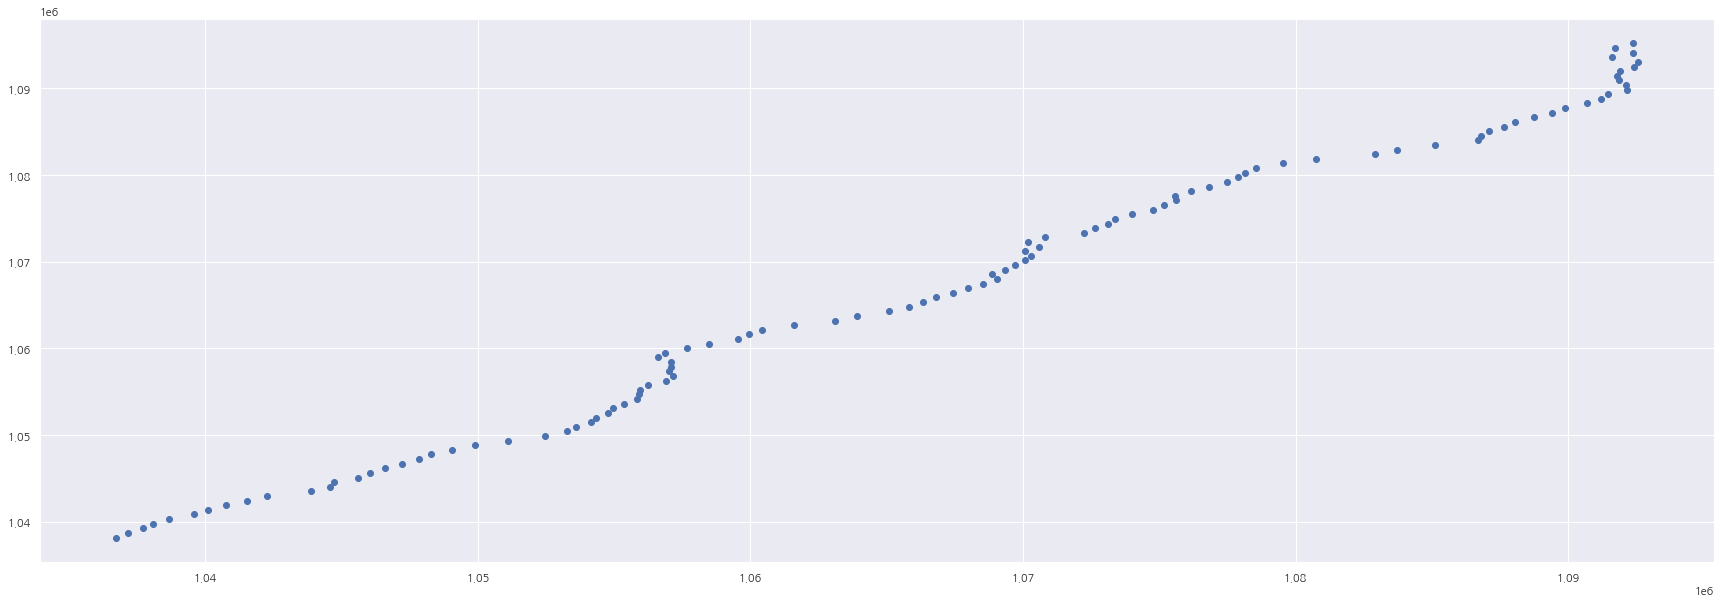

In [35]:
pre_list = []
for i in test5["날짜분포"]:
    pre_list.append(line_fitter4.predict([[i]]))

plt.figure(figsize = (30,10))    
plt.scatter(test5["총인구수"],pre_list)

In [36]:
# 분석 결과 2027년 즈음엔 인구수 100만 명 이하로 떨어지게 된다.
line_fitter4.predict([[1.756]])

array([995059.7202229])

In [37]:
# 대학 인구수 처리
c

,학교별(1),학교현황별(1),학교현황별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019
0,합계,학생수 (명),소계,33601,33159,32684,33470,33366,32829,32149,31200,30816
1,합계,학생수 (명),남,22826,22226,21611,21791,21389,20694,20273,19481,19451
2,합계,학생수 (명),여,10775,10933,11073,11679,11977,12135,11876,11719,11365
3,합계,입학자 현황 (명),입학지원자수,34507,30669,29682,26986,31323,30364,33319,31959,30273
4,합계,입학자 현황 (명),입학자수,5576,5344,5475,5856,5673,5611,5522,5502,5490


In [38]:
c_1

,학교별(1),학교현황별(1),학교현황별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019
0,합계,학생수 (명),소계,17366,14531,13471,12437,11715,10840,11499,10939,11036
1,합계,학생수 (명),남,10093,7430,6876,6503,6070,5481,6322,5988,6062
2,합계,학생수 (명),여,7273,7101,6595,5934,5645,5359,5177,4951,4974
3,합계,입학상황 (명),입학지원자수,22318,28485,22114,23784,23018,22901,28173,30906,36935
4,합계,입학상황 (명),입학자수,6945,7337,5884,5749,5241,4871,4601,4674,4324


In [39]:
c2 = pd.concat([c,c_1])
c2

,학교별(1),학교현황별(1),학교현황별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019
0,합계,학생수 (명),소계,33601,33159,32684,33470,33366,32829,32149,31200,30816
1,합계,학생수 (명),남,22826,22226,21611,21791,21389,20694,20273,19481,19451
2,합계,학생수 (명),여,10775,10933,11073,11679,11977,12135,11876,11719,11365
3,합계,입학자 현황 (명),입학지원자수,34507,30669,29682,26986,31323,30364,33319,31959,30273
4,합계,입학자 현황 (명),입학자수,5576,5344,5475,5856,5673,5611,5522,5502,5490
0,합계,학생수 (명),소계,17366,14531,13471,12437,11715,10840,11499,10939,11036
1,합계,학생수 (명),남,10093,7430,6876,6503,6070,5481,6322,5988,6062
2,합계,학생수 (명),여,7273,7101,6595,5934,5645,5359,5177,4951,4974
3,합계,입학상황 (명),입학지원자수,22318,28485,22114,23784,23018,22901,28173,30906,36935
4,합계,입학상황 (명),입학자수,6945,7337,5884,5749,5241,4871,4601,4674,4324


In [40]:
c3 = c2.drop(columns = ["학교별(1)","학교현황별(1)"])
c3

,학교현황별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019
0,소계,33601,33159,32684,33470,33366,32829,32149,31200,30816
1,남,22826,22226,21611,21791,21389,20694,20273,19481,19451
2,여,10775,10933,11073,11679,11977,12135,11876,11719,11365
3,입학지원자수,34507,30669,29682,26986,31323,30364,33319,31959,30273
4,입학자수,5576,5344,5475,5856,5673,5611,5522,5502,5490
0,소계,17366,14531,13471,12437,11715,10840,11499,10939,11036
1,남,10093,7430,6876,6503,6070,5481,6322,5988,6062
2,여,7273,7101,6595,5934,5645,5359,5177,4951,4974
3,입학지원자수,22318,28485,22114,23784,23018,22901,28173,30906,36935
4,입학자수,6945,7337,5884,5749,5241,4871,4601,4674,4324


In [41]:
c4 = c3.groupby("학교현황별(2)").apply(lambda x: x.sum())
c4

,학교현황별(2),2011,2012,2013,2014,2015,2016,2017,2018,2019
학교현황별(2),,,,,,,,,,
남,남남,32919,29656,28487,28294,27459,26175,26595,25469,25513
소계,소계소계,50967,47690,46155,45907,45081,43669,43648,42139,41852
여,여여,18048,18034,17668,17613,17622,17494,17053,16670,16339
입학자수,입학자수입학자수,12521,12681,11359,11605,10914,10482,10123,10176,9814
입학지원자수,입학지원자수입학지원자수,56825,59154,51796,50770,54341,53265,61492,62865,67208


<AxesSubplot:>

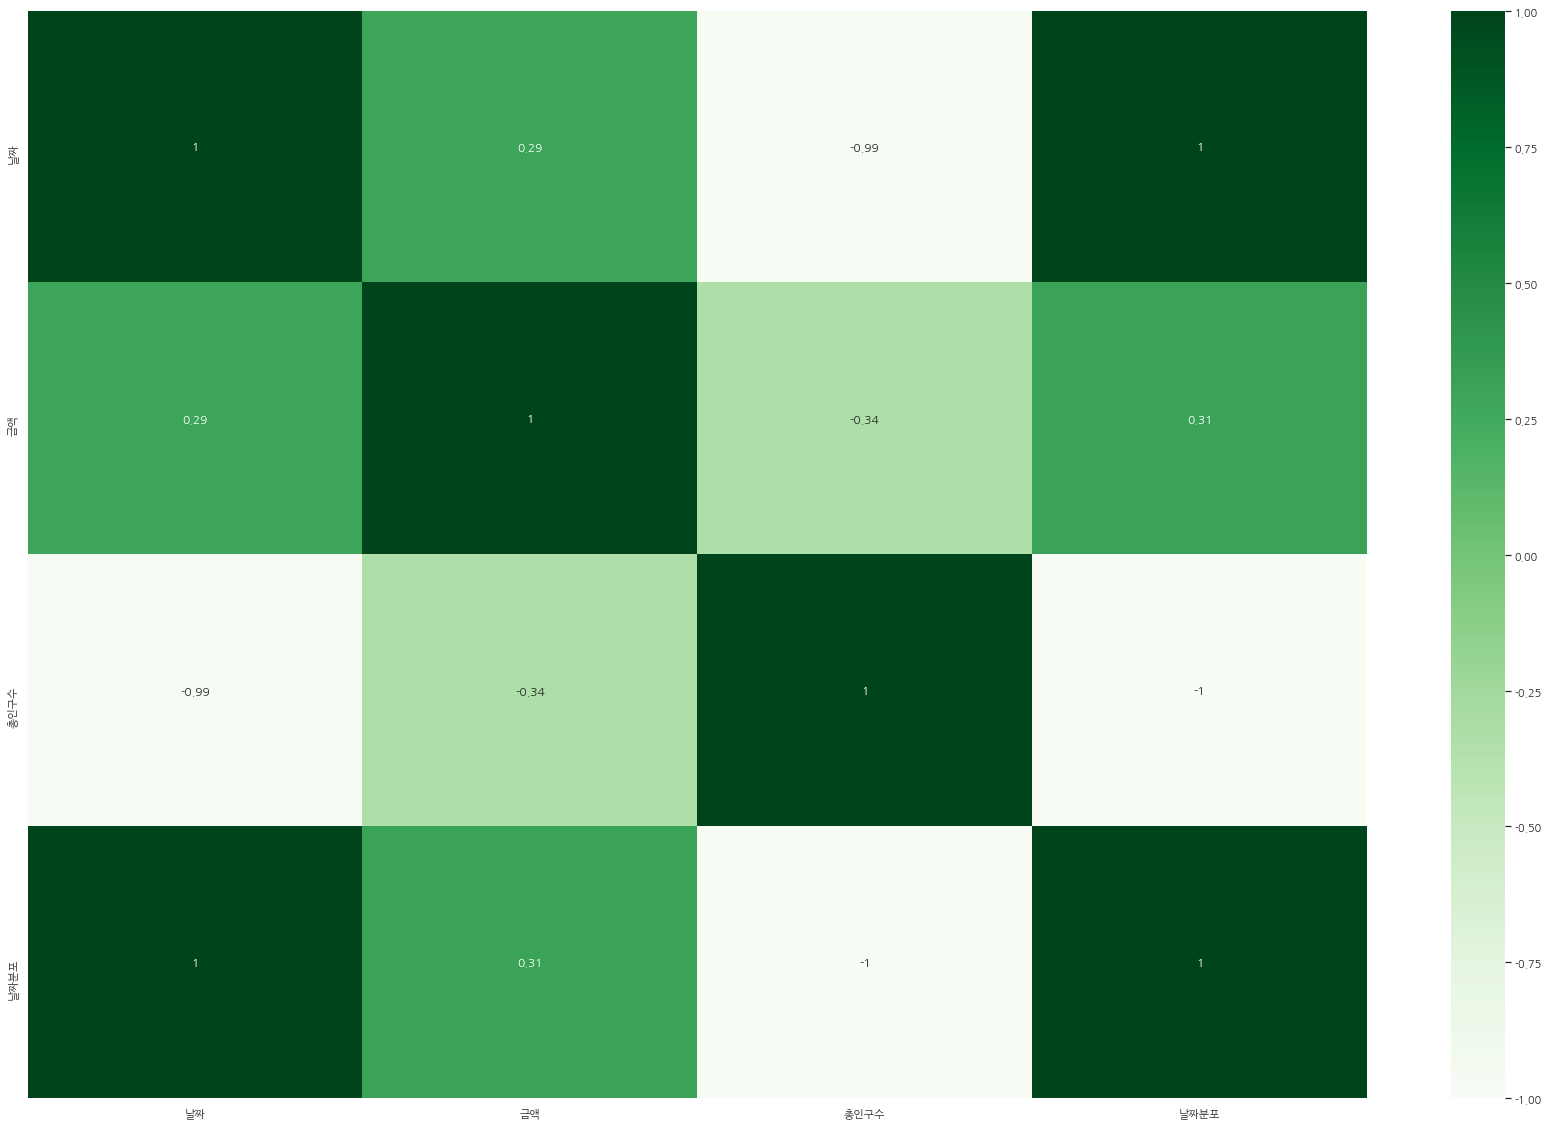

In [42]:
plt.figure(figsize = (30,20))
sns.heatmap(test5.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [43]:
test5

,날짜,금액,총인구수,날짜분포
0,201201,18330.0,1092391.0,0.000000
1,201202,17500.0,1091733.0,0.009346
2,201203,18000.0,1092391.0,0.018692
3,201204,17500.0,1091614.0,0.028037
4,201205,17715.0,1092554.0,0.037383
...,...,...,...,...
103,202008,22800.0,1038677.0,0.962617
104,202009,20200.0,1038101.0,0.971963
105,202010,25300.0,1037709.0,0.981308
106,202011,23000.0,1037161.0,0.990654


In [44]:
test6 = test5.drop(columns = "날짜")
test6

,금액,총인구수,날짜분포
0,18330.0,1092391.0,0.000000
1,17500.0,1091733.0,0.009346
2,18000.0,1092391.0,0.018692
3,17500.0,1091614.0,0.028037
4,17715.0,1092554.0,0.037383
...,...,...,...
103,22800.0,1038677.0,0.962617
104,20200.0,1038101.0,0.971963
105,25300.0,1037709.0,0.981308
106,23000.0,1037161.0,0.990654


<AxesSubplot:>

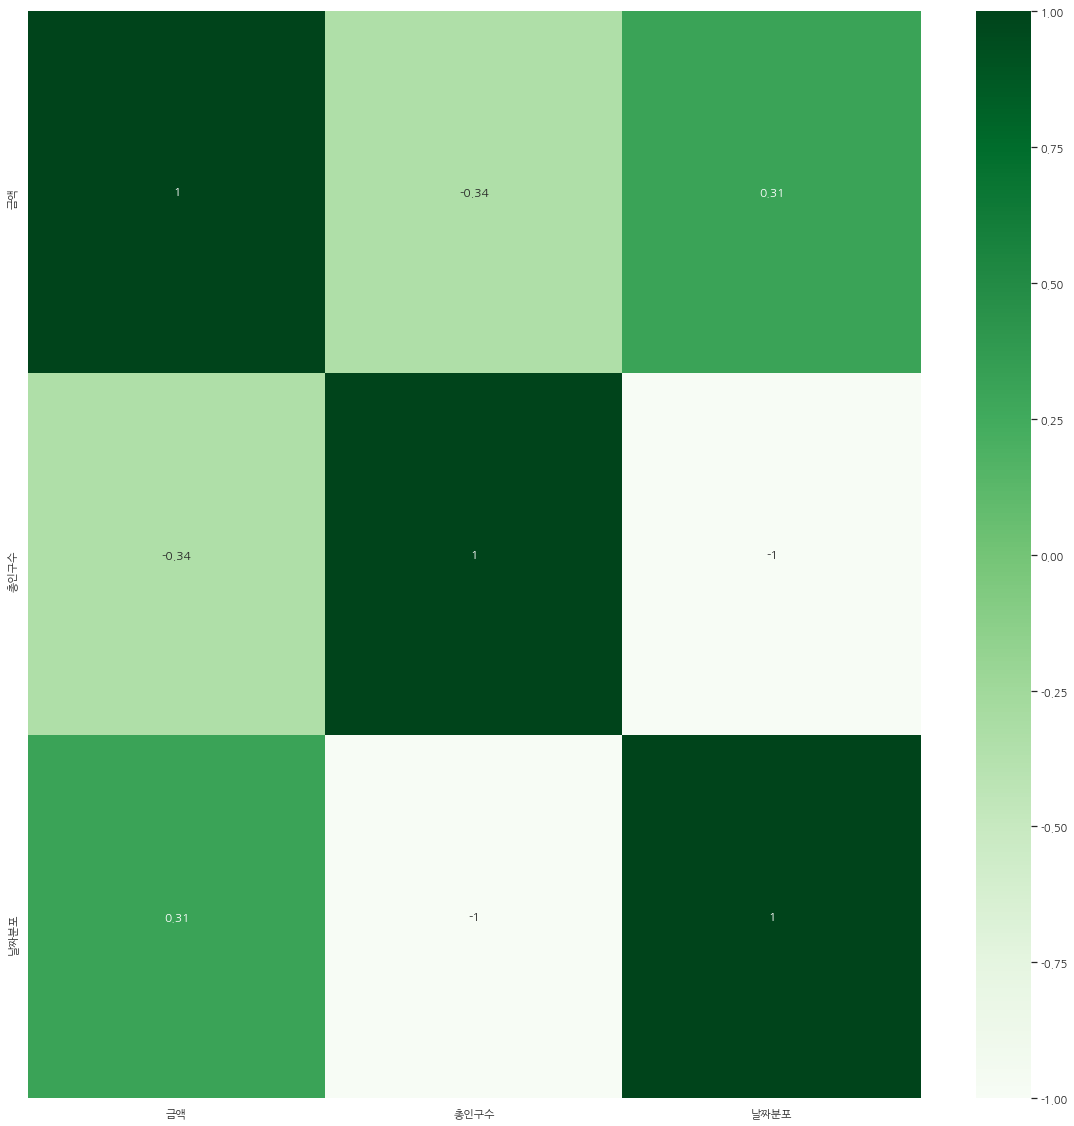

In [45]:
plt.figure(figsize = (20,20))
sns.heatmap(test6.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [46]:
#데이터 병합(집값, 노후도, 신입생수, 어린이집 수, )
c5 = c4.T
c5

학교현황별(2),남,소계,여,입학자수,입학지원자수
학교현황별(2),남남,소계소계,여여,입학자수입학자수,입학지원자수입학지원자수
2011,32919,50967,18048,12521,56825
2012,29656,47690,18034,12681,59154
2013,28487,46155,17668,11359,51796
2014,28294,45907,17613,11605,50770
2015,27459,45081,17622,10914,54341
2016,26175,43669,17494,10482,53265
2017,26595,43648,17053,10123,61492
2018,25469,42139,16670,10176,62865
2019,25513,41852,16339,9814,67208


In [47]:
c6 = c5.drop(c5.index[0:2])
c6 = c6.reset_index()
c6

학교현황별(2),index,남,소계,여,입학자수,입학지원자수
0,2012,29656,47690,18034,12681,59154
1,2013,28487,46155,17668,11359,51796
2,2014,28294,45907,17613,11605,50770
3,2015,27459,45081,17622,10914,54341
4,2016,26175,43669,17494,10482,53265
5,2017,26595,43648,17053,10123,61492
6,2018,25469,42139,16670,10176,62865
7,2019,25513,41852,16339,9814,67208


In [48]:
# 대학 인구 병합 1단계: 년도별 데이터 => 월별 데이터로 변환
c7 = pd.DataFrame()
c7["날짜"] = test6["날짜분포"]
c_list = []
j = 0
for i in c6["입학자수"]:
    for j in range(0,12):
        c_list.append(i)
 

In [49]:
# 2020년도의 데이터를 확보하기 위해서 선형 회귀를 사용
univ_fitter = LinearRegression()
univ_fitter.fit(c6["index"].values.reshape(-1,1), c6["입학자수"])

LinearRegression()

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to n

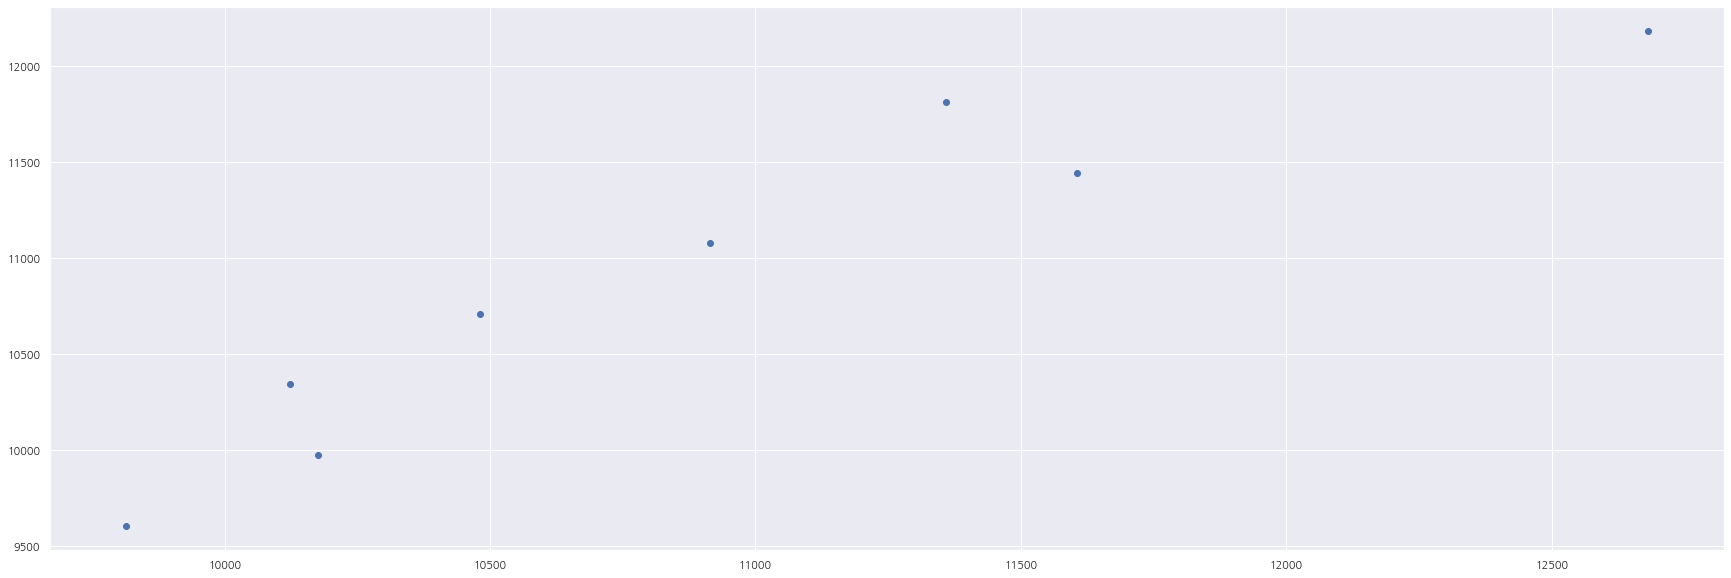

In [50]:
pre_list = []
for i in c6["index"]:
    pre_list.append(univ_fitter.predict([[i]]))


plt.figure(figsize = (30,10))   
plt.scatter(c6["입학자수"],pre_list)

In [51]:
univ_fitter.predict([[2020]])

array([9240.92857143])

In [52]:
for i in range(0,12):
    c_list.append(9240)
c_list

[12681,
 12681,
 12681,
 12681,
 12681,
 12681,
 12681,
 12681,
 12681,
 12681,
 12681,
 12681,
 11359,
 11359,
 11359,
 11359,
 11359,
 11359,
 11359,
 11359,
 11359,
 11359,
 11359,
 11359,
 11605,
 11605,
 11605,
 11605,
 11605,
 11605,
 11605,
 11605,
 11605,
 11605,
 11605,
 11605,
 10914,
 10914,
 10914,
 10914,
 10914,
 10914,
 10914,
 10914,
 10914,
 10914,
 10914,
 10914,
 10482,
 10482,
 10482,
 10482,
 10482,
 10482,
 10482,
 10482,
 10482,
 10482,
 10482,
 10482,
 10123,
 10123,
 10123,
 10123,
 10123,
 10123,
 10123,
 10123,
 10123,
 10123,
 10123,
 10123,
 10176,
 10176,
 10176,
 10176,
 10176,
 10176,
 10176,
 10176,
 10176,
 10176,
 10176,
 10176,
 9814,
 9814,
 9814,
 9814,
 9814,
 9814,
 9814,
 9814,
 9814,
 9814,
 9814,
 9814,
 9240,
 9240,
 9240,
 9240,
 9240,
 9240,
 9240,
 9240,
 9240,
 9240,
 9240,
 9240]

In [53]:
c7["총인구수"] = c_list
c7

,날짜,총인구수
0,0.000000,12681
1,0.009346,12681
2,0.018692,12681
3,0.028037,12681
4,0.037383,12681
...,...,...
103,0.962617,9240
104,0.971963,9240
105,0.981308,9240
106,0.990654,9240


In [54]:
test7 = test6
test7["대학입학생수"] = c7["총인구수"]
test7

,금액,총인구수,날짜분포,대학입학생수
0,18330.0,1092391.0,0.000000,12681
1,17500.0,1091733.0,0.009346,12681
2,18000.0,1092391.0,0.018692,12681
3,17500.0,1091614.0,0.028037,12681
4,17715.0,1092554.0,0.037383,12681
...,...,...,...,...
103,22800.0,1038677.0,0.962617,9240
104,20200.0,1038101.0,0.971963,9240
105,25300.0,1037709.0,0.981308,9240
106,23000.0,1037161.0,0.990654,9240


<AxesSubplot:>

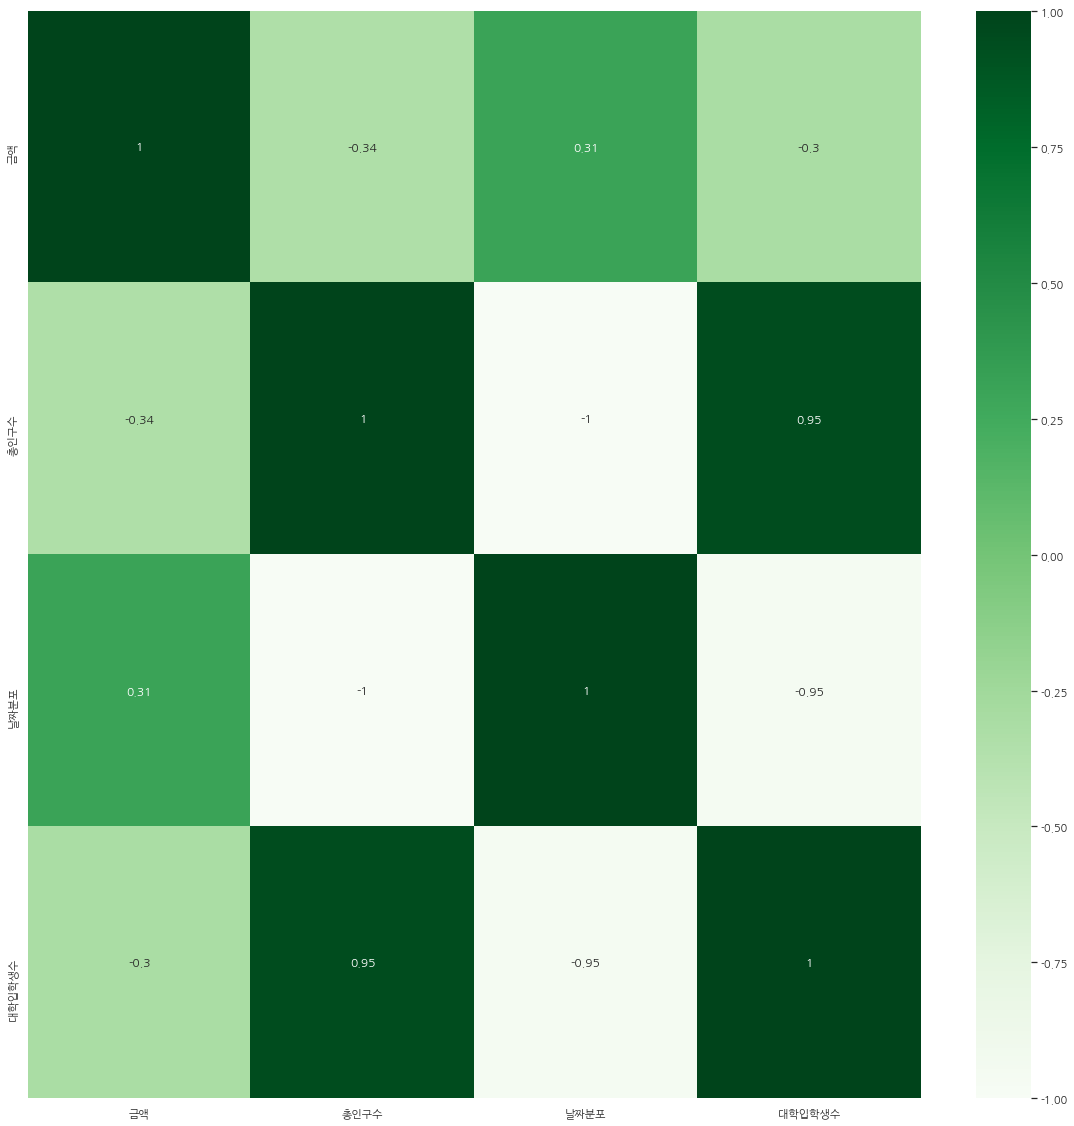

In [55]:
plt.figure(figsize = (20,20))
sns.heatmap(test7.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [56]:
test7.corr()

,금액,총인구수,날짜분포,대학입학생수
금액,1.000000,-0.338629,0.305181,-0.304789
총인구수,-0.338629,1.000000,-0.995566,0.947614
날짜분포,0.305181,-0.995566,1.000000,-0.953935
대학입학생수,-0.304789,0.947614,-0.953935,1.000000


In [57]:
d = pd.read_csv("c://python//산업별_사업체수_및_종사자수_창원.csv",encoding='cp949') # 산업 데이터
d

,행정구역별(1),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,...,2018.32,2018.33,2018.34,2018.35,2018.36,2018.37,2018.38,2018.39,2018.40,2018.41
0,행정구역별(1),합계,합계,합계,합계,농업임업 및 어업,농업임업 및 어업,광업,광업,제조업,...,공공행정국방 및 사회보장행정,공공행정국방 및 사회보장행정,교육서비스업,교육서비스업,보건업 및 사회복지 서비스업,보건업 및 사회복지 서비스업,예술스포츠 및 여가관련 서비스,예술스포츠 및 여가관련 서비스,협회 및 단체수리 및 기타 개인서비스업,협회 및 단체수리 및 기타 개인서비스업
1,행정구역별(1),사업체수 (개),종사자수 (명),남자종사자수 (명),여자종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),...,사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명)
2,합계,73470,407513,246139,161374,12,214,4,30,7797,...,224,13692,4397,30720,2960,38131,2437,7458,9300,18434
3,의창구,19992,100478,60570,39908,7,177,1,3,2318,...,66,7148,983,8174,695,9637,658,2486,2466,4980
4,성산구,14895,144173,100234,43939,2,12,NaN,NaN,2271,...,22,1738,1149,7175,651,7619,506,1454,1729,3834
5,마산합포구,15229,53931,27381,26550,3,25,2,24,1023,...,61,2007,745,5225,540,7679,434,1081,1937,3618
6,마산회원구,13524,65304,33770,31534,NaN,NaN,NaN,NaN,1655,...,33,1588,790,5801,538,7617,434,1240,1771,3609
7,진해구,9830,43627,24184,19443,NaN,NaN,1,3,530,...,42,1211,730,4345,536,5579,405,1197,1397,2393


In [58]:
d2_1 = d[d["행정구역별(1)"]=="합계"]
d2_2 = d[d["행정구역별(1)"]=="행정구역별(1)"]
d2 = pd.concat([d2_2,d2_1])
d2

,행정구역별(1),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,...,2018.32,2018.33,2018.34,2018.35,2018.36,2018.37,2018.38,2018.39,2018.40,2018.41
0,행정구역별(1),합계,합계,합계,합계,농업임업 및 어업,농업임업 및 어업,광업,광업,제조업,...,공공행정국방 및 사회보장행정,공공행정국방 및 사회보장행정,교육서비스업,교육서비스업,보건업 및 사회복지 서비스업,보건업 및 사회복지 서비스업,예술스포츠 및 여가관련 서비스,예술스포츠 및 여가관련 서비스,협회 및 단체수리 및 기타 개인서비스업,협회 및 단체수리 및 기타 개인서비스업
1,행정구역별(1),사업체수 (개),종사자수 (명),남자종사자수 (명),여자종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),...,사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명)
2,합계,73470,407513,246139,161374,12,214,4,30,7797,...,224,13692,4397,30720,2960,38131,2437,7458,9300,18434


In [59]:
d3 = d2.T
d3

,0,1,2
행정구역별(1),행정구역별(1),행정구역별(1),합계
2011,합계,사업체수 (개),73470
2011.1,합계,종사자수 (명),407513
2011.2,합계,남자종사자수 (명),246139
2011.3,합계,여자종사자수 (명),161374
...,...,...,...
2018.37,보건업 및 사회복지 서비스업,종사자수 (명),38131
2018.38,예술스포츠 및 여가관련 서비스,사업체수 (개),2437
2018.39,예술스포츠 및 여가관련 서비스,종사자수 (명),7458
2018.40,협회 및 단체수리 및 기타 개인서비스업,사업체수 (개),9300


In [60]:
d4 = d3[d3[0] == "합계"]
d4

,0,1,2
2011,합계,사업체수 (개),73470
2011.1,합계,종사자수 (명),407513
2011.2,합계,남자종사자수 (명),246139
2011.3,합계,여자종사자수 (명),161374
2012,합계,사업체수 (개),79305
2012.1,합계,종사자수 (명),418680
2012.2,합계,남자종사자수 (명),251821
2012.3,합계,여자종사자수 (명),165859
2013,합계,사업체수 (개),80093
2013.1,합계,종사자수 (명),423669


In [61]:
# 산업 분류 => 전체 산업체수와 종사자수는 오히려 증가한 상황, 세부적으로는 제조업은 사업체와 종사잔는 감소
# 따라서, 산업체 규모별로 규모가 가장 큰 산업을 창원의 주요 산업으로 선정, 주요 산업의 증감을 조사한다.
d_test = d.T
d_test

,0,1,2,3,4,5,6,7
행정구역별(1),행정구역별(1),행정구역별(1),합계,의창구,성산구,마산합포구,마산회원구,진해구
2011,합계,사업체수 (개),73470,19992,14895,15229,13524,9830
2011.1,합계,종사자수 (명),407513,100478,144173,53931,65304,43627
2011.2,합계,남자종사자수 (명),246139,60570,100234,27381,33770,24184
2011.3,합계,여자종사자수 (명),161374,39908,43939,26550,31534,19443
...,...,...,...,...,...,...,...,...
2018.37,보건업 및 사회복지 서비스업,종사자수 (명),38131,9637,7619,7679,7617,5579
2018.38,예술스포츠 및 여가관련 서비스,사업체수 (개),2437,658,506,434,434,405
2018.39,예술스포츠 및 여가관련 서비스,종사자수 (명),7458,2486,1454,1081,1240,1197
2018.40,협회 및 단체수리 및 기타 개인서비스업,사업체수 (개),9300,2466,1729,1937,1771,1397


In [62]:
d_test2 = d_test[d_test[0]=="제조업"]
d_test2

,0,1,2,3,4,5,6,7
2011.8,제조업,사업체수 (개),7797,2318,2271,1023,1655,530
2011.9,제조업,종사자수 (명),133582,24308,78532,5354,14643,10745
2012.8,제조업,사업체수 (개),8640,2524,2682,1043,1809,582
2012.9,제조업,종사자수 (명),133757,24612,78253,5398,14508,10986
2013.6,제조업,사업체수 (개),8658,2539,2674,1084,1758,603
2013.7,제조업,종사자수 (명),131886,24567,77799,5609,13936,9975
2014.6,제조업,사업체수 (개),9322,2853,2863,1136,1828,642
2014.7,제조업,종사자수 (명),133226,25050,77327,6973,13954,9922
2015.8,제조업,사업체수 (개),9923,3100,3012,1189,1938,684
2015.9,제조업,종사자수 (명),131729,25721,74819,7584,13919,9686


In [63]:
d_test3 = d_test2.drop(columns = [3,4,5,6,7])
d_test3_1 = d_test3[d_test3[1]=="사업체수 (개)"]
d_test3_2 = d_test3[d_test3[1]=="종사자수 (명)"]
d_test3_1

,0,1,2
2011.8,제조업,사업체수 (개),7797
2012.8,제조업,사업체수 (개),8640
2013.6,제조업,사업체수 (개),8658
2014.6,제조업,사업체수 (개),9322
2015.8,제조업,사업체수 (개),9923
2016.8,제조업,사업체수 (개),9956
2017.8,제조업,사업체수 (개),10128
2018.8,제조업,사업체수 (개),10137


In [64]:
d_test_order = [2011,2012,2013,2014,2015,2016,2017,2018]
d_test3_1["날짜"] = d_test_order
d_test3_2["날짜"] = d_test_order

d_test3_1 = d_test3_1.drop(d_test3_1.index[0])
d_test3_2 = d_test3_2.drop(d_test3_2.index[0])
d_test3_2

<ipython-input-64-fa598b5180e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_test3_1["날짜"] = d_test_order
<ipython-input-64-fa598b5180e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_test3_2["날짜"] = d_test_order


,0,1,2,날짜
2012.9,제조업,종사자수 (명),133757,2012
2013.7,제조업,종사자수 (명),131886,2013
2014.7,제조업,종사자수 (명),133226,2014
2015.9,제조업,종사자수 (명),131729,2015
2016.9,제조업,종사자수 (명),131460,2016
2017.9,제조업,종사자수 (명),131305,2017
2018.9,제조업,종사자수 (명),128222,2018


In [65]:
i_list = []
for i in d_test3_1[2]:
    for j in range(0,12):
        i_list.append(i)
        
i_list2 = []
for i in d_test3_2[2]:
    for j in range(0,12):
        i_list2.append(i)

print(len(i_list))

84


In [66]:
# 2020년도의 데이터를 확보하기 위해서 선형 회귀를 사용
ind_fitter = LinearRegression()
ind_fitter.fit(d_test3_1["날짜"].values.reshape(-1,1), d_test3_1[2])

ind_fitter2 = LinearRegression()
ind_fitter2.fit(d_test3_2["날짜"].values.reshape(-1,1), d_test3_2[2])

LinearRegression()

In [67]:
temp1_1 = ind_fitter.predict([[2019]])
temp1_2 = ind_fitter.predict([[2020]])

temp2_1 = ind_fitter2.predict([[2019]])
temp2_2 = ind_fitter2.predict([[2020]])
temp2_2

array([128166.96428571])

In [68]:
for j in range(0,12):
    i_list.append(10837)

for j in range(0,12):
    i_list.append(11174)

for j in range(0,12):
    i_list2.append(129080)

for j in range(0,12):
    i_list2.append(128454)
i_list2

['133757',
 '133757',
 '133757',
 '133757',
 '133757',
 '133757',
 '133757',
 '133757',
 '133757',
 '133757',
 '133757',
 '133757',
 '131886',
 '131886',
 '131886',
 '131886',
 '131886',
 '131886',
 '131886',
 '131886',
 '131886',
 '131886',
 '131886',
 '131886',
 '133226',
 '133226',
 '133226',
 '133226',
 '133226',
 '133226',
 '133226',
 '133226',
 '133226',
 '133226',
 '133226',
 '133226',
 '131729',
 '131729',
 '131729',
 '131729',
 '131729',
 '131729',
 '131729',
 '131729',
 '131729',
 '131729',
 '131729',
 '131729',
 '131460',
 '131460',
 '131460',
 '131460',
 '131460',
 '131460',
 '131460',
 '131460',
 '131460',
 '131460',
 '131460',
 '131460',
 '131305',
 '131305',
 '131305',
 '131305',
 '131305',
 '131305',
 '131305',
 '131305',
 '131305',
 '131305',
 '131305',
 '131305',
 '128222',
 '128222',
 '128222',
 '128222',
 '128222',
 '128222',
 '128222',
 '128222',
 '128222',
 '128222',
 '128222',
 '128222',
 129080,
 129080,
 129080,
 129080,
 129080,
 129080,
 129080,
 129080,
 129

In [69]:
print(len(i_list))
i_list = [int (i) for i in i_list]
i_list2 = [int (i) for i in i_list2]

108


In [70]:
test8 = test7
test8["제조업사업체수"] = i_list
test8["제조업종사자수"] = i_list2
test8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   금액       108 non-null    float64
 1   총인구수     108 non-null    float64
 2   날짜분포     108 non-null    float64
 3   대학입학생수   108 non-null    int64  
 4   제조업사업체수  108 non-null    int64  
 5   제조업종사자수  108 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 5.9 KB


<AxesSubplot:>

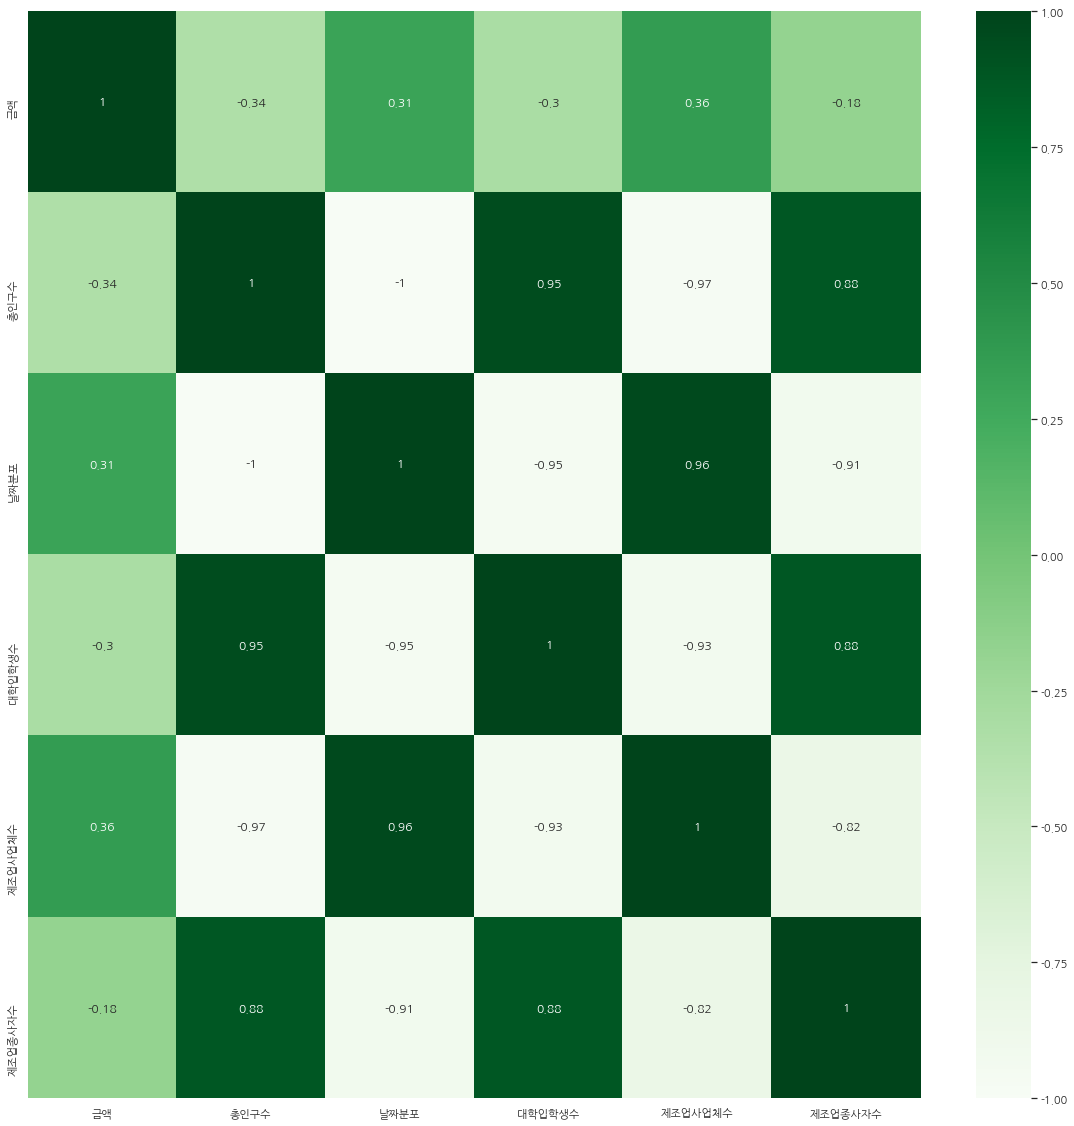

In [71]:
plt.figure(figsize = (20,20))
sns.heatmap(test8.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [72]:
e = pd.read_csv("c://python//창원시_출생_사망_혼인.csv",encoding='cp949') # 산업 데이터
e

,행정구역별,2011,2011.1,2011.2,2012,2012.1,2012.2,2013,2013.1,2013.2,...,2017.1,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1
0,행정구역별,출생건수 (명),사망건수 (명),혼인건수 (건),출생건수 (명),사망건수 (명),혼인건수 (건),출생건수 (명),사망건수 (명),혼인건수 (건),...,사망건수 (명),혼인건수 (건),출생건수 (명),사망건수 (명),혼인건수 (건),출생건수 (명),사망건수 (명),혼인건수 (건),출생건수 (명),혼인건수 (건)
1,통합창원시,11223,4776,7320,11627,4932,7256,10207,4877,6897,...,5362,5265,6922,5615,4928,6249,5473,4444,5376,3897


In [73]:
e2 = e.T
e2

,0,1
행정구역별,행정구역별,통합창원시
2011,출생건수 (명),11223
2011.1,사망건수 (명),4776
2011.2,혼인건수 (건),7320
2012,출생건수 (명),11627
2012.1,사망건수 (명),4932
2012.2,혼인건수 (건),7256
2013,출생건수 (명),10207
2013.1,사망건수 (명),4877
2013.2,혼인건수 (건),6897


In [74]:
e3 = e2.drop(e2.index[0])
e3

,0,1
2011,출생건수 (명),11223
2011.1,사망건수 (명),4776
2011.2,혼인건수 (건),7320
2012,출생건수 (명),11627
2012.1,사망건수 (명),4932
2012.2,혼인건수 (건),7256
2013,출생건수 (명),10207
2013.1,사망건수 (명),4877
2013.2,혼인건수 (건),6897
2014,출생건수 (명),9684


In [75]:
e31 = e3[e3[0]=="출생건수 (명)"]
e32 = e3[e3[0]=="사망건수 (명)"]
e33 = e3[e3[0]=="혼인건수 (건)"]

e31 = e31.drop(e31.index[0])
e32 = e32.drop(e32.index[0])
e33 = e33.drop(e33.index[0])
e32

,0,1
2012.1,사망건수 (명),4932
2013.1,사망건수 (명),4877
2014.1,사망건수 (명),4989
2015.1,사망건수 (명),5286
2016.1,사망건수 (명),5294
2017.1,사망건수 (명),5362
2018.1,사망건수 (명),5615
2019.1,사망건수 (명),5473


In [76]:
e_order = [2012,2013,2014,2015,2016,2017,2018,2019,2020]
e_list = []
e_list2 = []
e_list3 = []

for i in e31[1]:
    for j in range(0,12):
        e_list.append(i)

for i in e32[1]:
    for j in range(0,12):
        e_list2.append(i)

for i in e33[1]:
    for j in range(0,12):
        e_list3.append(i)


In [77]:
e_order = [2012,2013,2014,2015,2016,2017,2018,2019]
e32["날짜"] = e_order
e_fitter = LinearRegression()
e_fitter.fit(e32["날짜"].values.reshape(-1,1), e32[1])

LinearRegression()

In [78]:
e_fitter.predict([[2020]])

array([5689.42857143])

In [79]:
for i in range(0,12):
    e_list2.append(5689)

e4 = pd.DataFrame()
e4["출생인구"] = e_list
e4["사망인구"] = e_list2
e4["결혼건수"] = e_list3
e4

,출생인구,사망인구,결혼건수
0,11627,4932,7256
1,11627,4932,7256
2,11627,4932,7256
3,11627,4932,7256
4,11627,4932,7256
...,...,...,...
103,5376,5689,3897
104,5376,5689,3897
105,5376,5689,3897
106,5376,5689,3897


In [80]:
test9 = test8
e_list = [int (i) for i in e_list]
e_list2 = [int (i) for i in e_list2]
e_list3 = [int (i) for i in e_list3]

test9["출생인구"] = e_list
test9["사망인구"] = e_list2
test9["결혼건수"] = e_list3
test9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   금액       108 non-null    float64
 1   총인구수     108 non-null    float64
 2   날짜분포     108 non-null    float64
 3   대학입학생수   108 non-null    int64  
 4   제조업사업체수  108 non-null    int64  
 5   제조업종사자수  108 non-null    int64  
 6   출생인구     108 non-null    int64  
 7   사망인구     108 non-null    int64  
 8   결혼건수     108 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 8.4 KB


<AxesSubplot:>

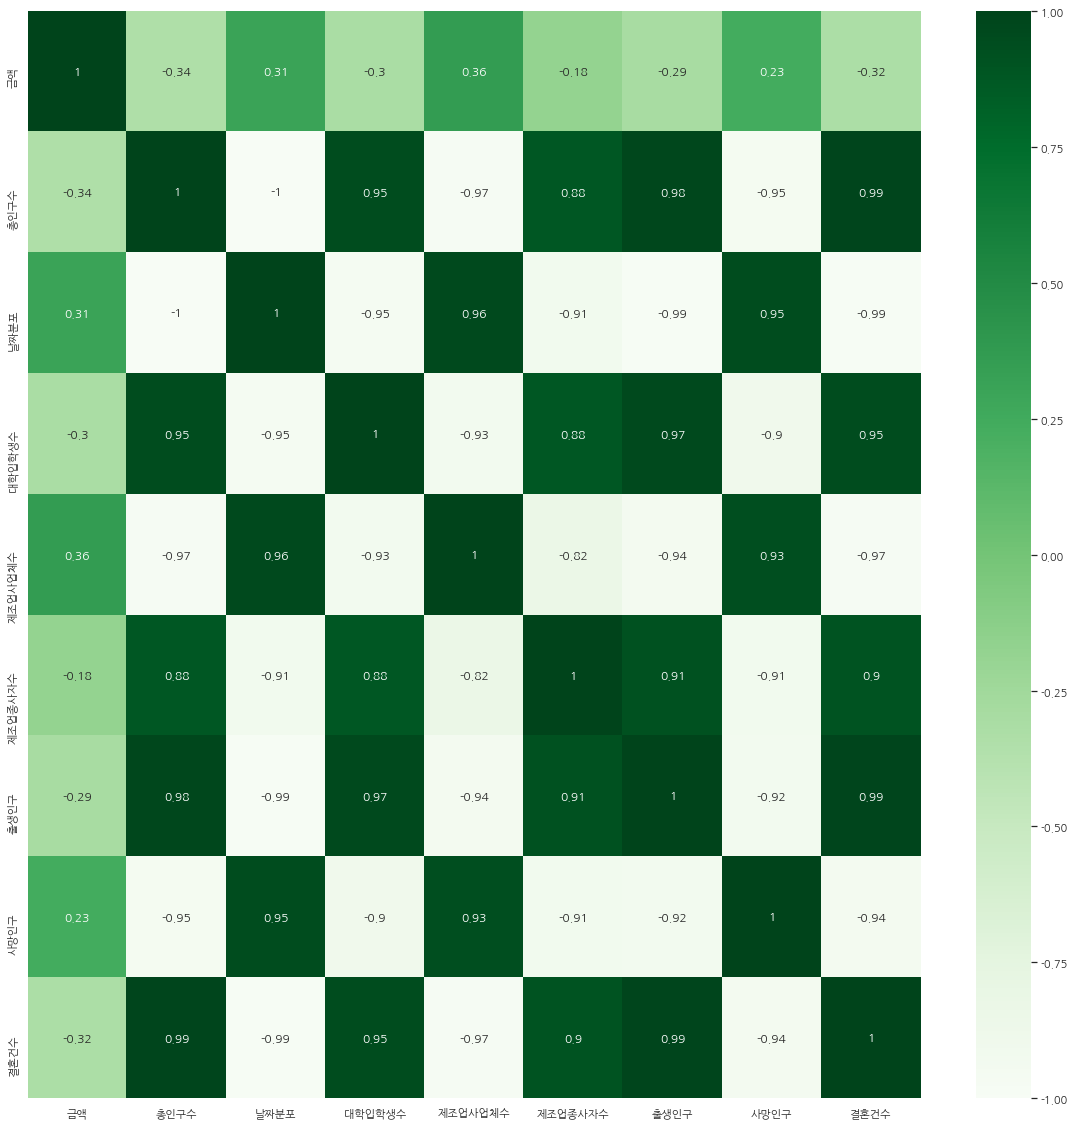

In [81]:
plt.figure(figsize = (20,20))
sns.heatmap(test8.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

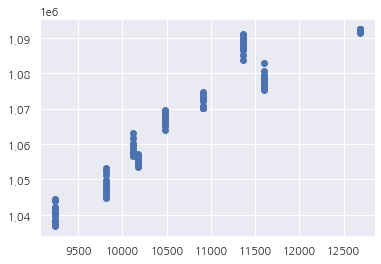

In [82]:
# 분석 결과: 데이터를 병합해서 상관 관계 분석을 한 결과, 금액에 대한 데이터를 제외하면 모두 높은 상관 관계를 가지는 것으로 나온다.
# 이는 잘못된 결과일 확률이 높다. 따라서, 날짜분포와 마찬가지로 이를 모두 0에서 1사이로 정규화 시켜서 다시 상관관계를 볼 필요가 있다.
plt.scatter(test9["대학입학생수"],test9["총인구수"])

In [83]:
# 정규분포화 기본 수식
# (입력값 - 최솟값)/(최댓값 - 최솟값)
def zero_to_one(data):
    tmp_list = []
    for i in data:
        tmp = (i-data.min())/(data.max() - data.min())
        tmp_list.append(tmp)
        
    return tmp_list

In [84]:
testt = zero_to_one(test9["총인구수"])
testt

[0.9970796904113516,
 0.9852909559982801,
 0.9970796904113516,
 0.9831589508384693,
 1.0,
 0.9971871864698294,
 0.9881396015479432,
 0.9861330084563567,
 0.9877991973627633,
 0.9923319478285796,
 0.9926902680235058,
 0.9805969614447471,
 0.9755267306865415,
 0.9665508098036405,
 0.9524329941235488,
 0.9436004013186183,
 0.9319012469542783,
 0.9192346280636376,
 0.9120682241651139,
 0.9020890067364197,
 0.8970008599684678,
 0.8946717787014477,
 0.8664003153217715,
 0.841927046008313,
 0.8269671778701447,
 0.7884119248960871,
 0.7665006449763508,
 0.7493729396588792,
 0.7419736276336535,
 0.7371900530313888,
 0.7299340690841336,
 0.7182349147197936,
 0.7064103482872295,
 0.695839902536907,
 0.6966819549949835,
 0.6885122545506664,
 0.681363766661889,
 0.6676221871864698,
 0.6564067650852802,
 0.6521427547656586,
 0.643184749892504,
 0.6357316898380393,
 0.6101297119105633,
 0.5994876021212555,
 0.6065465099613014,
 0.5974093449906837,
 0.6011537910276623,
 0.5970689408055038,
 0.59049376

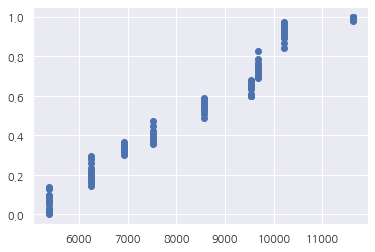

In [85]:
plt.scatter(test9["출생인구"],testt)

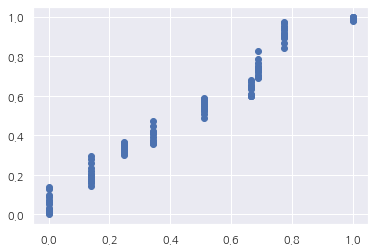

In [86]:
testtt = zero_to_one(test9["출생인구"])
plt.scatter(testtt,testt)

In [87]:
ttt = pd.DataFrame()
ttt[0] = testt
ttt[1] = testtt
ttt.corr()

,0,1
0,1.00000,0.98086
1,0.98086,1.00000


In [88]:
X = test9.drop(columns = ["총인구수","날짜분포"])
Y = test9["총인구수"]

In [89]:
total_fitter = LinearRegression()
total_fitter.fit(X, Y)

LinearRegression()

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 7 is different from 1)

In [91]:
X

,금액,대학입학생수,제조업사업체수,제조업종사자수,출생인구,사망인구,결혼건수
0,18330.0,12681,8640,133757,11627,4932,7256
1,17500.0,12681,8640,133757,11627,4932,7256
2,18000.0,12681,8640,133757,11627,4932,7256
3,17500.0,12681,8640,133757,11627,4932,7256
4,17715.0,12681,8640,133757,11627,4932,7256
...,...,...,...,...,...,...,...
103,22800.0,9240,11174,128454,5376,5689,3897
104,20200.0,9240,11174,128454,5376,5689,3897
105,25300.0,9240,11174,128454,5376,5689,3897
106,23000.0,9240,11174,128454,5376,5689,3897


In [92]:
total_fitter.predict([[18330.0,12681,8640,133757,11627,4932,7256]])

array([1091955.95656629])

In [93]:
Y

0      1092391.0
1      1091733.0
2      1092391.0
3      1091614.0
4      1092554.0
         ...    
103    1038677.0
104    1038101.0
105    1037709.0
106    1037161.0
107    1036738.0
Name: 총인구수, Length: 108, dtype: float64

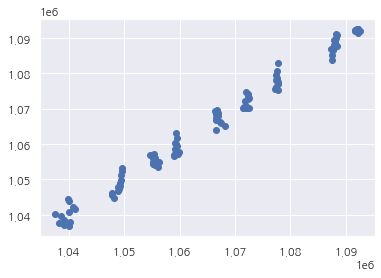

In [94]:
plt.scatter(total_fitter.predict(X),test9["총인구수"])

In [95]:
test9

,금액,총인구수,날짜분포,대학입학생수,제조업사업체수,제조업종사자수,출생인구,사망인구,결혼건수
0,18330.0,1092391.0,0.000000,12681,8640,133757,11627,4932,7256
1,17500.0,1091733.0,0.009346,12681,8640,133757,11627,4932,7256
2,18000.0,1092391.0,0.018692,12681,8640,133757,11627,4932,7256
3,17500.0,1091614.0,0.028037,12681,8640,133757,11627,4932,7256
4,17715.0,1092554.0,0.037383,12681,8640,133757,11627,4932,7256
...,...,...,...,...,...,...,...,...,...
103,22800.0,1038677.0,0.962617,9240,11174,128454,5376,5689,3897
104,20200.0,1038101.0,0.971963,9240,11174,128454,5376,5689,3897
105,25300.0,1037709.0,0.981308,9240,11174,128454,5376,5689,3897
106,23000.0,1037161.0,0.990654,9240,11174,128454,5376,5689,3897


In [96]:
total_fitter.coef_

array([ -0.37689521,  -2.79932033,  -6.63389291,  -1.01090847,
         8.34672914, -15.14675807,  -4.30086242])

In [97]:
X

,금액,대학입학생수,제조업사업체수,제조업종사자수,출생인구,사망인구,결혼건수
0,18330.0,12681,8640,133757,11627,4932,7256
1,17500.0,12681,8640,133757,11627,4932,7256
2,18000.0,12681,8640,133757,11627,4932,7256
3,17500.0,12681,8640,133757,11627,4932,7256
4,17715.0,12681,8640,133757,11627,4932,7256
...,...,...,...,...,...,...,...
103,22800.0,9240,11174,128454,5376,5689,3897
104,20200.0,9240,11174,128454,5376,5689,3897
105,25300.0,9240,11174,128454,5376,5689,3897
106,23000.0,9240,11174,128454,5376,5689,3897


In [98]:
total_fitter.intercept_

1335758.994599569

In [99]:
data1 = pd.read_csv("c://python//new//경제활동인구.csv",encoding='cp949') # 분기형
data2 = pd.read_csv("c://python//new//도로포장률.csv",encoding='cp949') # 년도별
data3 = pd.read_csv("c://python//new//문화시설.csv",encoding='cp949') # 년도별
data4 = pd.read_csv("c://python//new//보건및사회복지_사업체비율.csv",encoding='cp949') # 데이터 부족!
data5 = pd.read_csv("c://python//new//사회복지시설.csv",encoding='cp949') # 년도별
data6 = pd.read_csv("c://python//new//유아_천명당_보육시설수.csv",encoding='cp949') # 년도별
data7 = pd.read_csv("c://python//new//유치원_교원수.csv",encoding='cp949') # 년도별
data8 = pd.read_csv("c://python//new//인구_천명당_사설학원수.csv",encoding='cp949') # 년도별
data9 = pd.read_csv("c://python//new//주택매매가격지수.csv",encoding='cp949') # 월별
data10 = pd.read_csv("c://python//new//청년고용률.csv",encoding='cp949') # 분기별
data11 = pd.read_csv("c://python//new//타지역_통근_취업자.csv",encoding='cp949') # 분기별
data12 = pd.read_csv("c://python//new//아파트전세가격지수.csv",encoding='cp949') # 월별

In [100]:
data1

,행정구역별,2013 1/2,2013 1/2.1,2013 1/2.2,2013 1/2.3,2013 1/2.4,2013 1/2.5,2013 1/2.6,2013 1/2.7,2013 1/2.8,...,2020 1/2.8,2020 2/2,2020 2/2.1,2020 2/2.2,2020 2/2.3,2020 2/2.4,2020 2/2.5,2020 2/2.6,2020 2/2.7,2020 2/2.8
0,행정구역별,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (％),고용률 (%),15~64세 고용률 (%),실업률 (％),...,실업률 (％),15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (％),고용률 (%),15~64세 고용률 (%),실업률 (％)
1,창원시,880.7,518.1,503.8,14.3,362.6,58.8,57.2,60.9,2.8,...,4.1,879.9,535.4,511.6,23.8,344.5,60.8,58.1,63.9,4.4


In [101]:
data1_1 = data1.T
data1_1 = data1_1.reset_index()
data1_1

,index,0,1
0,행정구역별,행정구역별,창원시
1,2013 1/2,15세이상인구 (천명),880.7
2,2013 1/2.1,경제활동인구 (천명),518.1
3,2013 1/2.2,취업자 (천명),503.8
4,2013 1/2.3,실업자 (천명),14.3
...,...,...,...
140,2020 2/2.4,비경제활동인구 (천명),344.5
141,2020 2/2.5,경제활동참가율 (％),60.8
142,2020 2/2.6,고용률 (%),58.1
143,2020 2/2.7,15~64세 고용률 (%),63.9


In [102]:
data11

,행정구역별,2013 1/2,2013 1/2.1,2013 2/2,2013 2/2.1,2014 1/2,2014 1/2.1,2014 2/2,2014 2/2.1,2015 1/2,...,2018 2/2,2018 2/2.1,2019 1/2,2019 1/2.1,2019 2/2,2019 2/2.1,2020 1/2,2020 1/2.1,2020 2/2,2020 2/2.1
0,행정구역별,거주지내 통근 취업자 (천명) (천명),거주지외 타지역 통근 취업자 (천명) (천명),거주지내 통근 취업자 (천명) (천명),거주지외 타지역 통근 취업자 (천명) (천명),거주지내 통근 취업자 (천명) (천명),거주지외 타지역 통근 취업자 (천명) (천명),거주지내 통근 취업자 (천명) (천명),거주지외 타지역 통근 취업자 (천명) (천명),거주지내 통근 취업자 (천명) (천명),...,거주지내 통근 취업자 (천명) (천명),거주지외 타지역 통근 취업자 (천명) (천명),거주지내 통근 취업자 (천명) (천명),거주지외 타지역 통근 취업자 (천명) (천명),거주지내 통근 취업자 (천명) (천명),거주지외 타지역 통근 취업자 (천명) (천명),거주지내 통근 취업자 (천명) (천명),거주지외 타지역 통근 취업자 (천명) (천명),거주지내 통근 취업자 (천명) (천명),거주지외 타지역 통근 취업자 (천명) (천명)
1,창원시,453.7,50.1,458.3,51.7,471.6,46.1,454.3,52.6,458.1,...,469.8,58.9,475.4,58.6,472.4,57.5,426.8,67.3,446.1,65.5


In [103]:
# 데이터 1, 10, 11 분기형 데이터 => 분기별 평균으로 통합
# 데이터 9, 12 test9의 모든 데이터 월별 데이터 => 월별 평균으로 통합
test9

,금액,총인구수,날짜분포,대학입학생수,제조업사업체수,제조업종사자수,출생인구,사망인구,결혼건수
0,18330.0,1092391.0,0.000000,12681,8640,133757,11627,4932,7256
1,17500.0,1091733.0,0.009346,12681,8640,133757,11627,4932,7256
2,18000.0,1092391.0,0.018692,12681,8640,133757,11627,4932,7256
3,17500.0,1091614.0,0.028037,12681,8640,133757,11627,4932,7256
4,17715.0,1092554.0,0.037383,12681,8640,133757,11627,4932,7256
...,...,...,...,...,...,...,...,...,...
103,22800.0,1038677.0,0.962617,9240,11174,128454,5376,5689,3897
104,20200.0,1038101.0,0.971963,9240,11174,128454,5376,5689,3897
105,25300.0,1037709.0,0.981308,9240,11174,128454,5376,5689,3897
106,23000.0,1037161.0,0.990654,9240,11174,128454,5376,5689,3897


In [104]:
test10 = test9.drop(columns = "금액")
test10["출생/사망인구증감"] = test9["출생인구"] - test9["사망인구"]

In [105]:
test11 = test10.drop(columns = ["출생인구","사망인구"])
test11

,총인구수,날짜분포,대학입학생수,제조업사업체수,제조업종사자수,결혼건수,출생/사망인구증감
0,1092391.0,0.000000,12681,8640,133757,7256,6695
1,1091733.0,0.009346,12681,8640,133757,7256,6695
2,1092391.0,0.018692,12681,8640,133757,7256,6695
3,1091614.0,0.028037,12681,8640,133757,7256,6695
4,1092554.0,0.037383,12681,8640,133757,7256,6695
...,...,...,...,...,...,...,...
103,1038677.0,0.962617,9240,11174,128454,3897,-313
104,1038101.0,0.971963,9240,11174,128454,3897,-313
105,1037709.0,0.981308,9240,11174,128454,3897,-313
106,1037161.0,0.990654,9240,11174,128454,3897,-313


In [106]:
# 분기형 데이터 통합 (1,10,11)
data10_1 = data10.T
data10_1 = data10_1.reset_index()
data10_1

,index,0
0,행정구역별,창원시
1,연령별,15 - 29세
2,2013 1/2,33.6
3,2013 2/2,34.1
4,2014 1/2,36.7
5,2014 2/2,35.2
6,2015 1/2,36.2
7,2015 2/2,35.2
8,2016 1/2,37.0
9,2016 2/2,34.2


In [107]:
data11_1 = data11.T
data11_1 = data11_1.reset_index()
data11_1

,index,0,1
0,행정구역별,행정구역별,창원시
1,2013 1/2,거주지내 통근 취업자 (천명) (천명),453.7
2,2013 1/2.1,거주지외 타지역 통근 취업자 (천명) (천명),50.1
3,2013 2/2,거주지내 통근 취업자 (천명) (천명),458.3
4,2013 2/2.1,거주지외 타지역 통근 취업자 (천명) (천명),51.7
5,2014 1/2,거주지내 통근 취업자 (천명) (천명),471.6
6,2014 1/2.1,거주지외 타지역 통근 취업자 (천명) (천명),46.1
7,2014 2/2,거주지내 통근 취업자 (천명) (천명),454.3
8,2014 2/2.1,거주지외 타지역 통근 취업자 (천명) (천명),52.6
9,2015 1/2,거주지내 통근 취업자 (천명) (천명),458.1


In [108]:
data1_1

,index,0,1
0,행정구역별,행정구역별,창원시
1,2013 1/2,15세이상인구 (천명),880.7
2,2013 1/2.1,경제활동인구 (천명),518.1
3,2013 1/2.2,취업자 (천명),503.8
4,2013 1/2.3,실업자 (천명),14.3
...,...,...,...
140,2020 2/2.4,비경제활동인구 (천명),344.5
141,2020 2/2.5,경제활동참가율 (％),60.8
142,2020 2/2.6,고용률 (%),58.1
143,2020 2/2.7,15~64세 고용률 (%),63.9


In [109]:
# 경제 활동 인구 => 실업률 고용률 경제 활동 참가율 추출
data1

,행정구역별,2013 1/2,2013 1/2.1,2013 1/2.2,2013 1/2.3,2013 1/2.4,2013 1/2.5,2013 1/2.6,2013 1/2.7,2013 1/2.8,...,2020 1/2.8,2020 2/2,2020 2/2.1,2020 2/2.2,2020 2/2.3,2020 2/2.4,2020 2/2.5,2020 2/2.6,2020 2/2.7,2020 2/2.8
0,행정구역별,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (％),고용률 (%),15~64세 고용률 (%),실업률 (％),...,실업률 (％),15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (％),고용률 (%),15~64세 고용률 (%),실업률 (％)
1,창원시,880.7,518.1,503.8,14.3,362.6,58.8,57.2,60.9,2.8,...,4.1,879.9,535.4,511.6,23.8,344.5,60.8,58.1,63.9,4.4


In [110]:
data1_2_1 = data1_1[data1_1[0] == "경제활동참가율 (％)"]
data1_2_2 = data1_1[data1_1[0] == "고용률 (%)"]
data1_2_3 = data1_1[data1_1[0] == "실업률 (％)"]
data1_2_2

,index,0,1
7,2013 1/2.6,고용률 (%),57.2
16,2013 2/2.6,고용률 (%),57.8
25,2014 1/2.6,고용률 (%),58.7
34,2014 2/2.6,고용률 (%),57.4
43,2015 1/2.6,고용률 (%),58.2
52,2015 2/2.6,고용률 (%),57.6
61,2016 1/2.6,고용률 (%),56.9
70,2016 2/2.6,고용률 (%),57.2
79,2017 1/2.6,고용률 (%),58.4
88,2017 2/2.6,고용률 (%),58.3


In [111]:
# 분기별 데이터 분석 방법 1. 분기별로 나누기 2. 분기별 평균 사용하기
# 데이터 10 : 분기별 평균 적용 데이터 11 : 타지역 통근자 비율 조사
# 데이터 1 분기 평균 적용

d1_list1 = []
for i in data1_2_1["index"]:
    d1_list1.append(i[0:4])
data1_2_1["년도"] = d1_list1

d1_list2 = []
for i in data1_2_2["index"]:
    d1_list2.append(i[0:4])
data1_2_2["년도"] = d1_list2

d1_list3 = []
for i in data1_2_3["index"]:
    d1_list3.append(i[0:4])
data1_2_3["년도"] = d1_list3

data1_2_3

<ipython-input-111-2902d4e899a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_2_1["년도"] = d1_list1
<ipython-input-111-2902d4e899a5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_2_2["년도"] = d1_list2
<ipython-input-111-2902d4e899a5>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,index,0,1,년도
9,2013 1/2.8,실업률 (％),2.8,2013
18,2013 2/2.8,실업률 (％),2.6,2013
27,2014 1/2.8,실업률 (％),2.8,2014
36,2014 2/2.8,실업률 (％),2.3,2014
45,2015 1/2.8,실업률 (％),3.0,2015
54,2015 2/2.8,실업률 (％),3.1,2015
63,2016 1/2.8,실업률 (％),3.8,2016
72,2016 2/2.8,실업률 (％),3.7,2016
81,2017 1/2.8,실업률 (％),3.5,2017
90,2017 2/2.8,실업률 (％),4.3,2017


In [112]:
data1_3_1 = data1_2_1.groupby("년도").apply(lambda x: x.sum())
data1_3_2 = data1_2_2.groupby("년도").apply(lambda x: x.sum())
data1_3_3 = data1_2_3.groupby("년도").apply(lambda x: x.sum())

data1_3_1

,index,0,1,년도
년도,,,,
2013,2013 1/2.52013 2/2.5,경제활동참가율 (％)경제활동참가율 (％),58.859.3,20132013
2014,2014 1/2.52014 2/2.5,경제활동참가율 (％)경제활동참가율 (％),60.458.8,20142014
2015,2015 1/2.52015 2/2.5,경제활동참가율 (％)경제활동참가율 (％),59.959.5,20152015
2016,2016 1/2.52016 2/2.5,경제활동참가율 (％)경제활동참가율 (％),59.159.4,20162016
2017,2017 1/2.52017 2/2.5,경제활동참가율 (％)경제활동참가율 (％),60.561.0,20172017
2018,2018 1/2.52018 2/2.5,경제활동참가율 (％)경제활동참가율 (％),61.262.2,20182018
2019,2019 1/2.52019 2/2.5,경제활동참가율 (％)경제활동참가율 (％),63.362.4,20192019
2020,2020 1/2.52020 2/2.5,경제활동참가율 (％)경제활동참가율 (％),58.660.8,20202020


In [113]:
data1_4_1 = data1_2_1[1].astype(float)
data1_4_2 = data1_2_2[1].astype(float)
data1_4_3 = data1_2_3[1].astype(float)
#data1_4_1["경제활동참가율"] = data1_4_1[1]/2
data1_4_1

6      58.8
15     59.3
24     60.4
33     58.8
42     59.9
51     59.5
60     59.1
69     59.4
78     60.5
87     61.0
96     61.2
105    62.2
114    63.3
123    62.4
132    58.6
141    60.8
Name: 1, dtype: float64

In [114]:
data1_5_1 = pd.DataFrame()
data1_5_1["경제활동참가율"] = data1_4_1
data1_5_1["년도"] = data1_2_1["년도"]

data1_5_2 = pd.DataFrame()
data1_5_2["고용률"] = data1_4_2
data1_5_2["년도"] = data1_2_2["년도"]

data1_5_3 = pd.DataFrame()
data1_5_3["실업률"] = data1_4_3
data1_5_3["년도"] = data1_2_3["년도"]
data1_5_1

,경제활동참가율,년도
6,58.8,2013
15,59.3,2013
24,60.4,2014
33,58.8,2014
42,59.9,2015
51,59.5,2015
60,59.1,2016
69,59.4,2016
78,60.5,2017
87,61.0,2017


In [115]:
data1_6_1 = data1_5_1.groupby("년도").apply(lambda x: x.sum()/2)
data1_6_2 = data1_5_2.groupby("년도").apply(lambda x: x.sum()/2)
data1_6_3 = data1_5_3.groupby("년도").apply(lambda x: x.sum()/2)

data1_7_1 = data1_6_1.reset_index()
data1_7_2 = data1_6_2.reset_index()
data1_7_3 = data1_6_3.reset_index()

data1_7_1

,년도,경제활동참가율
0,2013,59.05
1,2014,59.60
2,2015,59.70
3,2016,59.25
4,2017,60.75
5,2018,61.70
6,2019,62.85
7,2020,59.70


In [116]:
test10

,총인구수,날짜분포,대학입학생수,제조업사업체수,제조업종사자수,출생인구,사망인구,결혼건수,출생/사망인구증감
0,1092391.0,0.000000,12681,8640,133757,11627,4932,7256,6695
1,1091733.0,0.009346,12681,8640,133757,11627,4932,7256,6695
2,1092391.0,0.018692,12681,8640,133757,11627,4932,7256,6695
3,1091614.0,0.028037,12681,8640,133757,11627,4932,7256,6695
4,1092554.0,0.037383,12681,8640,133757,11627,4932,7256,6695
...,...,...,...,...,...,...,...,...,...
103,1038677.0,0.962617,9240,11174,128454,5376,5689,3897,-313
104,1038101.0,0.971963,9240,11174,128454,5376,5689,3897,-313
105,1037709.0,0.981308,9240,11174,128454,5376,5689,3897,-313
106,1037161.0,0.990654,9240,11174,128454,5376,5689,3897,-313


In [117]:
d1_fitter = LinearRegression()
d1_fitter.fit(data1_7_1["년도"].values.reshape(-1,1), data1_7_1["경제활동참가율"])

d1_fitter2 = LinearRegression()
d1_fitter2.fit(data1_7_2["년도"].values.reshape(-1,1), data1_7_2["고용률"])

d1_fitter3 = LinearRegression()
d1_fitter3.fit(data1_7_3["년도"].values.reshape(-1,1), data1_7_3["실업률"])

LinearRegression()

In [118]:
d1_fitter.predict([[2012]])

array([58.80892857])

In [119]:
d1_fitter2.predict([[2012]])

array([57.46428571])

In [120]:
d1_fitter3.predict([[2012]])

array([2.36964286])

In [121]:
test11 = pd.DataFrame()
test11["년도"] = [2012]
test11["경제활동참가율"] = [58.8]
test11["고용률"] = [57.4]
test11["실업률"] = [2.3]
test11

,년도,경제활동참가율,고용률,실업률
0,2012,58.8,57.4,2.3


In [122]:
data1_t = pd.merge(data1_7_1,data1_7_2)
data1_t = pd.merge(data1_t,data1_7_3)
data1_t

,년도,경제활동참가율,고용률,실업률
0,2013,59.05,57.50,2.70
1,2014,59.60,58.05,2.55
2,2015,59.70,57.90,3.05
3,2016,59.25,57.05,3.75
4,2017,60.75,58.35,3.90
5,2018,61.70,59.40,3.70
6,2019,62.85,60.15,4.25
7,2020,59.70,57.10,4.25


In [123]:
# 1번 데이터 통합
test11 = pd.concat([test11,data1_t])
test11

,년도,경제활동참가율,고용률,실업률
0,2012,58.80,57.40,2.30
0,2013,59.05,57.50,2.70
1,2014,59.60,58.05,2.55
2,2015,59.70,57.90,3.05
3,2016,59.25,57.05,3.75
4,2017,60.75,58.35,3.90
5,2018,61.70,59.40,3.70
6,2019,62.85,60.15,4.25
7,2020,59.70,57.10,4.25


In [124]:
# 10번 데이터 통합(청년 고용률)
data10_1

,index,0
0,행정구역별,창원시
1,연령별,15 - 29세
2,2013 1/2,33.6
3,2013 2/2,34.1
4,2014 1/2,36.7
5,2014 2/2,35.2
6,2015 1/2,36.2
7,2015 2/2,35.2
8,2016 1/2,37.0
9,2016 2/2,34.2


In [125]:
data10_2 = data10_1.drop(data10_1.index[0:2])
data10_2

,index,0
2,2013 1/2,33.6
3,2013 2/2,34.1
4,2014 1/2,36.7
5,2014 2/2,35.2
6,2015 1/2,36.2
7,2015 2/2,35.2
8,2016 1/2,37.0
9,2016 2/2,34.2
10,2017 1/2,36.9
11,2017 2/2,37.3


In [126]:
d10_list = []
for i in data10_2["index"]:
    d10_list.append(int(i[0:4]))
data10_2["년도"] = d10_list
data10_2

,index,0,년도
2,2013 1/2,33.6,2013
3,2013 2/2,34.1,2013
4,2014 1/2,36.7,2014
5,2014 2/2,35.2,2014
6,2015 1/2,36.2,2015
7,2015 2/2,35.2,2015
8,2016 1/2,37.0,2016
9,2016 2/2,34.2,2016
10,2017 1/2,36.9,2017
11,2017 2/2,37.3,2017


In [127]:
data10_3 = pd.DataFrame()
data10_3["청년고용률"] = data10_2[0].astype(float)
data10_3["년도"] = data10_2["년도"]
data10_3

,청년고용률,년도
2,33.6,2013
3,34.1,2013
4,36.7,2014
5,35.2,2014
6,36.2,2015
7,35.2,2015
8,37.0,2016
9,34.2,2016
10,36.9,2017
11,37.3,2017


In [128]:
data10_4 = data10_3.groupby("년도").apply(lambda x: x.mean())
data10_4

,청년고용률,년도
년도,,
2013,33.85,2013.0
2014,35.95,2014.0
2015,35.70,2015.0
2016,35.60,2016.0
2017,37.10,2017.0
2018,39.75,2018.0
2019,40.45,2019.0
2020,37.35,2020.0


In [129]:
d10_fitter = LinearRegression()
d10_fitter.fit(data10_4["년도"].values.reshape(-1,1), data10_4["청년고용률"])

LinearRegression()

In [130]:
d10_fitter.predict([[2012]])

array([33.71964286])

In [131]:
d10_list2 = [33.7]
for i in data10_4["청년고용률"]:
    d10_list2.append(i)

test11["청년고용률"] = d10_list2
test11

,년도,경제활동참가율,고용률,실업률,청년고용률
0,2012,58.80,57.40,2.30,33.70
0,2013,59.05,57.50,2.70,33.85
1,2014,59.60,58.05,2.55,35.95
2,2015,59.70,57.90,3.05,35.70
3,2016,59.25,57.05,3.75,35.60
4,2017,60.75,58.35,3.90,37.10
5,2018,61.70,59.40,3.70,39.75
6,2019,62.85,60.15,4.25,40.45
7,2020,59.70,57.10,4.25,37.35


<AxesSubplot:>

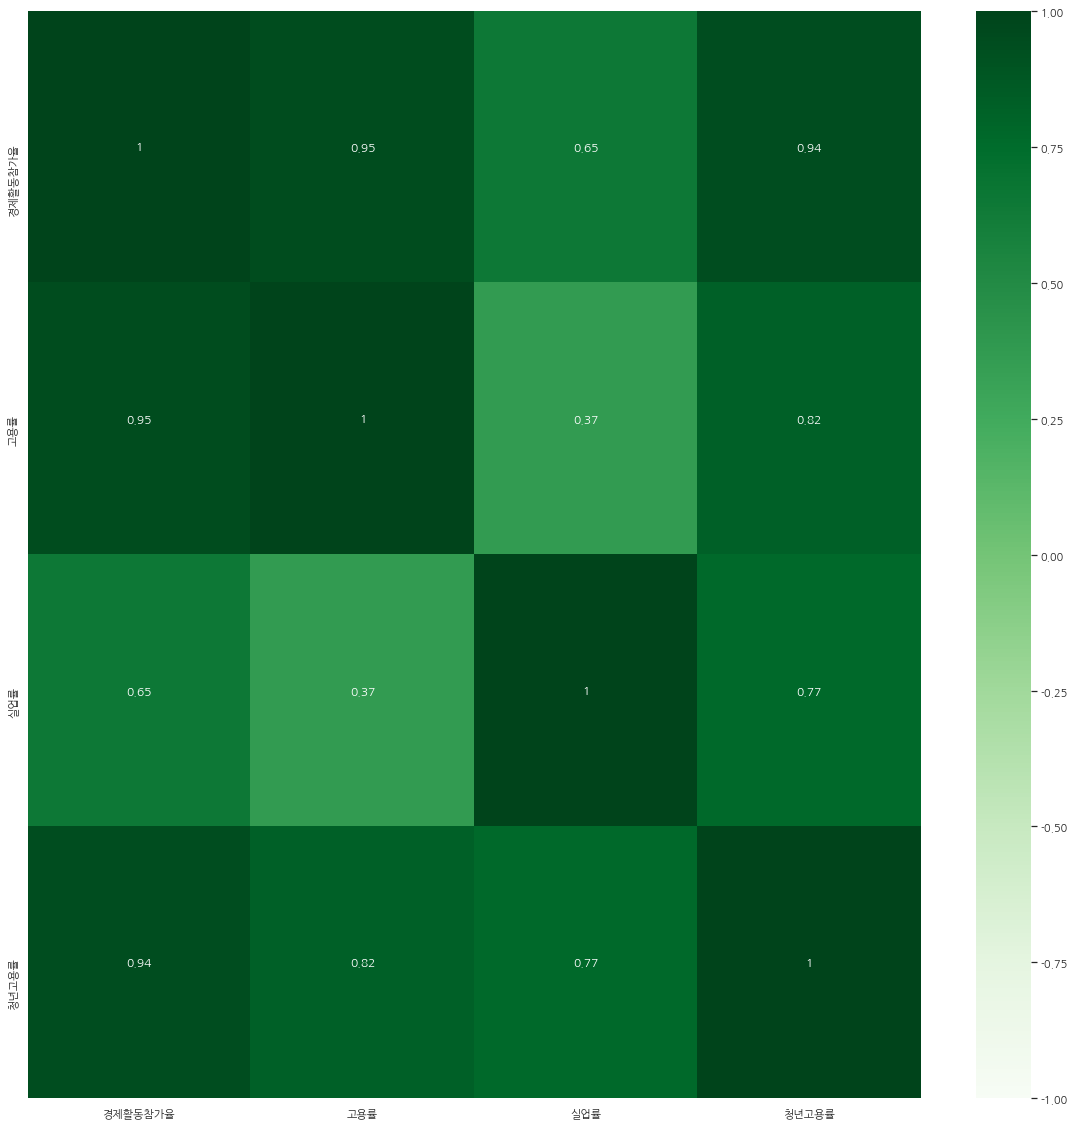

In [132]:
# 데이터 11 편입 전 중간 상관관계 조사
plt.figure(figsize = (20,20))
sns.heatmap(test11.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [133]:
# 데이터 11 편집
data11_1

,index,0,1
0,행정구역별,행정구역별,창원시
1,2013 1/2,거주지내 통근 취업자 (천명) (천명),453.7
2,2013 1/2.1,거주지외 타지역 통근 취업자 (천명) (천명),50.1
3,2013 2/2,거주지내 통근 취업자 (천명) (천명),458.3
4,2013 2/2.1,거주지외 타지역 통근 취업자 (천명) (천명),51.7
5,2014 1/2,거주지내 통근 취업자 (천명) (천명),471.6
6,2014 1/2.1,거주지외 타지역 통근 취업자 (천명) (천명),46.1
7,2014 2/2,거주지내 통근 취업자 (천명) (천명),454.3
8,2014 2/2.1,거주지외 타지역 통근 취업자 (천명) (천명),52.6
9,2015 1/2,거주지내 통근 취업자 (천명) (천명),458.1


In [134]:
data11_1_1 = data11_1[data11_1[0] == "거주지내 통근 취업자 (천명) (천명)"]
data11_1_2 = data11_1[data11_1[0] == "거주지외 타지역 통근 취업자 (천명) (천명)"]
data11_2_1 = data11_1_1.reset_index()
data11_2_2 = data11_1_2.reset_index()
data11_2_1

,level_0,index,0,1
0,1,2013 1/2,거주지내 통근 취업자 (천명) (천명),453.7
1,3,2013 2/2,거주지내 통근 취업자 (천명) (천명),458.3
2,5,2014 1/2,거주지내 통근 취업자 (천명) (천명),471.6
3,7,2014 2/2,거주지내 통근 취업자 (천명) (천명),454.3
4,9,2015 1/2,거주지내 통근 취업자 (천명) (천명),458.1
5,11,2015 2/2,거주지내 통근 취업자 (천명) (천명),454.1
6,13,2016 1/2,거주지내 통근 취업자 (천명) (천명),452.1
7,15,2016 2/2,거주지내 통근 취업자 (천명) (천명),455.0
8,17,2017 1/2,거주지내 통근 취업자 (천명) (천명),462.5
9,19,2017 2/2,거주지내 통근 취업자 (천명) (천명),459.7


In [135]:
data11_2 = pd.DataFrame()
data11_2["지역내 통근자"] = data11_2_1[1].astype(float)*100/(data11_2_1[1].astype(float) + data11_2_2[1].astype(float))
data11_2["지역외 통근자"] = data11_2_2[1].astype(float)*100/(data11_2_1[1].astype(float) + data11_2_2[1].astype(float))
data11_2["날짜"] = data11_2_1["index"]
data11_2

,지역내 통근자,지역외 통근자,날짜
0,90.055578,9.944422,2013 1/2
1,89.862745,10.137255,2013 2/2
2,91.095229,8.904771,2014 1/2
3,89.623200,10.376800,2014 2/2
4,89.089848,10.910152,2015 1/2
5,89.074147,10.925853,2015 2/2
6,89.577967,10.422033,2016 1/2
7,89.708202,10.291798,2016 2/2
8,89.631783,10.368217,2017 1/2
9,89.279472,10.720528,2017 2/2


In [136]:
d11_list = []
for i in data11_2["날짜"]:
    d11_list.append(int(i[0:4]))

data11_2["년도"] = d11_list
data11_2

,지역내 통근자,지역외 통근자,날짜,년도
0,90.055578,9.944422,2013 1/2,2013
1,89.862745,10.137255,2013 2/2,2013
2,91.095229,8.904771,2014 1/2,2014
3,89.623200,10.376800,2014 2/2,2014
4,89.089848,10.910152,2015 1/2,2015
5,89.074147,10.925853,2015 2/2,2015
6,89.577967,10.422033,2016 1/2,2016
7,89.708202,10.291798,2016 2/2,2016
8,89.631783,10.368217,2017 1/2,2017
9,89.279472,10.720528,2017 2/2,2017


In [137]:
data11_3 = data11_2.groupby("년도").apply(lambda x: x.mean())
data11_3

,지역내 통근자,지역외 통근자,년도
년도,,,
2013,89.959161,10.040839,2013.0
2014,90.359214,9.640786,2014.0
2015,89.081998,10.918002,2015.0
2016,89.643085,10.356915,2016.0
2017,89.455627,10.544373,2017.0
2018,88.957096,11.042904,2018.0
2019,89.087557,10.912443,2019.0
2020,86.788152,13.211848,2020.0


In [138]:
d11_fitter = LinearRegression()
d11_fitter.fit(data11_3["년도"].values.reshape(-1,1), data11_3["지역내 통근자"])

d11_fitter2 = LinearRegression()
d11_fitter2.fit(data11_3["년도"].values.reshape(-1,1), data11_3["지역외 통근자"])

LinearRegression()

In [139]:
d11_fitter.predict([[2012]])

array([90.72635307])

In [140]:
d11_fitter2.predict([[2012]])

array([9.27364693])

In [141]:
d11_list2_1 = [90.72635307]
for i in data11_3["지역내 통근자"]:
    d11_list2_1.append(i)

test11["지역내 통근자"] = d11_list2_1

d11_list2_2 = [9.27364693]
for i in data11_3["지역외 통근자"]:
    d11_list2_2.append(i)

test11["지역외 통근자"] = d11_list2_2
test11

,년도,경제활동참가율,고용률,실업률,청년고용률,지역내 통근자,지역외 통근자
0,2012,58.80,57.40,2.30,33.70,90.726353,9.273647
0,2013,59.05,57.50,2.70,33.85,89.959161,10.040839
1,2014,59.60,58.05,2.55,35.95,90.359214,9.640786
2,2015,59.70,57.90,3.05,35.70,89.081998,10.918002
3,2016,59.25,57.05,3.75,35.60,89.643085,10.356915
4,2017,60.75,58.35,3.90,37.10,89.455627,10.544373
5,2018,61.70,59.40,3.70,39.75,88.957096,11.042904
6,2019,62.85,60.15,4.25,40.45,89.087557,10.912443
7,2020,59.70,57.10,4.25,37.35,86.788152,13.211848


In [142]:
test10

,총인구수,날짜분포,대학입학생수,제조업사업체수,제조업종사자수,출생인구,사망인구,결혼건수,출생/사망인구증감
0,1092391.0,0.000000,12681,8640,133757,11627,4932,7256,6695
1,1091733.0,0.009346,12681,8640,133757,11627,4932,7256,6695
2,1092391.0,0.018692,12681,8640,133757,11627,4932,7256,6695
3,1091614.0,0.028037,12681,8640,133757,11627,4932,7256,6695
4,1092554.0,0.037383,12681,8640,133757,11627,4932,7256,6695
...,...,...,...,...,...,...,...,...,...
103,1038677.0,0.962617,9240,11174,128454,5376,5689,3897,-313
104,1038101.0,0.971963,9240,11174,128454,5376,5689,3897,-313
105,1037709.0,0.981308,9240,11174,128454,5376,5689,3897,-313
106,1037161.0,0.990654,9240,11174,128454,5376,5689,3897,-313


In [143]:
# test10 : 월별 데이터 통합 => 월별 데이터는 여기에 통합 후 평균을 계산
# data9, 12 월별 데이터 가공
data9

,행정구역별,2012. 01,2012. 02,2012. 03,2012. 04,2012. 05,2012. 06,2012. 07,2012. 08,2012. 09,...,2020. 03,2020. 04,2020. 05,2020. 06,2020. 07,2020. 08,2020. 09,2020. 10,2020. 11,2020. 12
0,창원시,105.6,105.6,105.5,105.4,105.3,104.9,104.4,104.1,104.0,...,92.2,92.1,91.9,92.2,93.0,93.6,93.9,94.1,95.2,98.1


In [144]:
data9_1 = data9.T
data9_1

,0
행정구역별,창원시
2012. 01,105.6
2012. 02,105.6
2012. 03,105.5
2012. 04,105.4
...,...
2020. 08,93.6
2020. 09,93.9
2020. 10,94.1
2020. 11,95.2


In [145]:
data9_2 = data9_1.drop(data9_1.index[0])
data9_3 = data9_2.reset_index()
data9_3

,index,0
0,2012. 01,105.6
1,2012. 02,105.6
2,2012. 03,105.5
3,2012. 04,105.4
4,2012. 05,105.3
...,...,...
103,2020. 08,93.6
104,2020. 09,93.9
105,2020. 10,94.1
106,2020. 11,95.2


In [146]:
data12_1 = data12.T
data12_2 = data12_1.drop(data12_1.index[0])
data12_3 = data12_2.reset_index()
data12_3

,index,0
0,2012. 01,95.6
1,2012. 02,95.6
2,2012. 03,95.3
3,2012. 04,95.5
4,2012. 05,95.3
...,...,...
103,2020. 08,92.2
104,2020. 09,93.1
105,2020. 10,93.7
106,2020. 11,95.5


In [147]:
test10["주택지가지수"] = data9_3[0].astype(float)
test10["아파트지가지수"] = data12_3[0].astype(float)
test10

,총인구수,날짜분포,대학입학생수,제조업사업체수,제조업종사자수,출생인구,사망인구,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수
0,1092391.0,0.000000,12681,8640,133757,11627,4932,7256,6695,105.6,95.6
1,1091733.0,0.009346,12681,8640,133757,11627,4932,7256,6695,105.6,95.6
2,1092391.0,0.018692,12681,8640,133757,11627,4932,7256,6695,105.5,95.3
3,1091614.0,0.028037,12681,8640,133757,11627,4932,7256,6695,105.4,95.5
4,1092554.0,0.037383,12681,8640,133757,11627,4932,7256,6695,105.3,95.3
...,...,...,...,...,...,...,...,...,...,...,...
103,1038677.0,0.962617,9240,11174,128454,5376,5689,3897,-313,93.6,92.2
104,1038101.0,0.971963,9240,11174,128454,5376,5689,3897,-313,93.9,93.1
105,1037709.0,0.981308,9240,11174,128454,5376,5689,3897,-313,94.1,93.7
106,1037161.0,0.990654,9240,11174,128454,5376,5689,3897,-313,95.2,95.5


In [148]:
test10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총인구수       108 non-null    float64
 1   날짜분포       108 non-null    float64
 2   대학입학생수     108 non-null    int64  
 3   제조업사업체수    108 non-null    int64  
 4   제조업종사자수    108 non-null    int64  
 5   출생인구       108 non-null    int64  
 6   사망인구       108 non-null    int64  
 7   결혼건수       108 non-null    int64  
 8   출생/사망인구증감  108 non-null    int64  
 9   주택지가지수     108 non-null    float64
 10  아파트지가지수    108 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 10.1 KB


In [149]:
# data 2,3,5,6,7,8 년도별 데이터
# 데이터 2 활용 방안 : 도로 개통도에 따른 타지역 통근자 증가 상관관계 분석?
data2

,행정구역별,2013,2013.1,2013.2,2014,2014.1,2014.2,2015,2015.1,2015.2,...,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2
0,행정구역별,도로포장률<br>(A÷B×100) (%),포장도로<br>(A) (m),전체개통도<br>(B) (m),도로포장률<br>(A÷B×100) (%),포장도로<br>(A) (m),전체개통도<br>(B) (m),도로포장률<br>(A÷B×100) (%),포장도로<br>(A) (m),전체개통도<br>(B) (m),...,전체개통도<br>(B) (m),도로포장률<br>(A÷B×100) (%),포장도로<br>(A) (m),전체개통도<br>(B) (m),도로포장률<br>(A÷B×100) (%),포장도로<br>(A) (m),전체개통도<br>(B) (m),도로포장률<br>(A÷B×100) (%),포장도로<br>(A) (m),전체개통도<br>(B) (m)
1,창원시,95.0,1533082,1613782,95.3,1648626,1729326,95.3,1654027,1734727,...,1759875,95.7,1696733,1773363,96.2,1721897,1790627,96.2,1736441,1805171


In [150]:
# 데이터3 활용방안 : 시설수, 면적 별 변화 관찰?
data3

,소재지(시군구)별(1),소재지(시군구)별(2),2012,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,...,2019.24,2019.25,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7
0,소재지(시군구)별(1),소재지(시군구)별(2),계,계,공연장,공연장,박물관,박물관,미술관,미술관,...,전문도서관,전문도서관,계,계,문화산업단지,문화산업단지,문화예술진흥시설,문화예술진흥시설,공공도서관,공공도서관
1,소재지(시군구)별(1),소재지(시군구)별(2),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),...,시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡)
2,경상남도,창원시,4,47685,0,0,0,0,1,19044,...,0,0,11,107391,1,24862,4,48185,6,34344


In [151]:
# 데이터 5 활용방안 : 시설수 증감 변화 거의 없음, 면적 증감 거의 없음
data5

,소재지(시군구)별(1),소재지(시군구)별(2),2012,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,...,2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,2020.8,2020.9
0,소재지(시군구)별(1),소재지(시군구)별(2),계,계,국가,국가,지방자치단체,지방자치단체,사회복지법인,사회복지법인,...,계,계,국가,국가,지방자치단체,지방자치단체,사회복지법인,사회복지법인,비영리법인,비영리법인
1,소재지(시군구)별(1),소재지(시군구)별(2),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),...,시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡),시설수 (개),면적 (㎡)
2,경상남도,창원시,18,86423,0,0,14,35925,3,43708,...,17,81510,0,0,13,53510,3,21210,1,6790


In [152]:
# 데이터 6 활용방안 : 유아 천명당 보육시설수 => 증가할수록 좋은 환경
# 보육 시설이 감소하는 비율과 인구가 감소하는 비율을 비교 or 아동 인구수 감소 비교
data6

,행정구역별,2012,2012.1,2012.2,2013,2013.1,2013.2,2014,2014.1,2014.2,...,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2
0,행정구역별,유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),...,주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명)
1,창원시,16.9,1087,64446,17.7,1094,61889,17.8,1069,60162,...,54712,18.6,951,51240,18.8,894,47641,18.7,820,43807


In [153]:
#유치원 교원수 => 보육 시설은 줄었는데 교원은 늘어난 상황
data7

,행정구역별,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,창원시,1132,1224,1248,1282,1383,1332,1316,1314,1317


In [154]:
data8

,행정구역별,2012,2012.1,2012.2,2013,2013.1,2013.2,2014,2014.1,2014.2,...,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2
0,행정구역별,인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),...,주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명)
1,창원시,1.7,1851,1091471,1.7,1817,1083731,1.8,1986,1075168,...,1057032,1.8,1941,1053601,1.8,1922,1044740,1.9,1943,1036738


In [155]:
data2_1 = data2.T
data2_1

,0,1
행정구역별,행정구역별,창원시
2013,도로포장률<br>(A÷B×100) (%),95.0
2013.1,포장도로<br>(A) (m),1533082
2013.2,전체개통도<br>(B) (m),1613782
2014,도로포장률<br>(A÷B×100) (%),95.3
2014.1,포장도로<br>(A) (m),1648626
2014.2,전체개통도<br>(B) (m),1729326
2015,도로포장률<br>(A÷B×100) (%),95.3
2015.1,포장도로<br>(A) (m),1654027
2015.2,전체개통도<br>(B) (m),1734727


In [156]:
data2_1_1 = data2_1[data2_1[0]=="도로포장률<br>(A÷B×100) (%)"]
data2_1_1

,0,1
2013,도로포장률<br>(A÷B×100) (%),95.0
2014,도로포장률<br>(A÷B×100) (%),95.3
2015,도로포장률<br>(A÷B×100) (%),95.3
2016,도로포장률<br>(A÷B×100) (%),95.6
2017,도로포장률<br>(A÷B×100) (%),95.6
2018,도로포장률<br>(A÷B×100) (%),95.7
2019,도로포장률<br>(A÷B×100) (%),96.2
2020,도로포장률<br>(A÷B×100) (%),96.2


In [157]:
data2_1_2 = data2_1[data2_1[0]== "전체개통도<br>(B) (m)"]
data2_1_2

,0,1
2013.2,전체개통도<br>(B) (m),1613782
2014.2,전체개통도<br>(B) (m),1729326
2015.2,전체개통도<br>(B) (m),1734727
2016.2,전체개통도<br>(B) (m),1752889
2017.2,전체개통도<br>(B) (m),1759875
2018.2,전체개통도<br>(B) (m),1773363
2019.2,전체개통도<br>(B) (m),1790627
2020.2,전체개통도<br>(B) (m),1805171


In [158]:
data2_1_3 = data2_1[data2_1[0]== "포장도로<br>(A) (m)"]
data2_1_3

,0,1
2013.1,포장도로<br>(A) (m),1533082
2014.1,포장도로<br>(A) (m),1648626
2015.1,포장도로<br>(A) (m),1654027
2016.1,포장도로<br>(A) (m),1676259
2017.1,포장도로<br>(A) (m),1683245
2018.1,포장도로<br>(A) (m),1696733
2019.1,포장도로<br>(A) (m),1721897
2020.1,포장도로<br>(A) (m),1736441


In [159]:
test11

,년도,경제활동참가율,고용률,실업률,청년고용률,지역내 통근자,지역외 통근자
0,2012,58.80,57.40,2.30,33.70,90.726353,9.273647
0,2013,59.05,57.50,2.70,33.85,89.959161,10.040839
1,2014,59.60,58.05,2.55,35.95,90.359214,9.640786
2,2015,59.70,57.90,3.05,35.70,89.081998,10.918002
3,2016,59.25,57.05,3.75,35.60,89.643085,10.356915
4,2017,60.75,58.35,3.90,37.10,89.455627,10.544373
5,2018,61.70,59.40,3.70,39.75,88.957096,11.042904
6,2019,62.85,60.15,4.25,40.45,89.087557,10.912443
7,2020,59.70,57.10,4.25,37.35,86.788152,13.211848


In [160]:
test10

,총인구수,날짜분포,대학입학생수,제조업사업체수,제조업종사자수,출생인구,사망인구,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수
0,1092391.0,0.000000,12681,8640,133757,11627,4932,7256,6695,105.6,95.6
1,1091733.0,0.009346,12681,8640,133757,11627,4932,7256,6695,105.6,95.6
2,1092391.0,0.018692,12681,8640,133757,11627,4932,7256,6695,105.5,95.3
3,1091614.0,0.028037,12681,8640,133757,11627,4932,7256,6695,105.4,95.5
4,1092554.0,0.037383,12681,8640,133757,11627,4932,7256,6695,105.3,95.3
...,...,...,...,...,...,...,...,...,...,...,...
103,1038677.0,0.962617,9240,11174,128454,5376,5689,3897,-313,93.6,92.2
104,1038101.0,0.971963,9240,11174,128454,5376,5689,3897,-313,93.9,93.1
105,1037709.0,0.981308,9240,11174,128454,5376,5689,3897,-313,94.1,93.7
106,1037161.0,0.990654,9240,11174,128454,5376,5689,3897,-313,95.2,95.5


In [161]:
data2_2_1 = data2_1_1.reset_index()
data2_2_2 = data2_1_2.reset_index()
data2_2_3 = data2_1_3.reset_index()
data2_2_3

,index,0,1
0,2013.1,포장도로<br>(A) (m),1533082
1,2014.1,포장도로<br>(A) (m),1648626
2,2015.1,포장도로<br>(A) (m),1654027
3,2016.1,포장도로<br>(A) (m),1676259
4,2017.1,포장도로<br>(A) (m),1683245
5,2018.1,포장도로<br>(A) (m),1696733
6,2019.1,포장도로<br>(A) (m),1721897
7,2020.1,포장도로<br>(A) (m),1736441


In [162]:
day_list = [2013,2014,2015,2016,2017,2018,2019,2020]
data2_2_1["날짜"] = day_list
data2_2_2["날짜"] = day_list
data2_2_3["날짜"] = day_list
data2_2_3

,index,0,1,날짜
0,2013.1,포장도로<br>(A) (m),1533082,2013
1,2014.1,포장도로<br>(A) (m),1648626,2014
2,2015.1,포장도로<br>(A) (m),1654027,2015
3,2016.1,포장도로<br>(A) (m),1676259,2016
4,2017.1,포장도로<br>(A) (m),1683245,2017
5,2018.1,포장도로<br>(A) (m),1696733,2018
6,2019.1,포장도로<br>(A) (m),1721897,2019
7,2020.1,포장도로<br>(A) (m),1736441,2020


In [163]:
d2_fitter = LinearRegression()
d2_fitter.fit(data2_2_1["날짜"].values.reshape(-1,1), data2_2_1[1])

d2_fitter2 = LinearRegression()
d2_fitter2.fit(data2_2_2["날짜"].values.reshape(-1,1), data2_2_2[1])

d2_fitter3 = LinearRegression()
d2_fitter3.fit(data2_2_3["날짜"].values.reshape(-1,1), data2_2_3[1])

LinearRegression()

In [164]:
d2_fitter.predict([[2012]])

array([94.85714286])

In [165]:
d2_fitter2.predict([[2012]])

array([1650195.60714286])

In [166]:
d2_fitter3.predict([[2012]])

array([1565665.25])

In [167]:
road_list = [94.8]
for i in data2_2_1[1]:
    road_list.append(float(i))

road_list2 = [1650195]
for i in data2_2_2[1]:
    road_list2.append(float(i))
    
road_list3 = [1565665]
for i in data2_2_3[1]:
    road_list3.append(float(i))

test11["도로포장률"] = road_list
test11["전체도로"] = road_list2
test11["포장도로"] = road_list3

In [168]:
test11

,년도,경제활동참가율,고용률,실업률,청년고용률,지역내 통근자,지역외 통근자,도로포장률,전체도로,포장도로
0,2012,58.80,57.40,2.30,33.70,90.726353,9.273647,94.8,1650195.0,1565665.0
0,2013,59.05,57.50,2.70,33.85,89.959161,10.040839,95.0,1613782.0,1533082.0
1,2014,59.60,58.05,2.55,35.95,90.359214,9.640786,95.3,1729326.0,1648626.0
2,2015,59.70,57.90,3.05,35.70,89.081998,10.918002,95.3,1734727.0,1654027.0
3,2016,59.25,57.05,3.75,35.60,89.643085,10.356915,95.6,1752889.0,1676259.0
4,2017,60.75,58.35,3.90,37.10,89.455627,10.544373,95.6,1759875.0,1683245.0
5,2018,61.70,59.40,3.70,39.75,88.957096,11.042904,95.7,1773363.0,1696733.0
6,2019,62.85,60.15,4.25,40.45,89.087557,10.912443,96.2,1790627.0,1721897.0
7,2020,59.70,57.10,4.25,37.35,86.788152,13.211848,96.2,1805171.0,1736441.0


In [169]:
test12 = test10.drop(columns = ["출생인구","사망인구","날짜분포"])
test12

,총인구수,대학입학생수,제조업사업체수,제조업종사자수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수
0,1092391.0,12681,8640,133757,7256,6695,105.6,95.6
1,1091733.0,12681,8640,133757,7256,6695,105.6,95.6
2,1092391.0,12681,8640,133757,7256,6695,105.5,95.3
3,1091614.0,12681,8640,133757,7256,6695,105.4,95.5
4,1092554.0,12681,8640,133757,7256,6695,105.3,95.3
...,...,...,...,...,...,...,...,...
103,1038677.0,9240,11174,128454,3897,-313,93.6,92.2
104,1038101.0,9240,11174,128454,3897,-313,93.9,93.1
105,1037709.0,9240,11174,128454,3897,-313,94.1,93.7
106,1037161.0,9240,11174,128454,3897,-313,95.2,95.5


In [170]:
test12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 107
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총인구수       108 non-null    float64
 1   대학입학생수     108 non-null    int64  
 2   제조업사업체수    108 non-null    int64  
 3   제조업종사자수    108 non-null    int64  
 4   결혼건수       108 non-null    int64  
 5   출생/사망인구증감  108 non-null    int64  
 6   주택지가지수     108 non-null    float64
 7   아파트지가지수    108 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 7.6 KB


In [171]:
day_list = []
k = 2012
for i in range(0,9):
    for j in range(0,12):
        day_list.append(k)
    k += 1
    
    
day_list

[2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2012,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2015,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2016,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2017,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2018,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2019,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020,
 2020]

In [172]:
test12["년도"] = day_list
test12

,총인구수,대학입학생수,제조업사업체수,제조업종사자수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수,년도
0,1092391.0,12681,8640,133757,7256,6695,105.6,95.6,2012
1,1091733.0,12681,8640,133757,7256,6695,105.6,95.6,2012
2,1092391.0,12681,8640,133757,7256,6695,105.5,95.3,2012
3,1091614.0,12681,8640,133757,7256,6695,105.4,95.5,2012
4,1092554.0,12681,8640,133757,7256,6695,105.3,95.3,2012
...,...,...,...,...,...,...,...,...,...
103,1038677.0,9240,11174,128454,3897,-313,93.6,92.2,2020
104,1038101.0,9240,11174,128454,3897,-313,93.9,93.1,2020
105,1037709.0,9240,11174,128454,3897,-313,94.1,93.7,2020
106,1037161.0,9240,11174,128454,3897,-313,95.2,95.5,2020


In [173]:
test13 = test12.groupby("년도").apply(lambda x: x.mean())
test13

,총인구수,대학입학생수,제조업사업체수,제조업종사자수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수,년도
년도,,,,,,,,,
2012,1.092031e+06,12681.0,8640.0,133757.0,7256.0,6695.0,104.658333,95.025000,2012.0
2013,1.087918e+06,11359.0,8658.0,131886.0,6897.0,5330.0,104.200000,99.216667,2013.0
2014,1.077884e+06,11605.0,9322.0,133226.0,6337.0,4695.0,106.541667,103.883333,2014.0
2015,1.071847e+06,10914.0,9923.0,131729.0,6094.0,4240.0,109.466667,106.741667,2015.0
2016,1.067406e+06,10482.0,9956.0,131460.0,5835.0,3280.0,109.366667,107.333333,2016.0
2017,1.058800e+06,10123.0,10128.0,131305.0,5265.0,2153.0,106.233333,104.733333,2017.0
2018,1.055443e+06,10176.0,10137.0,128222.0,4928.0,1307.0,99.166667,96.441667,2018.0
2019,1.048515e+06,9814.0,10837.0,129080.0,4444.0,776.0,92.933333,92.725000,2019.0
2020,1.040095e+06,9240.0,11174.0,128454.0,3897.0,-313.0,93.333333,92.666667,2020.0


In [174]:
test14 = test11.reset_index()
test14

,index,년도,경제활동참가율,고용률,실업률,청년고용률,지역내 통근자,지역외 통근자,도로포장률,전체도로,포장도로
0,0,2012,58.80,57.40,2.30,33.70,90.726353,9.273647,94.8,1650195.0,1565665.0
1,0,2013,59.05,57.50,2.70,33.85,89.959161,10.040839,95.0,1613782.0,1533082.0
2,1,2014,59.60,58.05,2.55,35.95,90.359214,9.640786,95.3,1729326.0,1648626.0
3,2,2015,59.70,57.90,3.05,35.70,89.081998,10.918002,95.3,1734727.0,1654027.0
4,3,2016,59.25,57.05,3.75,35.60,89.643085,10.356915,95.6,1752889.0,1676259.0
5,4,2017,60.75,58.35,3.90,37.10,89.455627,10.544373,95.6,1759875.0,1683245.0
6,5,2018,61.70,59.40,3.70,39.75,88.957096,11.042904,95.7,1773363.0,1696733.0
7,6,2019,62.85,60.15,4.25,40.45,89.087557,10.912443,96.2,1790627.0,1721897.0
8,7,2020,59.70,57.10,4.25,37.35,86.788152,13.211848,96.2,1805171.0,1736441.0


In [175]:
test15 = test13.drop(columns = "년도").reset_index()
test15

,년도,총인구수,대학입학생수,제조업사업체수,제조업종사자수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수
0,2012,1.092031e+06,12681.0,8640.0,133757.0,7256.0,6695.0,104.658333,95.025000
1,2013,1.087918e+06,11359.0,8658.0,131886.0,6897.0,5330.0,104.200000,99.216667
2,2014,1.077884e+06,11605.0,9322.0,133226.0,6337.0,4695.0,106.541667,103.883333
3,2015,1.071847e+06,10914.0,9923.0,131729.0,6094.0,4240.0,109.466667,106.741667
4,2016,1.067406e+06,10482.0,9956.0,131460.0,5835.0,3280.0,109.366667,107.333333
5,2017,1.058800e+06,10123.0,10128.0,131305.0,5265.0,2153.0,106.233333,104.733333
6,2018,1.055443e+06,10176.0,10137.0,128222.0,4928.0,1307.0,99.166667,96.441667
7,2019,1.048515e+06,9814.0,10837.0,129080.0,4444.0,776.0,92.933333,92.725000
8,2020,1.040095e+06,9240.0,11174.0,128454.0,3897.0,-313.0,93.333333,92.666667


In [176]:
test16 = pd.concat([test15,test14],axis = 1)
test16

,년도,총인구수,대학입학생수,제조업사업체수,제조업종사자수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수,index,년도,경제활동참가율,고용률,실업률,청년고용률,지역내 통근자,지역외 통근자,도로포장률,전체도로,포장도로
0,2012,1.092031e+06,12681.0,8640.0,133757.0,7256.0,6695.0,104.658333,95.025000,0,2012,58.80,57.40,2.30,33.70,90.726353,9.273647,94.8,1650195.0,1565665.0
1,2013,1.087918e+06,11359.0,8658.0,131886.0,6897.0,5330.0,104.200000,99.216667,0,2013,59.05,57.50,2.70,33.85,89.959161,10.040839,95.0,1613782.0,1533082.0
2,2014,1.077884e+06,11605.0,9322.0,133226.0,6337.0,4695.0,106.541667,103.883333,1,2014,59.60,58.05,2.55,35.95,90.359214,9.640786,95.3,1729326.0,1648626.0
3,2015,1.071847e+06,10914.0,9923.0,131729.0,6094.0,4240.0,109.466667,106.741667,2,2015,59.70,57.90,3.05,35.70,89.081998,10.918002,95.3,1734727.0,1654027.0
4,2016,1.067406e+06,10482.0,9956.0,131460.0,5835.0,3280.0,109.366667,107.333333,3,2016,59.25,57.05,3.75,35.60,89.643085,10.356915,95.6,1752889.0,1676259.0
5,2017,1.058800e+06,10123.0,10128.0,131305.0,5265.0,2153.0,106.233333,104.733333,4,2017,60.75,58.35,3.90,37.10,89.455627,10.544373,95.6,1759875.0,1683245.0
6,2018,1.055443e+06,10176.0,10137.0,128222.0,4928.0,1307.0,99.166667,96.441667,5,2018,61.70,59.40,3.70,39.75,88.957096,11.042904,95.7,1773363.0,1696733.0
7,2019,1.048515e+06,9814.0,10837.0,129080.0,4444.0,776.0,92.933333,92.725000,6,2019,62.85,60.15,4.25,40.45,89.087557,10.912443,96.2,1790627.0,1721897.0
8,2020,1.040095e+06,9240.0,11174.0,128454.0,3897.0,-313.0,93.333333,92.666667,7,2020,59.70,57.10,4.25,37.35,86.788152,13.211848,96.2,1805171.0,1736441.0


In [177]:
test17 = test16.drop(columns = ["index","년도"])
test17

,총인구수,대학입학생수,제조업사업체수,제조업종사자수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수,경제활동참가율,고용률,실업률,청년고용률,지역내 통근자,지역외 통근자,도로포장률,전체도로,포장도로
0,1.092031e+06,12681.0,8640.0,133757.0,7256.0,6695.0,104.658333,95.025000,58.80,57.40,2.30,33.70,90.726353,9.273647,94.8,1650195.0,1565665.0
1,1.087918e+06,11359.0,8658.0,131886.0,6897.0,5330.0,104.200000,99.216667,59.05,57.50,2.70,33.85,89.959161,10.040839,95.0,1613782.0,1533082.0
2,1.077884e+06,11605.0,9322.0,133226.0,6337.0,4695.0,106.541667,103.883333,59.60,58.05,2.55,35.95,90.359214,9.640786,95.3,1729326.0,1648626.0
3,1.071847e+06,10914.0,9923.0,131729.0,6094.0,4240.0,109.466667,106.741667,59.70,57.90,3.05,35.70,89.081998,10.918002,95.3,1734727.0,1654027.0
4,1.067406e+06,10482.0,9956.0,131460.0,5835.0,3280.0,109.366667,107.333333,59.25,57.05,3.75,35.60,89.643085,10.356915,95.6,1752889.0,1676259.0
5,1.058800e+06,10123.0,10128.0,131305.0,5265.0,2153.0,106.233333,104.733333,60.75,58.35,3.90,37.10,89.455627,10.544373,95.6,1759875.0,1683245.0
6,1.055443e+06,10176.0,10137.0,128222.0,4928.0,1307.0,99.166667,96.441667,61.70,59.40,3.70,39.75,88.957096,11.042904,95.7,1773363.0,1696733.0
7,1.048515e+06,9814.0,10837.0,129080.0,4444.0,776.0,92.933333,92.725000,62.85,60.15,4.25,40.45,89.087557,10.912443,96.2,1790627.0,1721897.0
8,1.040095e+06,9240.0,11174.0,128454.0,3897.0,-313.0,93.333333,92.666667,59.70,57.10,4.25,37.35,86.788152,13.211848,96.2,1805171.0,1736441.0


<AxesSubplot:>

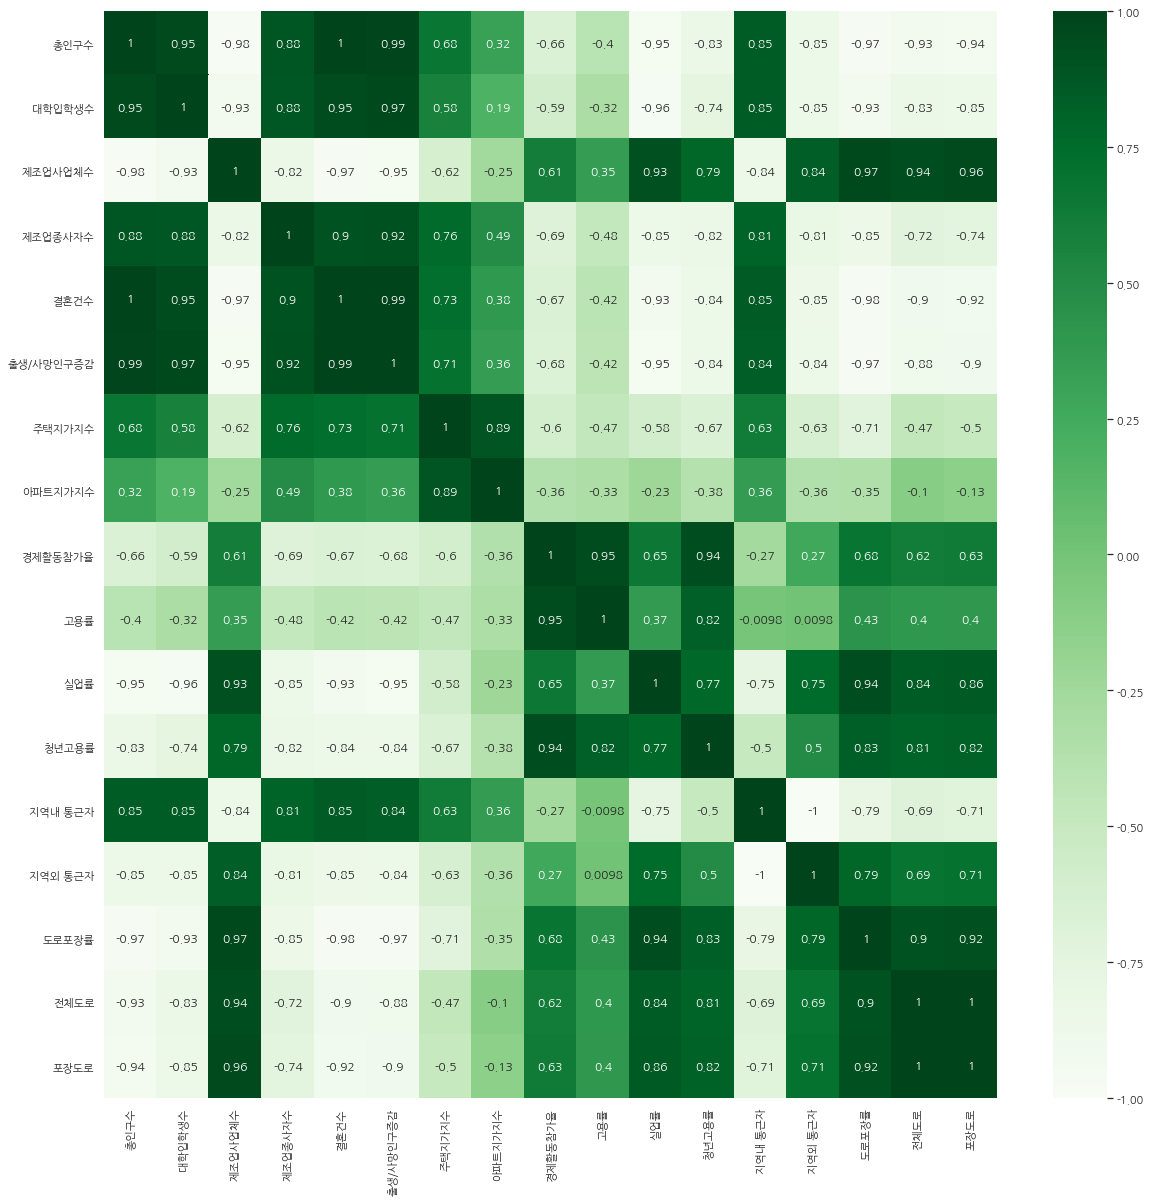

In [178]:
# 데이터 11 편입 전 중간 상관관계 조사
plt.figure(figsize = (20,20))
sns.heatmap(test17.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

In [179]:
test18 = test17.drop(columns = ["제조업사업체수","지역내 통근자","전체도로","포장도로"])
test18

,총인구수,대학입학생수,제조업종사자수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수,경제활동참가율,고용률,실업률,청년고용률,지역외 통근자,도로포장률
0,1.092031e+06,12681.0,133757.0,7256.0,6695.0,104.658333,95.025000,58.80,57.40,2.30,33.70,9.273647,94.8
1,1.087918e+06,11359.0,131886.0,6897.0,5330.0,104.200000,99.216667,59.05,57.50,2.70,33.85,10.040839,95.0
2,1.077884e+06,11605.0,133226.0,6337.0,4695.0,106.541667,103.883333,59.60,58.05,2.55,35.95,9.640786,95.3
3,1.071847e+06,10914.0,131729.0,6094.0,4240.0,109.466667,106.741667,59.70,57.90,3.05,35.70,10.918002,95.3
4,1.067406e+06,10482.0,131460.0,5835.0,3280.0,109.366667,107.333333,59.25,57.05,3.75,35.60,10.356915,95.6
5,1.058800e+06,10123.0,131305.0,5265.0,2153.0,106.233333,104.733333,60.75,58.35,3.90,37.10,10.544373,95.6
6,1.055443e+06,10176.0,128222.0,4928.0,1307.0,99.166667,96.441667,61.70,59.40,3.70,39.75,11.042904,95.7
7,1.048515e+06,9814.0,129080.0,4444.0,776.0,92.933333,92.725000,62.85,60.15,4.25,40.45,10.912443,96.2
8,1.040095e+06,9240.0,128454.0,3897.0,-313.0,93.333333,92.666667,59.70,57.10,4.25,37.35,13.211848,96.2


In [180]:
d

,행정구역별(1),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,2011.7,2011.8,...,2018.32,2018.33,2018.34,2018.35,2018.36,2018.37,2018.38,2018.39,2018.40,2018.41
0,행정구역별(1),합계,합계,합계,합계,농업임업 및 어업,농업임업 및 어업,광업,광업,제조업,...,공공행정국방 및 사회보장행정,공공행정국방 및 사회보장행정,교육서비스업,교육서비스업,보건업 및 사회복지 서비스업,보건업 및 사회복지 서비스업,예술스포츠 및 여가관련 서비스,예술스포츠 및 여가관련 서비스,협회 및 단체수리 및 기타 개인서비스업,협회 및 단체수리 및 기타 개인서비스업
1,행정구역별(1),사업체수 (개),종사자수 (명),남자종사자수 (명),여자종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),...,사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명),사업체수 (개),종사자수 (명)
2,합계,73470,407513,246139,161374,12,214,4,30,7797,...,224,13692,4397,30720,2960,38131,2437,7458,9300,18434
3,의창구,19992,100478,60570,39908,7,177,1,3,2318,...,66,7148,983,8174,695,9637,658,2486,2466,4980
4,성산구,14895,144173,100234,43939,2,12,NaN,NaN,2271,...,22,1738,1149,7175,651,7619,506,1454,1729,3834
5,마산합포구,15229,53931,27381,26550,3,25,2,24,1023,...,61,2007,745,5225,540,7679,434,1081,1937,3618
6,마산회원구,13524,65304,33770,31534,NaN,NaN,NaN,NaN,1655,...,33,1588,790,5801,538,7617,434,1240,1771,3609
7,진해구,9830,43627,24184,19443,NaN,NaN,1,3,530,...,42,1211,730,4345,536,5579,405,1197,1397,2393


In [181]:
data6

,행정구역별,2012,2012.1,2012.2,2013,2013.1,2013.2,2014,2014.1,2014.2,...,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2
0,행정구역별,유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),...,주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명)
1,창원시,16.9,1087,64446,17.7,1094,61889,17.8,1069,60162,...,54712,18.6,951,51240,18.8,894,47641,18.7,820,43807


In [182]:
data8

,행정구역별,2012,2012.1,2012.2,2013,2013.1,2013.2,2014,2014.1,2014.2,...,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2
0,행정구역별,인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),...,주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명)
1,창원시,1.7,1851,1091471,1.7,1817,1083731,1.8,1986,1075168,...,1057032,1.8,1941,1053601,1.8,1922,1044740,1.9,1943,1036738


In [183]:
d_1 = d.T
d_1

,0,1,2,3,4,5,6,7
행정구역별(1),행정구역별(1),행정구역별(1),합계,의창구,성산구,마산합포구,마산회원구,진해구
2011,합계,사업체수 (개),73470,19992,14895,15229,13524,9830
2011.1,합계,종사자수 (명),407513,100478,144173,53931,65304,43627
2011.2,합계,남자종사자수 (명),246139,60570,100234,27381,33770,24184
2011.3,합계,여자종사자수 (명),161374,39908,43939,26550,31534,19443
...,...,...,...,...,...,...,...,...
2018.37,보건업 및 사회복지 서비스업,종사자수 (명),38131,9637,7619,7679,7617,5579
2018.38,예술스포츠 및 여가관련 서비스,사업체수 (개),2437,658,506,434,434,405
2018.39,예술스포츠 및 여가관련 서비스,종사자수 (명),7458,2486,1454,1081,1240,1197
2018.40,협회 및 단체수리 및 기타 개인서비스업,사업체수 (개),9300,2466,1729,1937,1771,1397


In [184]:
d_2 = d_1[d_1[0]=="합계"]
d_2

,0,1,2,3,4,5,6,7
2011,합계,사업체수 (개),73470,19992,14895,15229,13524,9830
2011.1,합계,종사자수 (명),407513,100478,144173,53931,65304,43627
2011.2,합계,남자종사자수 (명),246139,60570,100234,27381,33770,24184
2011.3,합계,여자종사자수 (명),161374,39908,43939,26550,31534,19443
2012,합계,사업체수 (개),79305,21183,16198,16574,15120,10230
2012.1,합계,종사자수 (명),418680,103252,147663,55986,67720,44059
2012.2,합계,남자종사자수 (명),251821,61461,102083,28696,35758,23823
2012.3,합계,여자종사자수 (명),165859,41791,45580,27290,31962,19236
2013,합계,사업체수 (개),80093,20756,17198,16915,14972,10252
2013.1,합계,종사자수 (명),423669,104912,149645,57040,68432,43640


In [185]:
d_3 = d_2[d_2[1]=="종사자수 (명)"]
d_3

,0,1,2,3,4,5,6,7
2011.1,합계,종사자수 (명),407513,100478,144173,53931,65304,43627
2012.1,합계,종사자수 (명),418680,103252,147663,55986,67720,44059
2013.1,합계,종사자수 (명),423669,104912,149645,57040,68432,43640
2014.1,합계,종사자수 (명),429155,107587,148799,59652,68571,44546
2015.1,합계,종사자수 (명),439499,114422,149071,61837,68566,45603
2016.1,합계,종사자수 (명),448225,115251,154312,63028,70516,45118
2017.1,합계,종사자수 (명),450741,116519,154872,64109,69870,45371
2018.1,합계,종사자수 (명),449870,118267,151217,65042,69417,45927


In [186]:
d_4 = d_3.reset_index().drop(columns = [0,1,3,4,5,6,7])
d_4

,index,2
0,2011.1,407513
1,2012.1,418680
2,2013.1,423669
3,2014.1,429155
4,2015.1,439499
5,2016.1,448225
6,2017.1,450741
7,2018.1,449870


In [187]:
d_4["날짜"] = [2011,2012,2013,2014,2015,2016,2017,2018]
d_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   8 non-null      object
 1   2       8 non-null      object
 2   날짜      8 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 320.0+ bytes


In [188]:
dd_fitter = LinearRegression()
dd_fitter.fit(d_4["날짜"].values.reshape(-1,1), d_4[2].astype(int))

LinearRegression()

In [189]:
dd_fitter.predict([[2019]])

array([462391.28571429])

In [190]:
dd_fitter.predict([[2020]])

array([468829.57142857])

In [191]:
dd_list = []
j = 0
for i in d_4[2]:
    if j >= 1:
        dd_list.append(i)
    j += 1

dd_list.append(462391)   
dd_list.append(468829)
dd_list

['418680',
 '423669',
 '429155',
 '439499',
 '448225',
 '450741',
 '449870',
 462391,
 468829]

In [192]:
test18["총종사자수"] = dd_list

In [193]:
test18["제조업종사자비율"] = test18["제조업종사자수"]*100/test18["총종사자수"].astype(int)
test18

,총인구수,대학입학생수,제조업종사자수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수,경제활동참가율,고용률,실업률,청년고용률,지역외 통근자,도로포장률,총종사자수,제조업종사자비율
0,1.092031e+06,12681.0,133757.0,7256.0,6695.0,104.658333,95.025000,58.80,57.40,2.30,33.70,9.273647,94.8,418680,31.947311
1,1.087918e+06,11359.0,131886.0,6897.0,5330.0,104.200000,99.216667,59.05,57.50,2.70,33.85,10.040839,95.0,423669,31.129490
2,1.077884e+06,11605.0,133226.0,6337.0,4695.0,106.541667,103.883333,59.60,58.05,2.55,35.95,9.640786,95.3,429155,31.043795
3,1.071847e+06,10914.0,131729.0,6094.0,4240.0,109.466667,106.741667,59.70,57.90,3.05,35.70,10.918002,95.3,439499,29.972537
4,1.067406e+06,10482.0,131460.0,5835.0,3280.0,109.366667,107.333333,59.25,57.05,3.75,35.60,10.356915,95.6,448225,29.329020
5,1.058800e+06,10123.0,131305.0,5265.0,2153.0,106.233333,104.733333,60.75,58.35,3.90,37.10,10.544373,95.6,450741,29.130920
6,1.055443e+06,10176.0,128222.0,4928.0,1307.0,99.166667,96.441667,61.70,59.40,3.70,39.75,11.042904,95.7,449870,28.502012
7,1.048515e+06,9814.0,129080.0,4444.0,776.0,92.933333,92.725000,62.85,60.15,4.25,40.45,10.912443,96.2,462391,27.915768
8,1.040095e+06,9240.0,128454.0,3897.0,-313.0,93.333333,92.666667,59.70,57.10,4.25,37.35,13.211848,96.2,468829,27.398902


In [194]:
data6

,행정구역별,2012,2012.1,2012.2,2013,2013.1,2013.2,2014,2014.1,2014.2,...,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2
0,행정구역별,유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),...,주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명),유아 천명당 보육시설수<br>(A÷B×1000) (개),보육시설<br>(A) (개),주민등록인구(0~5세)<br>(B) (명)
1,창원시,16.9,1087,64446,17.7,1094,61889,17.8,1069,60162,...,54712,18.6,951,51240,18.8,894,47641,18.7,820,43807


In [195]:
data8

,행정구역별,2012,2012.1,2012.2,2013,2013.1,2013.2,2014,2014.1,2014.2,...,2017.2,2018,2018.1,2018.2,2019,2019.1,2019.2,2020,2020.1,2020.2
0,행정구역별,인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),...,주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명),인구 천명당 사설학원수<br>(A÷B×1000) (개),사설학원수<br>(A) (개),주민등록인구<br>(B) (명)
1,창원시,1.7,1851,1091471,1.7,1817,1083731,1.8,1986,1075168,...,1057032,1.8,1941,1053601,1.8,1922,1044740,1.9,1943,1036738


In [196]:
data6_1 = data6.T
data6_1

,0,1
행정구역별,행정구역별,창원시
2012,유아 천명당 보육시설수<br>(A÷B×1000) (개),16.9
2012.1,보육시설<br>(A) (개),1087
2012.2,주민등록인구(0~5세)<br>(B) (명),64446
2013,유아 천명당 보육시설수<br>(A÷B×1000) (개),17.7
2013.1,보육시설<br>(A) (개),1094
2013.2,주민등록인구(0~5세)<br>(B) (명),61889
2014,유아 천명당 보육시설수<br>(A÷B×1000) (개),17.8
2014.1,보육시설<br>(A) (개),1069
2014.2,주민등록인구(0~5세)<br>(B) (명),60162


In [197]:
data6_2 = data6_1[data6_1[0]=="보육시설<br>(A) (개)"]
data6_3 = data6_2.reset_index()
data6_3

,index,0,1
0,2012.1,보육시설<br>(A) (개),1087
1,2013.1,보육시설<br>(A) (개),1094
2,2014.1,보육시설<br>(A) (개),1069
3,2015.1,보육시설<br>(A) (개),1044
4,2016.1,보육시설<br>(A) (개),1022
5,2017.1,보육시설<br>(A) (개),998
6,2018.1,보육시설<br>(A) (개),951
7,2019.1,보육시설<br>(A) (개),894
8,2020.1,보육시설<br>(A) (개),820


In [198]:
test18["보육시설수"] = data6_3[1]
test18

,총인구수,대학입학생수,제조업종사자수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수,경제활동참가율,고용률,실업률,청년고용률,지역외 통근자,도로포장률,총종사자수,제조업종사자비율,보육시설수
0,1.092031e+06,12681.0,133757.0,7256.0,6695.0,104.658333,95.025000,58.80,57.40,2.30,33.70,9.273647,94.8,418680,31.947311,1087
1,1.087918e+06,11359.0,131886.0,6897.0,5330.0,104.200000,99.216667,59.05,57.50,2.70,33.85,10.040839,95.0,423669,31.129490,1094
2,1.077884e+06,11605.0,133226.0,6337.0,4695.0,106.541667,103.883333,59.60,58.05,2.55,35.95,9.640786,95.3,429155,31.043795,1069
3,1.071847e+06,10914.0,131729.0,6094.0,4240.0,109.466667,106.741667,59.70,57.90,3.05,35.70,10.918002,95.3,439499,29.972537,1044
4,1.067406e+06,10482.0,131460.0,5835.0,3280.0,109.366667,107.333333,59.25,57.05,3.75,35.60,10.356915,95.6,448225,29.329020,1022
5,1.058800e+06,10123.0,131305.0,5265.0,2153.0,106.233333,104.733333,60.75,58.35,3.90,37.10,10.544373,95.6,450741,29.130920,998
6,1.055443e+06,10176.0,128222.0,4928.0,1307.0,99.166667,96.441667,61.70,59.40,3.70,39.75,11.042904,95.7,449870,28.502012,951
7,1.048515e+06,9814.0,129080.0,4444.0,776.0,92.933333,92.725000,62.85,60.15,4.25,40.45,10.912443,96.2,462391,27.915768,894
8,1.040095e+06,9240.0,128454.0,3897.0,-313.0,93.333333,92.666667,59.70,57.10,4.25,37.35,13.211848,96.2,468829,27.398902,820


In [199]:
data8_1 = data8.T
data8_1

,0,1
행정구역별,행정구역별,창원시
2012,인구 천명당 사설학원수<br>(A÷B×1000) (개),1.7
2012.1,사설학원수<br>(A) (개),1851
2012.2,주민등록인구<br>(B) (명),1091471
2013,인구 천명당 사설학원수<br>(A÷B×1000) (개),1.7
2013.1,사설학원수<br>(A) (개),1817
2013.2,주민등록인구<br>(B) (명),1083731
2014,인구 천명당 사설학원수<br>(A÷B×1000) (개),1.8
2014.1,사설학원수<br>(A) (개),1986
2014.2,주민등록인구<br>(B) (명),1075168


In [200]:
data8_2 = data8_1[data8_1[0] == "사설학원수<br>(A) (개)"]
data8_3 = data8_2.reset_index()
data8_3

,index,0,1
0,2012.1,사설학원수<br>(A) (개),1851
1,2013.1,사설학원수<br>(A) (개),1817
2,2014.1,사설학원수<br>(A) (개),1986
3,2015.1,사설학원수<br>(A) (개),1952
4,2016.1,사설학원수<br>(A) (개),1947
5,2017.1,사설학원수<br>(A) (개),1946
6,2018.1,사설학원수<br>(A) (개),1941
7,2019.1,사설학원수<br>(A) (개),1922
8,2020.1,사설학원수<br>(A) (개),1943


In [201]:
test18["사설학원수"] = data8_3[1]
test18

,총인구수,대학입학생수,제조업종사자수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수,경제활동참가율,고용률,실업률,청년고용률,지역외 통근자,도로포장률,총종사자수,제조업종사자비율,보육시설수,사설학원수
0,1.092031e+06,12681.0,133757.0,7256.0,6695.0,104.658333,95.025000,58.80,57.40,2.30,33.70,9.273647,94.8,418680,31.947311,1087,1851
1,1.087918e+06,11359.0,131886.0,6897.0,5330.0,104.200000,99.216667,59.05,57.50,2.70,33.85,10.040839,95.0,423669,31.129490,1094,1817
2,1.077884e+06,11605.0,133226.0,6337.0,4695.0,106.541667,103.883333,59.60,58.05,2.55,35.95,9.640786,95.3,429155,31.043795,1069,1986
3,1.071847e+06,10914.0,131729.0,6094.0,4240.0,109.466667,106.741667,59.70,57.90,3.05,35.70,10.918002,95.3,439499,29.972537,1044,1952
4,1.067406e+06,10482.0,131460.0,5835.0,3280.0,109.366667,107.333333,59.25,57.05,3.75,35.60,10.356915,95.6,448225,29.329020,1022,1947
5,1.058800e+06,10123.0,131305.0,5265.0,2153.0,106.233333,104.733333,60.75,58.35,3.90,37.10,10.544373,95.6,450741,29.130920,998,1946
6,1.055443e+06,10176.0,128222.0,4928.0,1307.0,99.166667,96.441667,61.70,59.40,3.70,39.75,11.042904,95.7,449870,28.502012,951,1941
7,1.048515e+06,9814.0,129080.0,4444.0,776.0,92.933333,92.725000,62.85,60.15,4.25,40.45,10.912443,96.2,462391,27.915768,894,1922
8,1.040095e+06,9240.0,128454.0,3897.0,-313.0,93.333333,92.666667,59.70,57.10,4.25,37.35,13.211848,96.2,468829,27.398902,820,1943


In [202]:
test19 = test18.drop(columns = "제조업종사자수")
test19

,총인구수,대학입학생수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수,경제활동참가율,고용률,실업률,청년고용률,지역외 통근자,도로포장률,총종사자수,제조업종사자비율,보육시설수,사설학원수
0,1.092031e+06,12681.0,7256.0,6695.0,104.658333,95.025000,58.80,57.40,2.30,33.70,9.273647,94.8,418680,31.947311,1087,1851
1,1.087918e+06,11359.0,6897.0,5330.0,104.200000,99.216667,59.05,57.50,2.70,33.85,10.040839,95.0,423669,31.129490,1094,1817
2,1.077884e+06,11605.0,6337.0,4695.0,106.541667,103.883333,59.60,58.05,2.55,35.95,9.640786,95.3,429155,31.043795,1069,1986
3,1.071847e+06,10914.0,6094.0,4240.0,109.466667,106.741667,59.70,57.90,3.05,35.70,10.918002,95.3,439499,29.972537,1044,1952
4,1.067406e+06,10482.0,5835.0,3280.0,109.366667,107.333333,59.25,57.05,3.75,35.60,10.356915,95.6,448225,29.329020,1022,1947
5,1.058800e+06,10123.0,5265.0,2153.0,106.233333,104.733333,60.75,58.35,3.90,37.10,10.544373,95.6,450741,29.130920,998,1946
6,1.055443e+06,10176.0,4928.0,1307.0,99.166667,96.441667,61.70,59.40,3.70,39.75,11.042904,95.7,449870,28.502012,951,1941
7,1.048515e+06,9814.0,4444.0,776.0,92.933333,92.725000,62.85,60.15,4.25,40.45,10.912443,96.2,462391,27.915768,894,1922
8,1.040095e+06,9240.0,3897.0,-313.0,93.333333,92.666667,59.70,57.10,4.25,37.35,13.211848,96.2,468829,27.398902,820,1943


In [203]:
test19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총인구수       9 non-null      float64
 1   대학입학생수     9 non-null      float64
 2   결혼건수       9 non-null      float64
 3   출생/사망인구증감  9 non-null      float64
 4   주택지가지수     9 non-null      float64
 5   아파트지가지수    9 non-null      float64
 6   경제활동참가율    9 non-null      float64
 7   고용률        9 non-null      float64
 8   실업률        9 non-null      float64
 9   청년고용률      9 non-null      float64
 10  지역외 통근자    9 non-null      float64
 11  도로포장률      9 non-null      float64
 12  총종사자수      9 non-null      object 
 13  제조업종사자비율   9 non-null      float64
 14  보육시설수      9 non-null      object 
 15  사설학원수      9 non-null      object 
dtypes: float64(13), object(3)
memory usage: 1.2+ KB


In [204]:
X = test19.drop(columns = "총인구수")
Y = test19["총인구수"]

total_fitter2 = LinearRegression()
total_fitter2.fit(X, Y)

LinearRegression()

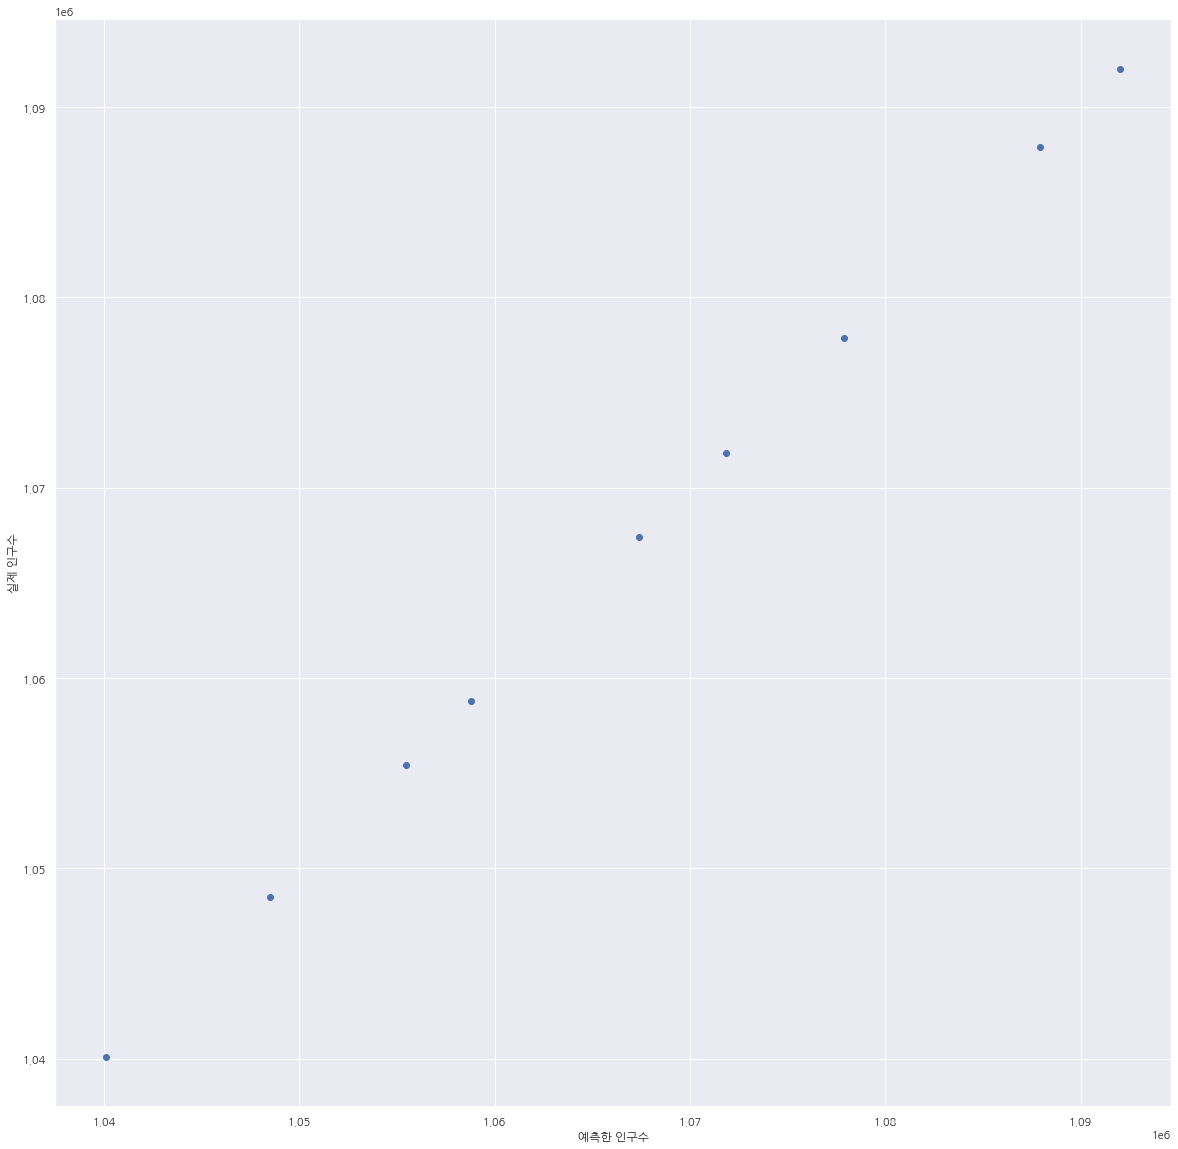

In [205]:
plt.figure(figsize = (20,20))
plt.xlabel("예측한 인구수")
plt.ylabel("실제 인구수")
plt.scatter(total_fitter2.predict(X),test19["총인구수"])

In [206]:
total_fitter2.coef_

array([-3.22688723e+00,  1.82171528e+01,  8.62330126e-02, -4.34332273e+02,
       -1.23474525e+02, -7.84435768e+01, -8.77808627e+01,  1.22447163e+01,
       -1.60110176e+02, -1.18686069e+02,  3.55788683e+01, -1.02556229e-01,
        7.28080933e+01,  7.45557701e+00,  2.21028184e+01])

In [207]:
# 정규 분포를 이용한 가중치 편집
col_list = ["총인구수","대학입학생수","결혼건수","출생/사망인구증감","주택지가지수","아파트지가지수","경제활동참가율","고용률","실업률","청년고용률","지역외 통근자","도로포장률","총종사자수","제조업종사자비율","보육시설수","사설학원수"]
test_01 = pd.DataFrame()
for i in col_list:
    tmp = zero_to_one(test19[i].astype(float))
    print(tmp)
    test_01[i] = tmp

test_01

[1.0, 0.9208221683808532, 0.7276093897918878, 0.611381031080019, 0.5258684594772384, 0.3601559616834851, 0.295528135680244, 0.16212634179997668, 0.0]
[1.0, 0.6158093577448416, 0.6873002034292357, 0.4864864864864865, 0.36094158674803833, 0.2566114501598373, 0.27201394943330426, 0.16681197326358616, 0.0]
[1.0, 0.8931229532598988, 0.7264066686513844, 0.6540637094373325, 0.5769574278058947, 0.4072640666865138, 0.30693658827031856, 0.1628460851443882, 0.0]
[1.0, 0.805222602739726, 0.7146118721461188, 0.6496860730593608, 0.5126997716894978, 0.3518835616438356, 0.23116438356164384, 0.15539383561643835, 0.0]
[0.7091733870967739, 0.6814516129032259, 0.8230846774193568, 1.0, 0.993951612903227, 0.8044354838709685, 0.3770161290322599, 0.0, 0.02419354838709712]
[0.16079545454545308, 0.44659090909091004, 0.7647727272727284, 0.9596590909090916, 1.0, 0.8227272727272746, 0.25738636363636375, 0.003977272727270089, 0.0]
[0.0, 0.06172839506172844, 0.1975308641975303, 0.2222222222222238, 0.1111111111111119

,총인구수,대학입학생수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수,경제활동참가율,고용률,실업률,청년고용률,지역외 통근자,도로포장률,총종사자수,제조업종사자비율,보육시설수,사설학원수
0,1.000000,1.000000,1.000000,1.000000,0.709173,0.160795,0.000000,0.112903,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.974453,0.201183
1,0.920822,0.615809,0.893123,0.805223,0.681452,0.446591,0.061728,0.145161,0.205128,0.022222,0.194808,0.142857,0.099484,0.820196,1.000000,0.000000
2,0.727609,0.687300,0.726407,0.714612,0.823085,0.764773,0.197531,0.322581,0.128205,0.333333,0.093225,0.357143,0.208878,0.801356,0.908759,1.000000
3,0.611381,0.486486,0.654064,0.649686,1.000000,0.959659,0.222222,0.274194,0.384615,0.296296,0.417540,0.357143,0.415143,0.565832,0.817518,0.798817
4,0.525868,0.360942,0.576957,0.512700,0.993952,1.000000,0.111111,0.000000,0.743590,0.281481,0.275067,0.571429,0.589144,0.424350,0.737226,0.769231
5,0.360156,0.256611,0.407264,0.351884,0.804435,0.822727,0.481481,0.419355,0.820513,0.503704,0.322667,0.571429,0.639315,0.380796,0.649635,0.763314
6,0.295528,0.272014,0.306937,0.231164,0.377016,0.257386,0.716049,0.758065,0.717949,0.896296,0.449255,0.642857,0.621947,0.242526,0.478102,0.733728
7,0.162126,0.166812,0.162846,0.155394,0.000000,0.003977,1.000000,1.000000,1.000000,1.000000,0.416128,1.000000,0.871623,0.113637,0.270073,0.621302
8,0.000000,0.000000,0.000000,0.000000,0.024194,0.000000,0.222222,0.016129,1.000000,0.540741,1.000000,1.000000,1.000000,0.000000,0.000000,0.745562


In [208]:
test19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   총인구수       9 non-null      float64
 1   대학입학생수     9 non-null      float64
 2   결혼건수       9 non-null      float64
 3   출생/사망인구증감  9 non-null      float64
 4   주택지가지수     9 non-null      float64
 5   아파트지가지수    9 non-null      float64
 6   경제활동참가율    9 non-null      float64
 7   고용률        9 non-null      float64
 8   실업률        9 non-null      float64
 9   청년고용률      9 non-null      float64
 10  지역외 통근자    9 non-null      float64
 11  도로포장률      9 non-null      float64
 12  총종사자수      9 non-null      object 
 13  제조업종사자비율   9 non-null      float64
 14  보육시설수      9 non-null      object 
 15  사설학원수      9 non-null      object 
dtypes: float64(13), object(3)
memory usage: 1.2+ KB


In [209]:
X = test_01.drop(columns = "총인구수")
Y = test_01["총인구수"]

total_fitter3 = LinearRegression()
total_fitter3.fit(X, Y)

LinearRegression()

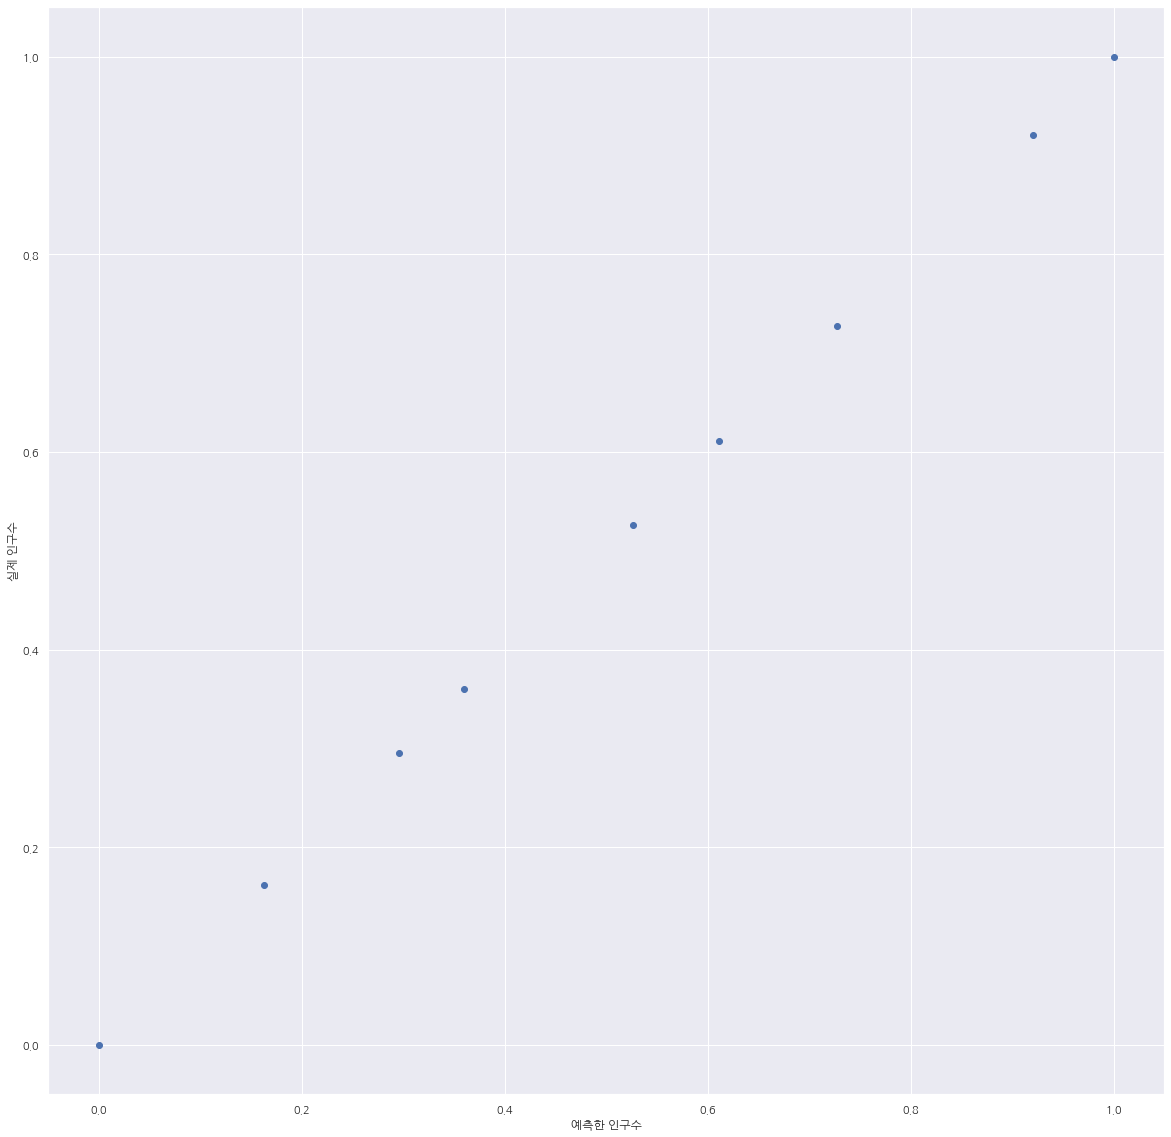

In [210]:
plt.figure(figsize = (20,20))
plt.xlabel("예측한 인구수")
plt.ylabel("실제 인구수")
plt.scatter(total_fitter3.predict(X),test_01["총인구수"])

In [211]:
total_fitter3.coef_

array([ 0.07591204,  0.29009441,  0.22052251, -0.03604952,  0.06965537,
       -0.12617182, -0.01827612, -0.19438425,  0.10873528, -0.08868625,
        0.16140947, -0.13022909, -0.07337835,  0.1822827 , -0.18985761])

In [212]:
total_fitter2.coef_

array([-3.22688723e+00,  1.82171528e+01,  8.62330126e-02, -4.34332273e+02,
       -1.23474525e+02, -7.84435768e+01, -8.77808627e+01,  1.22447163e+01,
       -1.60110176e+02, -1.18686069e+02,  3.55788683e+01, -1.02556229e-01,
        7.28080933e+01,  7.45557701e+00,  2.21028184e+01])

<BarContainer object of 15 artists>

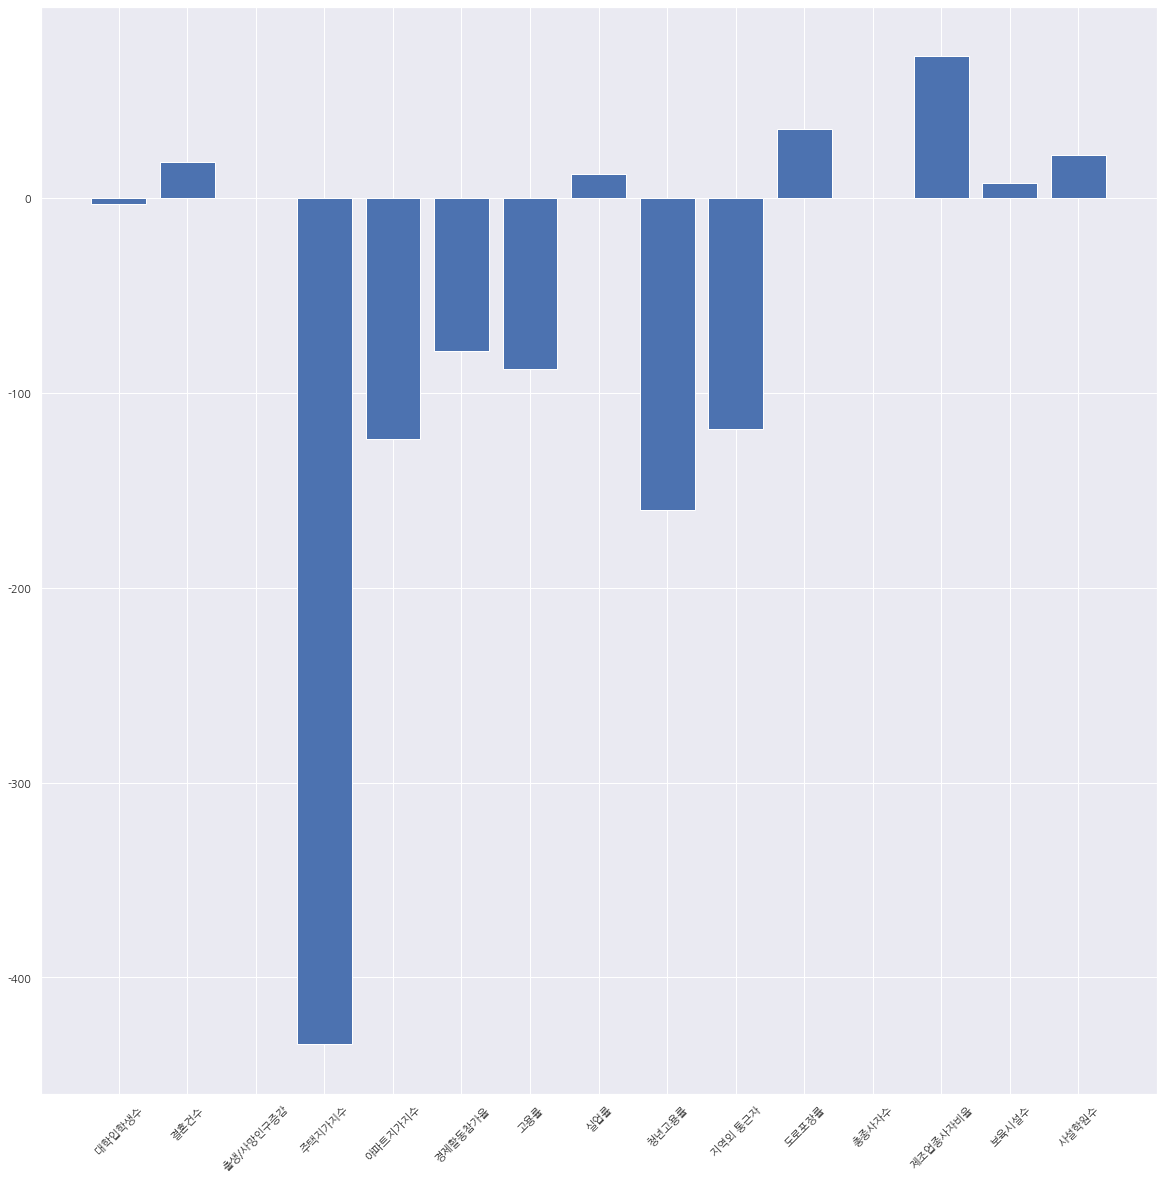

In [213]:
name_space = ["대학입학생수","결혼건수","출생/사망인구증감","주택지가지수","아파트지가지수","경제활동참가율","고용률","실업률","청년고용률","지역외 통근자","도로포장률","총종사자수","제조업종사자비율","보육시설수","사설학원수"]
plt.figure(figsize = (20,20))
plt.xticks(rotation = 45)
plt.bar(name_space,total_fitter2.coef_)

<BarContainer object of 15 artists>

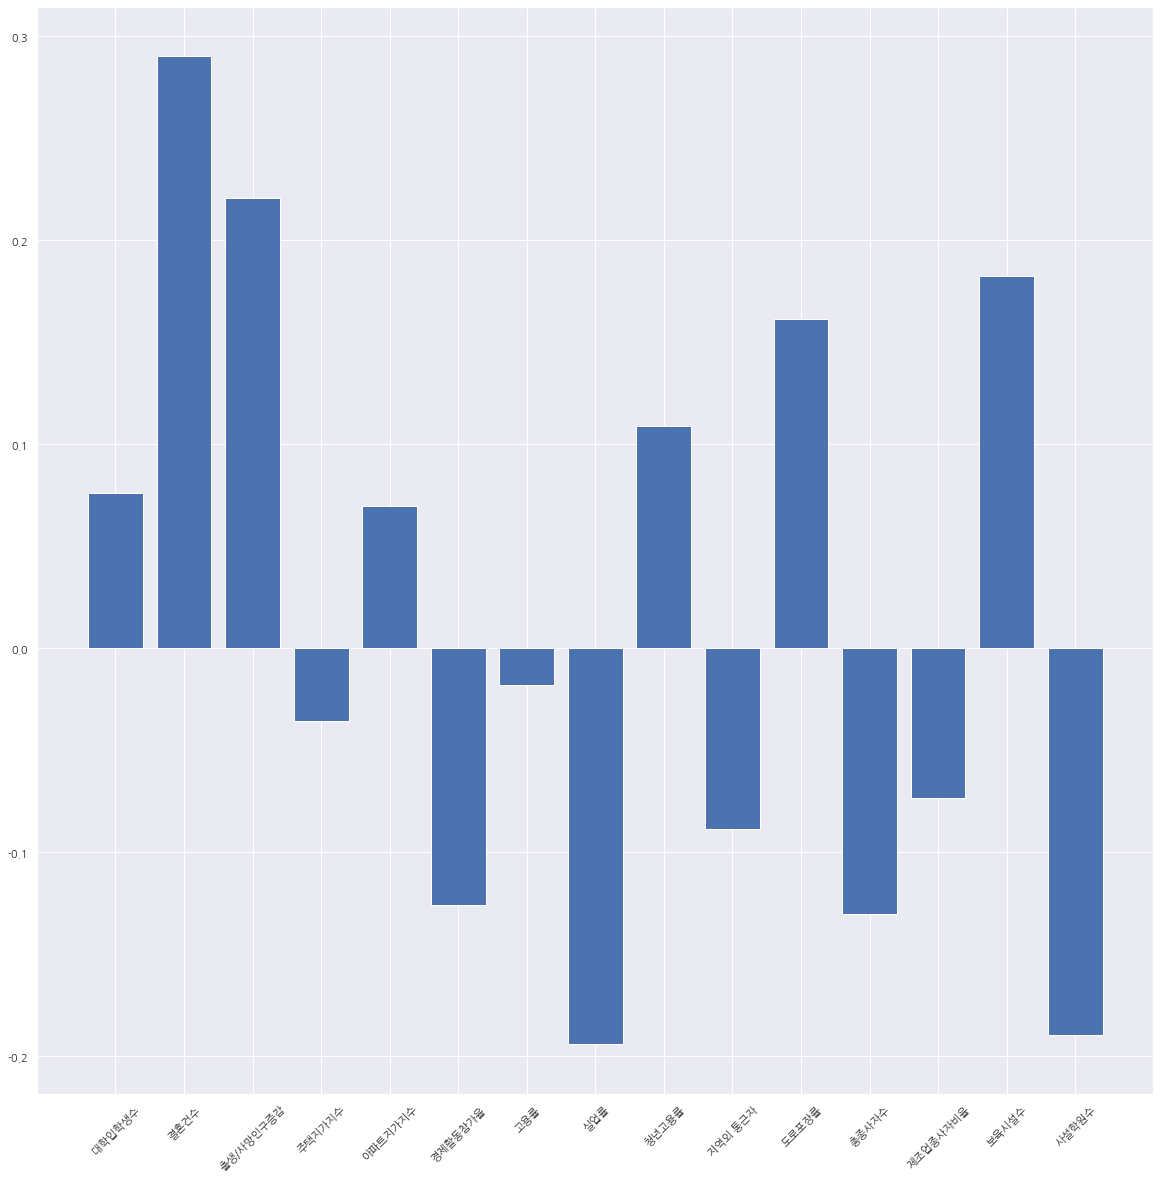

In [214]:
plt.figure(figsize = (20,20))
plt.xticks(rotation = 45)
plt.bar(name_space,total_fitter3.coef_)

In [215]:
test19

,총인구수,대학입학생수,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수,경제활동참가율,고용률,실업률,청년고용률,지역외 통근자,도로포장률,총종사자수,제조업종사자비율,보육시설수,사설학원수
0,1.092031e+06,12681.0,7256.0,6695.0,104.658333,95.025000,58.80,57.40,2.30,33.70,9.273647,94.8,418680,31.947311,1087,1851
1,1.087918e+06,11359.0,6897.0,5330.0,104.200000,99.216667,59.05,57.50,2.70,33.85,10.040839,95.0,423669,31.129490,1094,1817
2,1.077884e+06,11605.0,6337.0,4695.0,106.541667,103.883333,59.60,58.05,2.55,35.95,9.640786,95.3,429155,31.043795,1069,1986
3,1.071847e+06,10914.0,6094.0,4240.0,109.466667,106.741667,59.70,57.90,3.05,35.70,10.918002,95.3,439499,29.972537,1044,1952
4,1.067406e+06,10482.0,5835.0,3280.0,109.366667,107.333333,59.25,57.05,3.75,35.60,10.356915,95.6,448225,29.329020,1022,1947
5,1.058800e+06,10123.0,5265.0,2153.0,106.233333,104.733333,60.75,58.35,3.90,37.10,10.544373,95.6,450741,29.130920,998,1946
6,1.055443e+06,10176.0,4928.0,1307.0,99.166667,96.441667,61.70,59.40,3.70,39.75,11.042904,95.7,449870,28.502012,951,1941
7,1.048515e+06,9814.0,4444.0,776.0,92.933333,92.725000,62.85,60.15,4.25,40.45,10.912443,96.2,462391,27.915768,894,1922
8,1.040095e+06,9240.0,3897.0,-313.0,93.333333,92.666667,59.70,57.10,4.25,37.35,13.211848,96.2,468829,27.398902,820,1943


In [216]:
test10

,총인구수,날짜분포,대학입학생수,제조업사업체수,제조업종사자수,출생인구,사망인구,결혼건수,출생/사망인구증감,주택지가지수,아파트지가지수
0,1092391.0,0.000000,12681,8640,133757,11627,4932,7256,6695,105.6,95.6
1,1091733.0,0.009346,12681,8640,133757,11627,4932,7256,6695,105.6,95.6
2,1092391.0,0.018692,12681,8640,133757,11627,4932,7256,6695,105.5,95.3
3,1091614.0,0.028037,12681,8640,133757,11627,4932,7256,6695,105.4,95.5
4,1092554.0,0.037383,12681,8640,133757,11627,4932,7256,6695,105.3,95.3
...,...,...,...,...,...,...,...,...,...,...,...
103,1038677.0,0.962617,9240,11174,128454,5376,5689,3897,-313,93.6,92.2
104,1038101.0,0.971963,9240,11174,128454,5376,5689,3897,-313,93.9,93.1
105,1037709.0,0.981308,9240,11174,128454,5376,5689,3897,-313,94.1,93.7
106,1037161.0,0.990654,9240,11174,128454,5376,5689,3897,-313,95.2,95.5


In [217]:
y_lst = ["대학입학생수","결혼건수","출생/사망인구증감","경제활동참가율","고용률","실업률","청년고용률","지역외 통근자","도로포장률","총종사자수","제조업종사자비율","보육시설수","사설학원수"]
test_final = pd.DataFrame()
test_final["총인구수"] = test10["총인구수"]
test_final["주택지가지수"] = test10["주택지가지수"]
test_final["아파트지가지수"] = test10["아파트지가지수"]


for i in y_lst:
    tmp_list = []
    for j in test19[i]:
        for k in range(0,12):
            tmp_list.append(j)
    test_final[i] = tmp_list

test_final

,총인구수,주택지가지수,아파트지가지수,대학입학생수,결혼건수,출생/사망인구증감,경제활동참가율,고용률,실업률,청년고용률,지역외 통근자,도로포장률,총종사자수,제조업종사자비율,보육시설수,사설학원수
0,1092391.0,105.6,95.6,12681.0,7256.0,6695.0,58.8,57.4,2.30,33.70,9.273647,94.8,418680,31.947311,1087,1851
1,1091733.0,105.6,95.6,12681.0,7256.0,6695.0,58.8,57.4,2.30,33.70,9.273647,94.8,418680,31.947311,1087,1851
2,1092391.0,105.5,95.3,12681.0,7256.0,6695.0,58.8,57.4,2.30,33.70,9.273647,94.8,418680,31.947311,1087,1851
3,1091614.0,105.4,95.5,12681.0,7256.0,6695.0,58.8,57.4,2.30,33.70,9.273647,94.8,418680,31.947311,1087,1851
4,1092554.0,105.3,95.3,12681.0,7256.0,6695.0,58.8,57.4,2.30,33.70,9.273647,94.8,418680,31.947311,1087,1851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1038677.0,93.6,92.2,9240.0,3897.0,-313.0,59.7,57.1,4.25,37.35,13.211848,96.2,468829,27.398902,820,1943
104,1038101.0,93.9,93.1,9240.0,3897.0,-313.0,59.7,57.1,4.25,37.35,13.211848,96.2,468829,27.398902,820,1943
105,1037709.0,94.1,93.7,9240.0,3897.0,-313.0,59.7,57.1,4.25,37.35,13.211848,96.2,468829,27.398902,820,1943
106,1037161.0,95.2,95.5,9240.0,3897.0,-313.0,59.7,57.1,4.25,37.35,13.211848,96.2,468829,27.398902,820,1943


In [218]:
X = test_final.drop(columns = "총인구수")
Y = test_final["총인구수"]

total_fitter3 = LinearRegression()
total_fitter3.fit(X, Y)

LinearRegression()

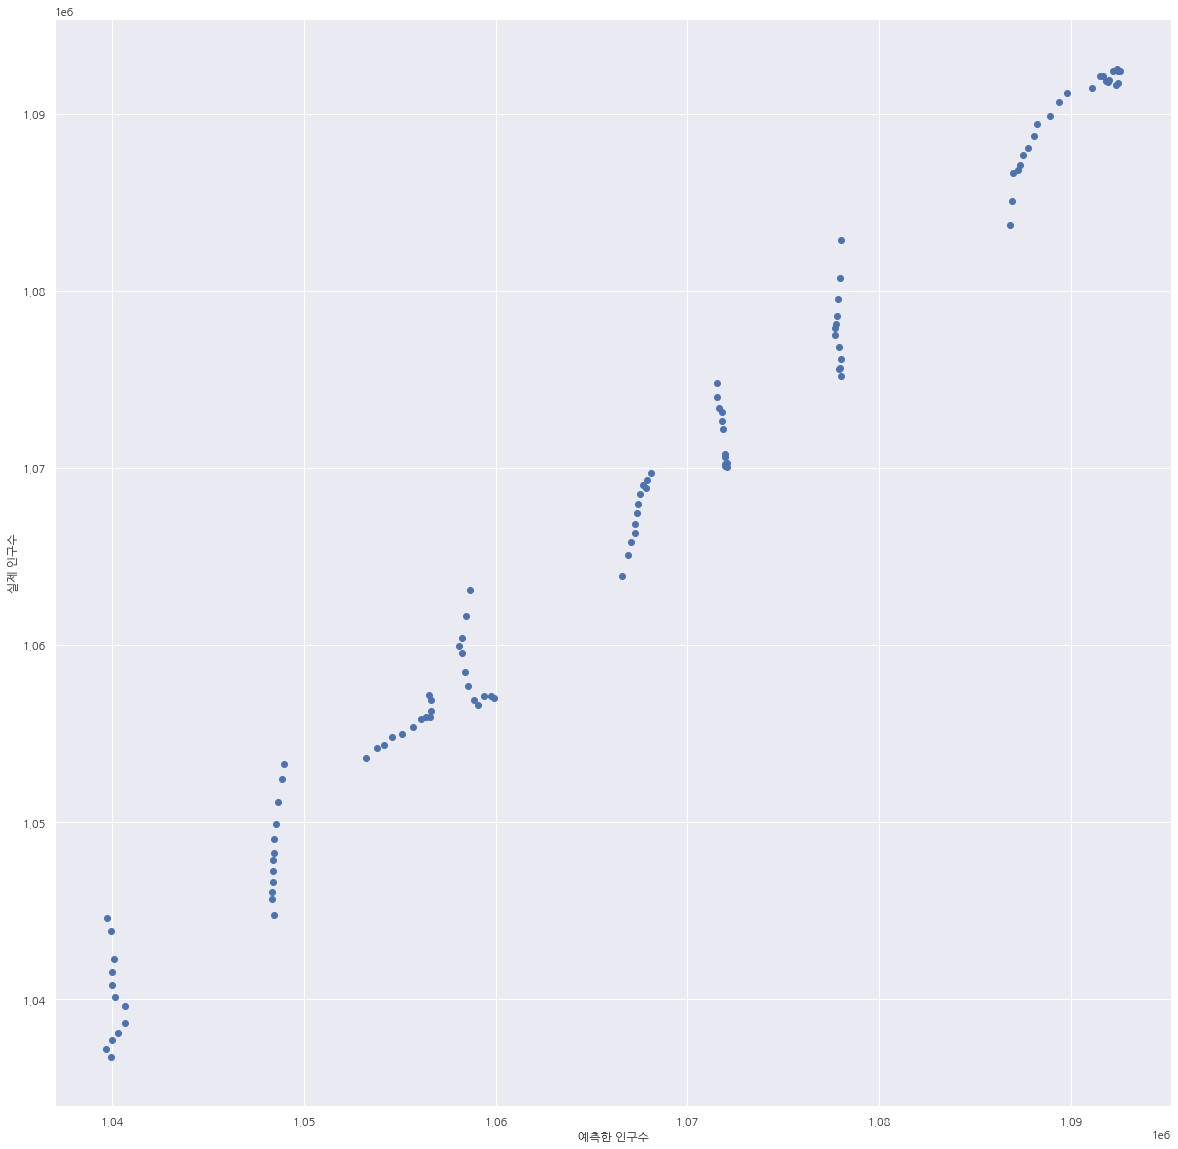

In [219]:
plt.figure(figsize = (20,20))
plt.xlabel("예측한 인구수")
plt.ylabel("실제 인구수")
plt.scatter(total_fitter3.predict(X),test_final["총인구수"])

In [220]:
total_fitter3.coef_

array([ 8.84396937e+02, -7.36142724e+02, -1.96246898e+01,  2.39407173e+01,
        4.58091137e+00,  7.36478642e+02,  5.47422066e+02,  2.00471437e+02,
        4.05249817e+00, -4.21510583e+03,  1.52884192e+03, -8.98944821e-01,
        1.47941971e+03, -2.31647305e+02,  5.27263986e+01])

<BarContainer object of 15 artists>

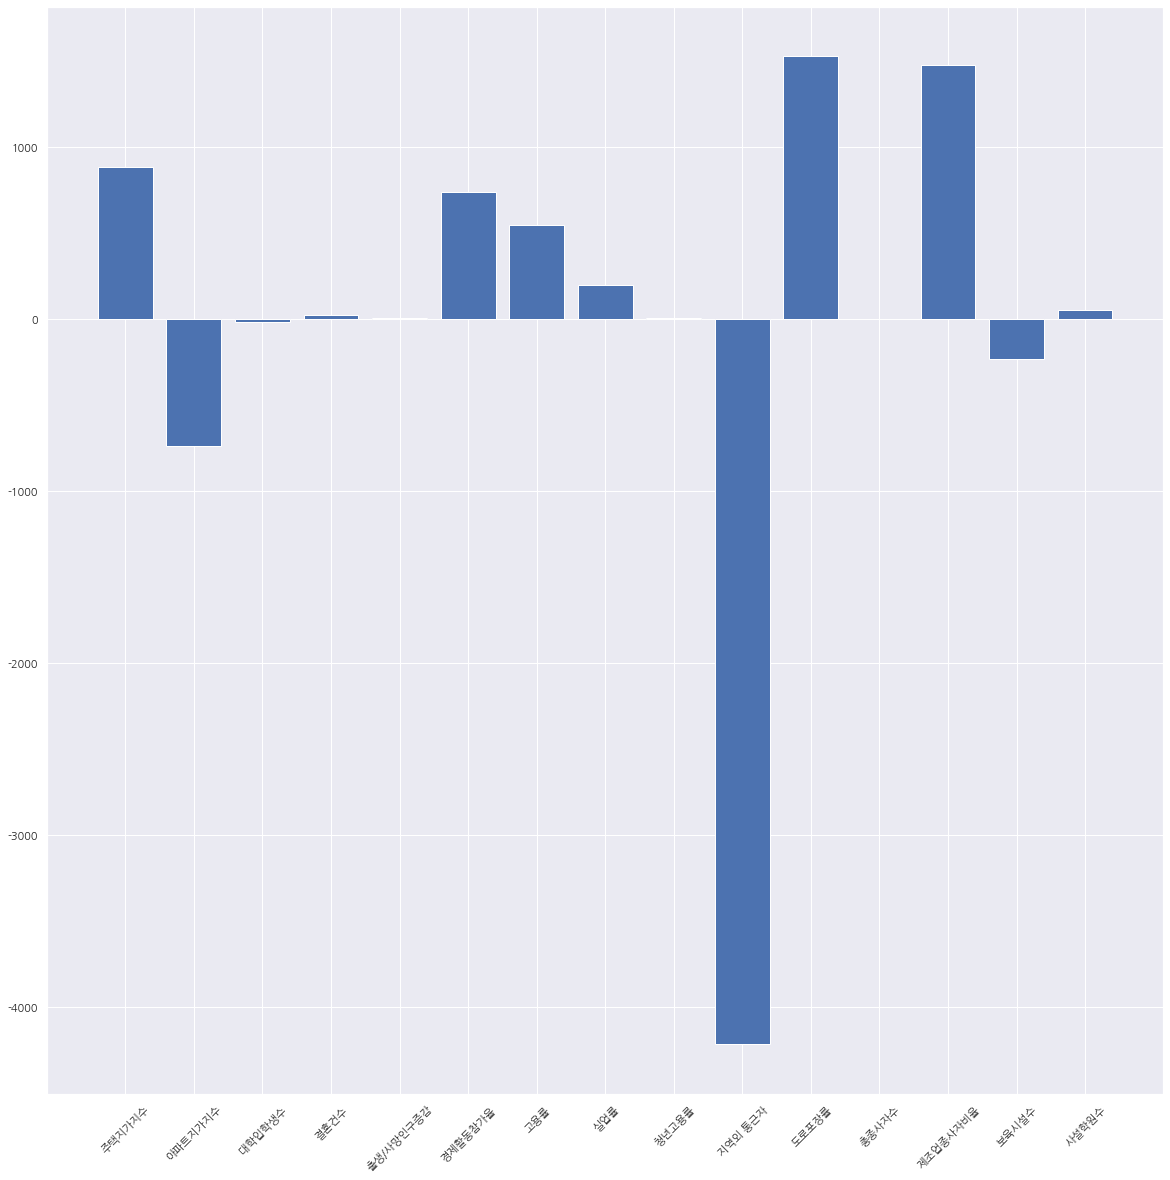

In [222]:
name_space2 = ["주택지가지수","아파트지가지수","대학입학생수","결혼건수","출생/사망인구증감","경제활동참가율","고용률","실업률","청년고용률","지역외 통근자","도로포장률","총종사자수","제조업종사자비율","보육시설수","사설학원수"]
plt.figure(figsize = (20,20))
plt.xticks(rotation = 45)
plt.bar(name_space2,total_fitter3.coef_)

<AxesSubplot:>

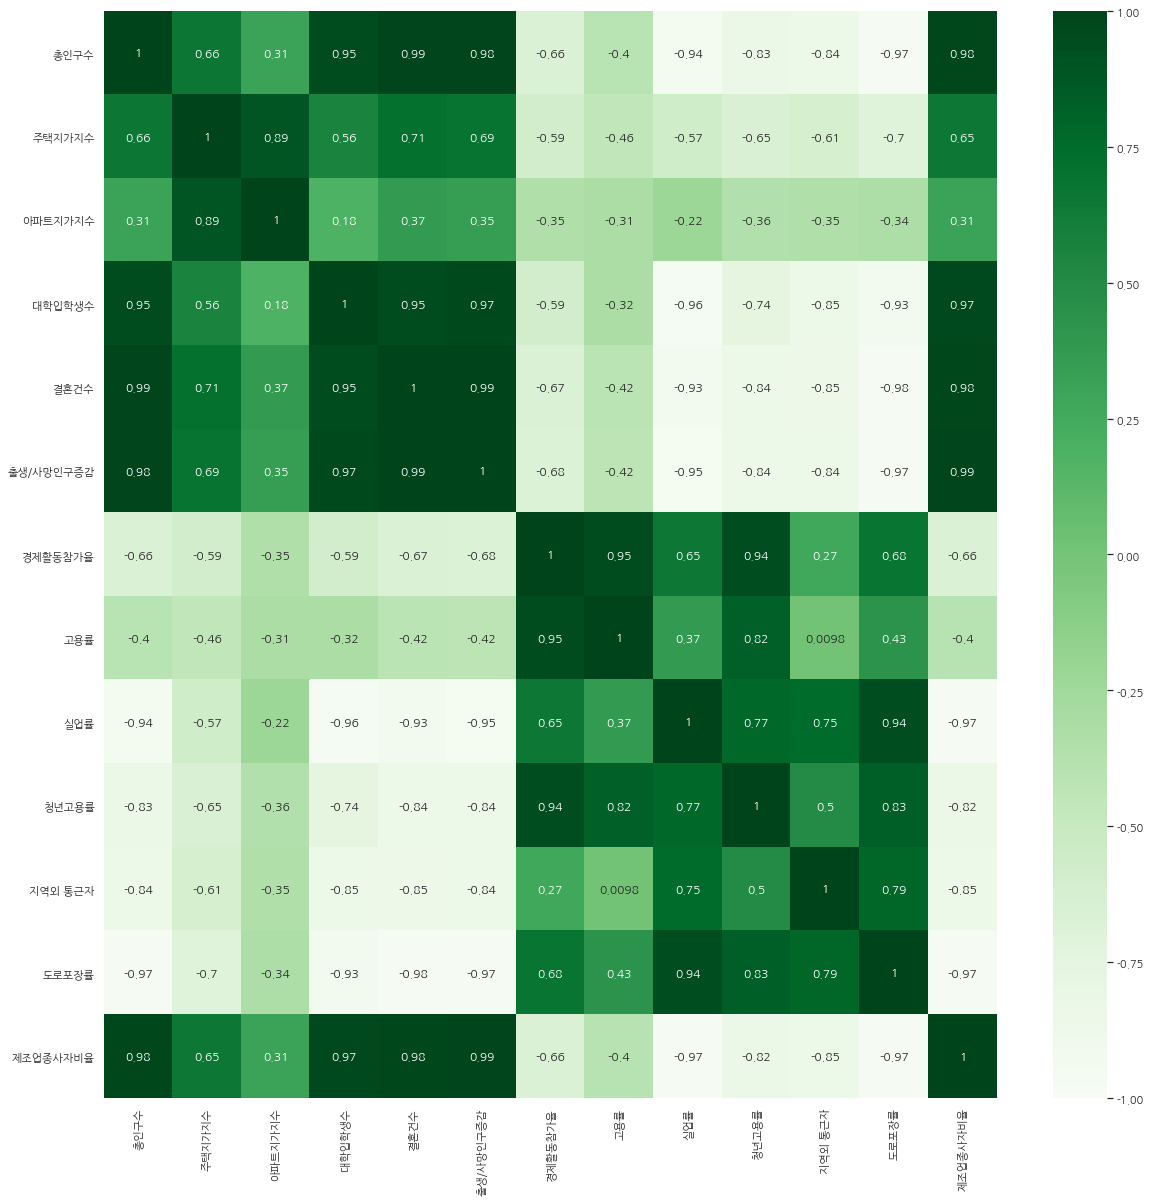

In [223]:
# 월별로 나타낸 데이터의 상관관계 조사
plt.figure(figsize = (20,20))
sns.heatmap(test_final.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

<AxesSubplot:>

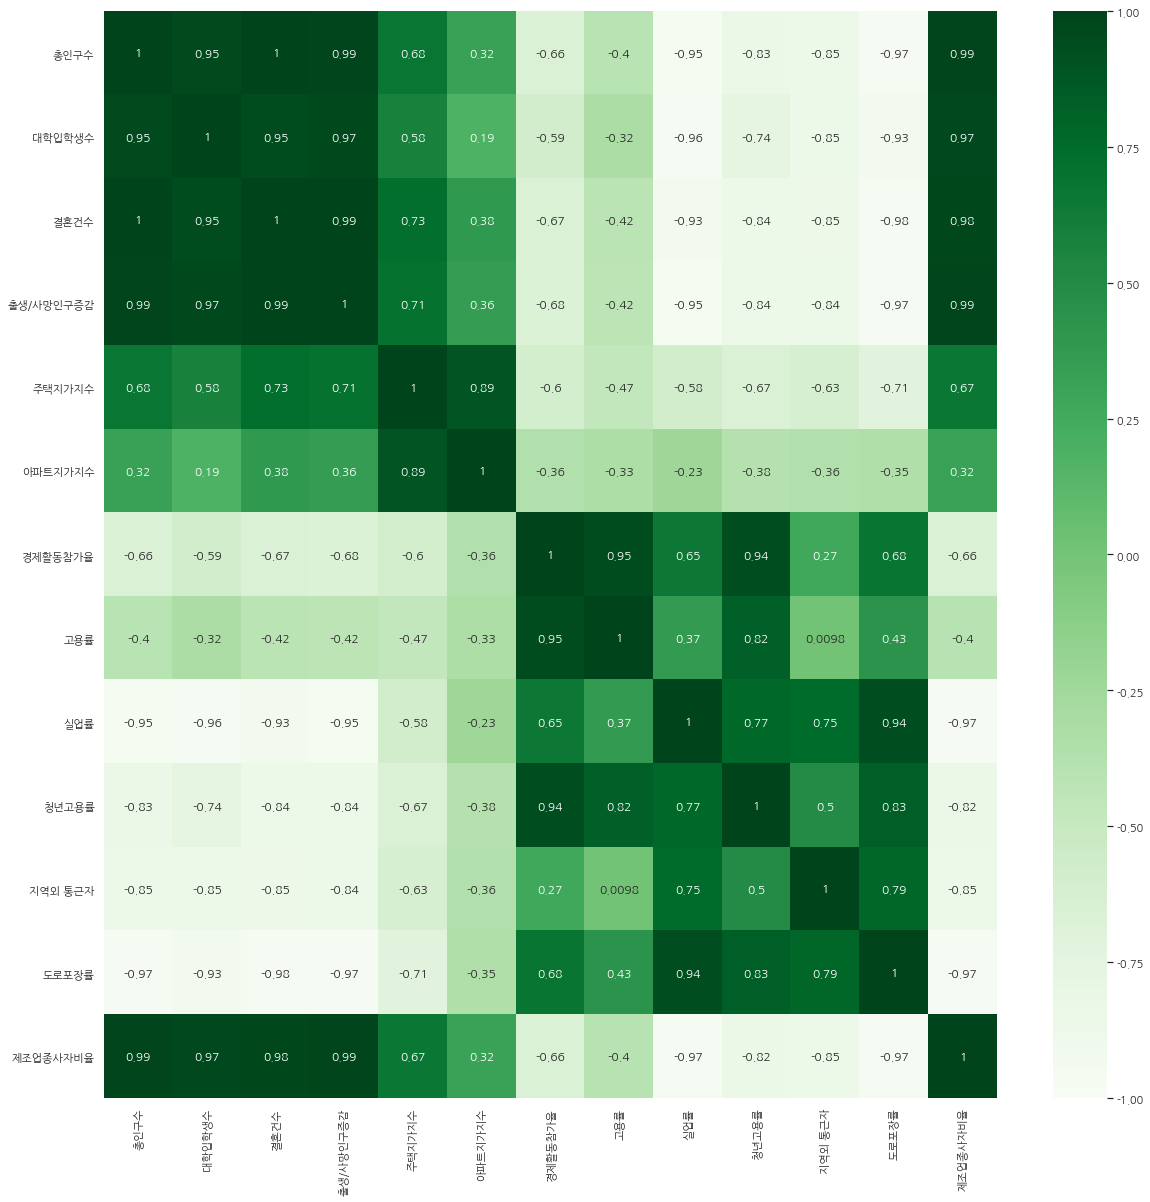

In [224]:
# 년도별로 나타낸 데이터의 상관관계 조사
plt.figure(figsize = (20,20))
sns.heatmap(test19.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

<AxesSubplot:>

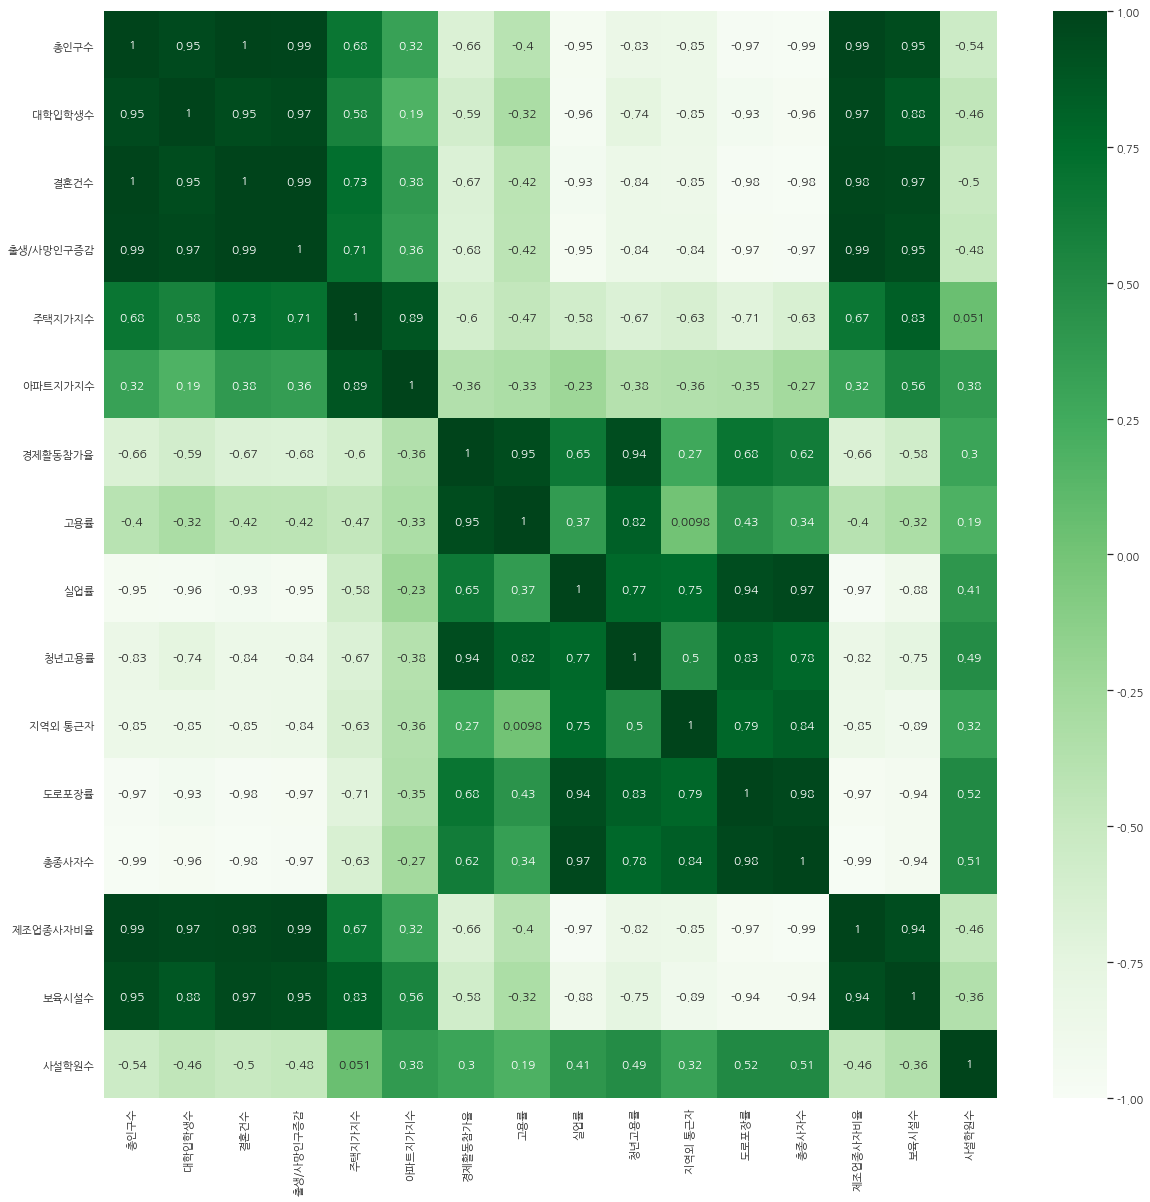

In [225]:
# 년도별로 나타낸 데이터의 상관관계 조사 (정규와 됨)
plt.figure(figsize = (20,20))
sns.heatmap(test_01.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )